# 1. Import Libraries

In [1]:
import glob
import time
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#pd.set_option('display.max_columns', None)

import cv2

from sklearnex import patch_sklearn
patch_sklearn()

import Utility_functions as ut

#PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torchvision.models import resnet101, ResNet101_Weights

#Skorch
from skorch import NeuralNetClassifier
from skorch.callbacks import EarlyStopping, LRScheduler, EpochScoring,ProgressBar, Checkpoint
from skorch.dataset import CVSplit, ValidSplit
from skorch.callbacks import TrainEndCheckpoint
from torch.utils.data import TensorDataset, DataLoader

#model performance
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,top_k_accuracy_score, balanced_accuracy_score, f1_score, recall_score 

#Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Distnce Matrix
from scipy.spatial import distance_matrix, distance

#Supress warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')

data_dir = 'C:/Dissertation/Data/'

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
%load_ext autoreload
%autoreload 2

# 2. Import Images

antelope_10001.jpg , antelope - Image Loaded
antelope_10002.jpg , antelope - Image Loaded
antelope_10003.jpg , antelope - Image Loaded
antelope_10004.jpg , antelope - Image Loaded
antelope_10005.jpg , antelope - Image Loaded
antelope_10006.jpg , antelope - Image Loaded
antelope_10007.jpg , antelope - Image Loaded
antelope_10008.jpg , antelope - Image Loaded
antelope_10009.jpg , antelope - Image Loaded
antelope_10010.jpg , antelope - Image Loaded
antelope_10011.jpg , antelope - Image Loaded
antelope_10012.jpg , antelope - Image Loaded
antelope_10013.jpg , antelope - Image Loaded
antelope_10014.jpg , antelope - Image Loaded
antelope_10015.jpg , antelope - Image Loaded
antelope_10016.jpg , antelope - Image Loaded
antelope_10017.jpg , antelope - Image Loaded
antelope_10018.jpg , antelope - Image Loaded
antelope_10019.jpg , antelope - Image Loaded
antelope_10020.jpg , antelope - Image Loaded
antelope_10021.jpg , antelope - Image Loaded
antelope_10022.jpg , antelope - Image Loaded
antelope_1

antelope_10188.jpg , antelope - Image Loaded
antelope_10189.jpg , antelope - Image Loaded
antelope_10190.jpg , antelope - Image Loaded
antelope_10191.jpg , antelope - Image Loaded
antelope_10192.jpg , antelope - Image Loaded
antelope_10193.jpg , antelope - Image Loaded
antelope_10194.jpg , antelope - Image Loaded
antelope_10195.jpg , antelope - Image Loaded
antelope_10196.jpg , antelope - Image Loaded
antelope_10197.jpg , antelope - Image Loaded
antelope_10198.jpg , antelope - Image Loaded
antelope_10199.jpg , antelope - Image Loaded
antelope_10200.jpg , antelope - Image Loaded
antelope_10201.jpg , antelope - Image Loaded
antelope_10202.jpg , antelope - Image Loaded
antelope_10203.jpg , antelope - Image Loaded
antelope_10204.jpg , antelope - Image Loaded
antelope_10205.jpg , antelope - Image Loaded
antelope_10206.jpg , antelope - Image Loaded
antelope_10207.jpg , antelope - Image Loaded
antelope_10208.jpg , antelope - Image Loaded
antelope_10209.jpg , antelope - Image Loaded
antelope_1

antelope_10386.jpg , antelope - Image Loaded
antelope_10387.jpg , antelope - Image Loaded
antelope_10388.jpg , antelope - Image Loaded
antelope_10389.jpg , antelope - Image Loaded
antelope_10390.jpg , antelope - Image Loaded
antelope_10391.jpg , antelope - Image Loaded
antelope_10392.jpg , antelope - Image Loaded
antelope_10393.jpg , antelope - Image Loaded
antelope_10394.jpg , antelope - Image Loaded
antelope_10395.jpg , antelope - Image Loaded
antelope_10396.jpg , antelope - Image Loaded
antelope_10397.jpg , antelope - Image Loaded
antelope_10398.jpg , antelope - Image Loaded
antelope_10399.jpg , antelope - Image Loaded
antelope_10400.jpg , antelope - Image Loaded
antelope_10401.jpg , antelope - Image Loaded
antelope_10402.jpg , antelope - Image Loaded
antelope_10403.jpg , antelope - Image Loaded
antelope_10404.jpg , antelope - Image Loaded
antelope_10405.jpg , antelope - Image Loaded
antelope_10406.jpg , antelope - Image Loaded
antelope_10407.jpg , antelope - Image Loaded
antelope_1

antelope_10579.jpg , antelope - Image Loaded
antelope_10580.jpg , antelope - Image Loaded
antelope_10581.jpg , antelope - Image Loaded
antelope_10582.jpg , antelope - Image Loaded
antelope_10583.jpg , antelope - Image Loaded
antelope_10584.jpg , antelope - Image Loaded
antelope_10585.jpg , antelope - Image Loaded
antelope_10586.jpg , antelope - Image Loaded
antelope_10587.jpg , antelope - Image Loaded
antelope_10588.jpg , antelope - Image Loaded
antelope_10589.jpg , antelope - Image Loaded
antelope_10590.jpg , antelope - Image Loaded
antelope_10591.jpg , antelope - Image Loaded
antelope_10592.jpg , antelope - Image Loaded
antelope_10593.jpg , antelope - Image Loaded
antelope_10594.jpg , antelope - Image Loaded
antelope_10595.jpg , antelope - Image Loaded
antelope_10596.jpg , antelope - Image Loaded
antelope_10597.jpg , antelope - Image Loaded
antelope_10598.jpg , antelope - Image Loaded
antelope_10599.jpg , antelope - Image Loaded
antelope_10600.jpg , antelope - Image Loaded
antelope_1

antelope_10769.jpg , antelope - Image Loaded
antelope_10770.jpg , antelope - Image Loaded
antelope_10771.jpg , antelope - Image Loaded
antelope_10772.jpg , antelope - Image Loaded
antelope_10773.jpg , antelope - Image Loaded
antelope_10774.jpg , antelope - Image Loaded
antelope_10775.jpg , antelope - Image Loaded
antelope_10776.jpg , antelope - Image Loaded
antelope_10777.jpg , antelope - Image Loaded
antelope_10778.jpg , antelope - Image Loaded
antelope_10779.jpg , antelope - Image Loaded
antelope_10780.jpg , antelope - Image Loaded
antelope_10781.jpg , antelope - Image Loaded
antelope_10782.jpg , antelope - Image Loaded
antelope_10783.jpg , antelope - Image Loaded
antelope_10784.jpg , antelope - Image Loaded
antelope_10785.jpg , antelope - Image Loaded
antelope_10786.jpg , antelope - Image Loaded
antelope_10787.jpg , antelope - Image Loaded
antelope_10788.jpg , antelope - Image Loaded
antelope_10789.jpg , antelope - Image Loaded
antelope_10790.jpg , antelope - Image Loaded
antelope_1

antelope_10953.jpg , antelope - Image Loaded
antelope_10954.jpg , antelope - Image Loaded
antelope_10955.jpg , antelope - Image Loaded
antelope_10956.jpg , antelope - Image Loaded
antelope_10957.jpg , antelope - Image Loaded
antelope_10958.jpg , antelope - Image Loaded
antelope_10959.jpg , antelope - Image Loaded
antelope_10960.jpg , antelope - Image Loaded
antelope_10961.jpg , antelope - Image Loaded
antelope_10962.jpg , antelope - Image Loaded
antelope_10963.jpg , antelope - Image Loaded
antelope_10964.jpg , antelope - Image Loaded
antelope_10965.jpg , antelope - Image Loaded
antelope_10966.jpg , antelope - Image Loaded
antelope_10967.jpg , antelope - Image Loaded
antelope_10968.jpg , antelope - Image Loaded
antelope_10969.jpg , antelope - Image Loaded
antelope_10970.jpg , antelope - Image Loaded
antelope_10971.jpg , antelope - Image Loaded
antelope_10972.jpg , antelope - Image Loaded
antelope_10973.jpg , antelope - Image Loaded
antelope_10974.jpg , antelope - Image Loaded
antelope_1

bat_10122.jpg , bat - Image Loaded
bat_10123.jpg , bat - Image Loaded
bat_10124.jpg , bat - Image Loaded
bat_10125.jpg , bat - Image Loaded
bat_10126.jpg , bat - Image Loaded
bat_10127.jpg , bat - Image Loaded
bat_10128.jpg , bat - Image Loaded
bat_10129.jpg , bat - Image Loaded
bat_10130.jpg , bat - Image Loaded
bat_10131.jpg , bat - Image Loaded
bat_10132.jpg , bat - Image Loaded
bat_10133.jpg , bat - Image Loaded
bat_10134.jpg , bat - Image Loaded
bat_10135.jpg , bat - Image Loaded
bat_10136.jpg , bat - Image Loaded
bat_10137.jpg , bat - Image Loaded
bat_10138.jpg , bat - Image Loaded
bat_10139.jpg , bat - Image Loaded
bat_10140.jpg , bat - Image Loaded
bat_10141.jpg , bat - Image Loaded
bat_10142.jpg , bat - Image Loaded
bat_10143.jpg , bat - Image Loaded
bat_10144.jpg , bat - Image Loaded
bat_10145.jpg , bat - Image Loaded
bat_10146.jpg , bat - Image Loaded
bat_10147.jpg , bat - Image Loaded
bat_10148.jpg , bat - Image Loaded
bat_10149.jpg , bat - Image Loaded
bat_10150.jpg , bat 

beaver_10003.jpg , beaver - Image Loaded
beaver_10004.jpg , beaver - Image Loaded
beaver_10005.jpg , beaver - Image Loaded
beaver_10006.jpg , beaver - Image Loaded
beaver_10007.jpg , beaver - Image Loaded
beaver_10008.jpg , beaver - Image Loaded
beaver_10009.jpg , beaver - Image Loaded
beaver_10010.jpg , beaver - Image Loaded
beaver_10011.jpg , beaver - Image Loaded
beaver_10012.jpg , beaver - Image Loaded
beaver_10013.jpg , beaver - Image Loaded
beaver_10014.jpg , beaver - Image Loaded
beaver_10015.jpg , beaver - Image Loaded
beaver_10016.jpg , beaver - Image Loaded
beaver_10017.jpg , beaver - Image Loaded
beaver_10018.jpg , beaver - Image Loaded
beaver_10019.jpg , beaver - Image Loaded
beaver_10020.jpg , beaver - Image Loaded
beaver_10021.jpg , beaver - Image Loaded
beaver_10022.jpg , beaver - Image Loaded
beaver_10023.jpg , beaver - Image Loaded
beaver_10024.jpg , beaver - Image Loaded
beaver_10025.jpg , beaver - Image Loaded
beaver_10026.jpg , beaver - Image Loaded
beaver_10027.jpg

blue+whale_10020.jpg , blue+whale - Image Loaded
blue+whale_10021.jpg , blue+whale - Image Loaded
blue+whale_10022.jpg , blue+whale - Image Loaded
blue+whale_10023.jpg , blue+whale - Image Loaded
blue+whale_10024.jpg , blue+whale - Image Loaded
blue+whale_10025.jpg , blue+whale - Image Loaded
blue+whale_10026.jpg , blue+whale - Image Loaded
blue+whale_10027.jpg , blue+whale - Image Loaded
blue+whale_10028.jpg , blue+whale - Image Loaded
blue+whale_10029.jpg , blue+whale - Image Loaded
blue+whale_10030.jpg , blue+whale - Image Loaded
blue+whale_10031.jpg , blue+whale - Image Loaded
blue+whale_10032.jpg , blue+whale - Image Loaded
blue+whale_10033.jpg , blue+whale - Image Loaded
blue+whale_10034.jpg , blue+whale - Image Loaded
blue+whale_10035.jpg , blue+whale - Image Loaded
blue+whale_10036.jpg , blue+whale - Image Loaded
blue+whale_10037.jpg , blue+whale - Image Loaded
blue+whale_10038.jpg , blue+whale - Image Loaded
blue+whale_10039.jpg , blue+whale - Image Loaded
blue+whale_10040.jpg

bobcat_10025.jpg , bobcat - Image Loaded
bobcat_10026.jpg , bobcat - Image Loaded
bobcat_10027.jpg , bobcat - Image Loaded
bobcat_10028.jpg , bobcat - Image Loaded
bobcat_10029.jpg , bobcat - Image Loaded
bobcat_10030.jpg , bobcat - Image Loaded
bobcat_10031.jpg , bobcat - Image Loaded
bobcat_10032.jpg , bobcat - Image Loaded
bobcat_10033.jpg , bobcat - Image Loaded
bobcat_10034.jpg , bobcat - Image Loaded
bobcat_10035.jpg , bobcat - Image Loaded
bobcat_10036.jpg , bobcat - Image Loaded
bobcat_10037.jpg , bobcat - Image Loaded
bobcat_10038.jpg , bobcat - Image Loaded
bobcat_10039.jpg , bobcat - Image Loaded
bobcat_10040.jpg , bobcat - Image Loaded
bobcat_10041.jpg , bobcat - Image Loaded
bobcat_10042.jpg , bobcat - Image Loaded
bobcat_10043.jpg , bobcat - Image Loaded
bobcat_10044.jpg , bobcat - Image Loaded
bobcat_10045.jpg , bobcat - Image Loaded
bobcat_10046.jpg , bobcat - Image Loaded
bobcat_10047.jpg , bobcat - Image Loaded
bobcat_10048.jpg , bobcat - Image Loaded
bobcat_10049.jpg

bobcat_10233.jpg , bobcat - Image Loaded
bobcat_10234.jpg , bobcat - Image Loaded
bobcat_10235.jpg , bobcat - Image Loaded
bobcat_10236.jpg , bobcat - Image Loaded
bobcat_10237.jpg , bobcat - Image Loaded
bobcat_10238.jpg , bobcat - Image Loaded
bobcat_10239.jpg , bobcat - Image Loaded
bobcat_10240.jpg , bobcat - Image Loaded
bobcat_10241.jpg , bobcat - Image Loaded
bobcat_10242.jpg , bobcat - Image Loaded
bobcat_10243.jpg , bobcat - Image Loaded
bobcat_10244.jpg , bobcat - Image Loaded
bobcat_10245.jpg , bobcat - Image Loaded
bobcat_10246.jpg , bobcat - Image Loaded
bobcat_10247.jpg , bobcat - Image Loaded
bobcat_10248.jpg , bobcat - Image Loaded
bobcat_10249.jpg , bobcat - Image Loaded
bobcat_10250.jpg , bobcat - Image Loaded
bobcat_10251.jpg , bobcat - Image Loaded
bobcat_10252.jpg , bobcat - Image Loaded
bobcat_10253.jpg , bobcat - Image Loaded
bobcat_10254.jpg , bobcat - Image Loaded
bobcat_10255.jpg , bobcat - Image Loaded
bobcat_10256.jpg , bobcat - Image Loaded
bobcat_10257.jpg

bobcat_10446.jpg , bobcat - Image Loaded
bobcat_10447.jpg , bobcat - Image Loaded
bobcat_10448.jpg , bobcat - Image Loaded
bobcat_10449.jpg , bobcat - Image Loaded
bobcat_10450.jpg , bobcat - Image Loaded
bobcat_10451.jpg , bobcat - Image Loaded
bobcat_10452.jpg , bobcat - Image Loaded
bobcat_10453.jpg , bobcat - Image Loaded
bobcat_10454.jpg , bobcat - Image Loaded
bobcat_10455.jpg , bobcat - Image Loaded
bobcat_10456.jpg , bobcat - Image Loaded
bobcat_10457.jpg , bobcat - Image Loaded
bobcat_10458.jpg , bobcat - Image Loaded
bobcat_10459.jpg , bobcat - Image Loaded
bobcat_10460.jpg , bobcat - Image Loaded
bobcat_10461.jpg , bobcat - Image Loaded
bobcat_10462.jpg , bobcat - Image Loaded
bobcat_10463.jpg , bobcat - Image Loaded
bobcat_10464.jpg , bobcat - Image Loaded
bobcat_10465.jpg , bobcat - Image Loaded
bobcat_10466.jpg , bobcat - Image Loaded
bobcat_10467.jpg , bobcat - Image Loaded
bobcat_10468.jpg , bobcat - Image Loaded
bobcat_10469.jpg , bobcat - Image Loaded
bobcat_10470.jpg

buffalo_10021.jpg , buffalo - Image Loaded
buffalo_10022.jpg , buffalo - Image Loaded
buffalo_10023.jpg , buffalo - Image Loaded
buffalo_10024.jpg , buffalo - Image Loaded
buffalo_10025.jpg , buffalo - Image Loaded
buffalo_10026.jpg , buffalo - Image Loaded
buffalo_10027.jpg , buffalo - Image Loaded
buffalo_10028.jpg , buffalo - Image Loaded
buffalo_10029.jpg , buffalo - Image Loaded
buffalo_10030.jpg , buffalo - Image Loaded
buffalo_10031.jpg , buffalo - Image Loaded
buffalo_10032.jpg , buffalo - Image Loaded
buffalo_10033.jpg , buffalo - Image Loaded
buffalo_10034.jpg , buffalo - Image Loaded
buffalo_10035.jpg , buffalo - Image Loaded
buffalo_10036.jpg , buffalo - Image Loaded
buffalo_10037.jpg , buffalo - Image Loaded
buffalo_10038.jpg , buffalo - Image Loaded
buffalo_10039.jpg , buffalo - Image Loaded
buffalo_10040.jpg , buffalo - Image Loaded
buffalo_10041.jpg , buffalo - Image Loaded
buffalo_10042.jpg , buffalo - Image Loaded
buffalo_10043.jpg , buffalo - Image Loaded
buffalo_100

buffalo_10222.jpg , buffalo - Image Loaded
buffalo_10223.jpg , buffalo - Image Loaded
buffalo_10224.jpg , buffalo - Image Loaded
buffalo_10225.jpg , buffalo - Image Loaded
buffalo_10226.jpg , buffalo - Image Loaded
buffalo_10227.jpg , buffalo - Image Loaded
buffalo_10228.jpg , buffalo - Image Loaded
buffalo_10229.jpg , buffalo - Image Loaded
buffalo_10230.jpg , buffalo - Image Loaded
buffalo_10231.jpg , buffalo - Image Loaded
buffalo_10232.jpg , buffalo - Image Loaded
buffalo_10233.jpg , buffalo - Image Loaded
buffalo_10234.jpg , buffalo - Image Loaded
buffalo_10235.jpg , buffalo - Image Loaded
buffalo_10236.jpg , buffalo - Image Loaded
buffalo_10237.jpg , buffalo - Image Loaded
buffalo_10238.jpg , buffalo - Image Loaded
buffalo_10239.jpg , buffalo - Image Loaded
buffalo_10240.jpg , buffalo - Image Loaded
buffalo_10241.jpg , buffalo - Image Loaded
buffalo_10242.jpg , buffalo - Image Loaded
buffalo_10243.jpg , buffalo - Image Loaded
buffalo_10244.jpg , buffalo - Image Loaded
buffalo_102

buffalo_10417.jpg , buffalo - Image Loaded
buffalo_10418.jpg , buffalo - Image Loaded
buffalo_10419.jpg , buffalo - Image Loaded
buffalo_10420.jpg , buffalo - Image Loaded
buffalo_10421.jpg , buffalo - Image Loaded
buffalo_10422.jpg , buffalo - Image Loaded
buffalo_10423.jpg , buffalo - Image Loaded
buffalo_10424.jpg , buffalo - Image Loaded
buffalo_10425.jpg , buffalo - Image Loaded
buffalo_10426.jpg , buffalo - Image Loaded
buffalo_10427.jpg , buffalo - Image Loaded
buffalo_10428.jpg , buffalo - Image Loaded
buffalo_10429.jpg , buffalo - Image Loaded
buffalo_10430.jpg , buffalo - Image Loaded
buffalo_10431.jpg , buffalo - Image Loaded
buffalo_10432.jpg , buffalo - Image Loaded
buffalo_10433.jpg , buffalo - Image Loaded
buffalo_10434.jpg , buffalo - Image Loaded
buffalo_10435.jpg , buffalo - Image Loaded
buffalo_10436.jpg , buffalo - Image Loaded
buffalo_10437.jpg , buffalo - Image Loaded
buffalo_10438.jpg , buffalo - Image Loaded
buffalo_10439.jpg , buffalo - Image Loaded
buffalo_104

buffalo_10619.jpg , buffalo - Image Loaded
buffalo_10620.jpg , buffalo - Image Loaded
buffalo_10621.jpg , buffalo - Image Loaded
buffalo_10622.jpg , buffalo - Image Loaded
buffalo_10623.jpg , buffalo - Image Loaded
buffalo_10624.jpg , buffalo - Image Loaded
buffalo_10625.jpg , buffalo - Image Loaded
buffalo_10626.jpg , buffalo - Image Loaded
buffalo_10627.jpg , buffalo - Image Loaded
buffalo_10628.jpg , buffalo - Image Loaded
buffalo_10629.jpg , buffalo - Image Loaded
buffalo_10630.jpg , buffalo - Image Loaded
buffalo_10631.jpg , buffalo - Image Loaded
buffalo_10632.jpg , buffalo - Image Loaded
buffalo_10633.jpg , buffalo - Image Loaded
buffalo_10634.jpg , buffalo - Image Loaded
buffalo_10635.jpg , buffalo - Image Loaded
buffalo_10636.jpg , buffalo - Image Loaded
buffalo_10637.jpg , buffalo - Image Loaded
buffalo_10638.jpg , buffalo - Image Loaded
buffalo_10639.jpg , buffalo - Image Loaded
buffalo_10640.jpg , buffalo - Image Loaded
buffalo_10641.jpg , buffalo - Image Loaded
buffalo_106

buffalo_10815.jpg , buffalo - Image Loaded
buffalo_10816.jpg , buffalo - Image Loaded
buffalo_10817.jpg , buffalo - Image Loaded
buffalo_10818.jpg , buffalo - Image Loaded
buffalo_10819.jpg , buffalo - Image Loaded
buffalo_10820.jpg , buffalo - Image Loaded
buffalo_10821.jpg , buffalo - Image Loaded
buffalo_10822.jpg , buffalo - Image Loaded
buffalo_10823.jpg , buffalo - Image Loaded
buffalo_10824.jpg , buffalo - Image Loaded
buffalo_10825.jpg , buffalo - Image Loaded
buffalo_10826.jpg , buffalo - Image Loaded
buffalo_10827.jpg , buffalo - Image Loaded
buffalo_10828.jpg , buffalo - Image Loaded
buffalo_10829.jpg , buffalo - Image Loaded
buffalo_10830.jpg , buffalo - Image Loaded
buffalo_10831.jpg , buffalo - Image Loaded
buffalo_10832.jpg , buffalo - Image Loaded
buffalo_10833.jpg , buffalo - Image Loaded
buffalo_10834.jpg , buffalo - Image Loaded
buffalo_10835.jpg , buffalo - Image Loaded
buffalo_10836.jpg , buffalo - Image Loaded
buffalo_10837.jpg , buffalo - Image Loaded
buffalo_108

chihuahua_10104.jpg , chihuahua - Image Loaded
chihuahua_10105.jpg , chihuahua - Image Loaded
chihuahua_10106.jpg , chihuahua - Image Loaded
chihuahua_10107.jpg , chihuahua - Image Loaded
chihuahua_10108.jpg , chihuahua - Image Loaded
chihuahua_10109.jpg , chihuahua - Image Loaded
chihuahua_10110.jpg , chihuahua - Image Loaded
chihuahua_10111.jpg , chihuahua - Image Loaded
chihuahua_10112.jpg , chihuahua - Image Loaded
chihuahua_10113.jpg , chihuahua - Image Loaded
chihuahua_10114.jpg , chihuahua - Image Loaded
chihuahua_10115.jpg , chihuahua - Image Loaded
chihuahua_10116.jpg , chihuahua - Image Loaded
chihuahua_10117.jpg , chihuahua - Image Loaded
chihuahua_10118.jpg , chihuahua - Image Loaded
chihuahua_10119.jpg , chihuahua - Image Loaded
chihuahua_10120.jpg , chihuahua - Image Loaded
chihuahua_10121.jpg , chihuahua - Image Loaded
chihuahua_10122.jpg , chihuahua - Image Loaded
chihuahua_10123.jpg , chihuahua - Image Loaded
chihuahua_10124.jpg , chihuahua - Image Loaded
chihuahua_101

chihuahua_10284.jpg , chihuahua - Image Loaded
chihuahua_10285.jpg , chihuahua - Image Loaded
chihuahua_10286.jpg , chihuahua - Image Loaded
chihuahua_10287.jpg , chihuahua - Image Loaded
chihuahua_10288.jpg , chihuahua - Image Loaded
chihuahua_10289.jpg , chihuahua - Image Loaded
chihuahua_10290.jpg , chihuahua - Image Loaded
chihuahua_10291.jpg , chihuahua - Image Loaded
chihuahua_10292.jpg , chihuahua - Image Loaded
chihuahua_10293.jpg , chihuahua - Image Loaded
chihuahua_10294.jpg , chihuahua - Image Loaded
chihuahua_10295.jpg , chihuahua - Image Loaded
chihuahua_10296.jpg , chihuahua - Image Loaded
chihuahua_10297.jpg , chihuahua - Image Loaded
chihuahua_10298.jpg , chihuahua - Image Loaded
chihuahua_10299.jpg , chihuahua - Image Loaded
chihuahua_10300.jpg , chihuahua - Image Loaded
chihuahua_10301.jpg , chihuahua - Image Loaded
chihuahua_10302.jpg , chihuahua - Image Loaded
chihuahua_10303.jpg , chihuahua - Image Loaded
chihuahua_10304.jpg , chihuahua - Image Loaded
chihuahua_103

chihuahua_10466.jpg , chihuahua - Image Loaded
chihuahua_10467.jpg , chihuahua - Image Loaded
chihuahua_10468.jpg , chihuahua - Image Loaded
chihuahua_10469.jpg , chihuahua - Image Loaded
chihuahua_10470.jpg , chihuahua - Image Loaded
chihuahua_10471.jpg , chihuahua - Image Loaded
chihuahua_10472.jpg , chihuahua - Image Loaded
chihuahua_10473.jpg , chihuahua - Image Loaded
chihuahua_10474.jpg , chihuahua - Image Loaded
chihuahua_10475.jpg , chihuahua - Image Loaded
chihuahua_10476.jpg , chihuahua - Image Loaded
chihuahua_10477.jpg , chihuahua - Image Loaded
chihuahua_10478.jpg , chihuahua - Image Loaded
chihuahua_10479.jpg , chihuahua - Image Loaded
chihuahua_10480.jpg , chihuahua - Image Loaded
chihuahua_10481.jpg , chihuahua - Image Loaded
chihuahua_10482.jpg , chihuahua - Image Loaded
chihuahua_10483.jpg , chihuahua - Image Loaded
chihuahua_10484.jpg , chihuahua - Image Loaded
chihuahua_10485.jpg , chihuahua - Image Loaded
chihuahua_10486.jpg , chihuahua - Image Loaded
chihuahua_104

chimpanzee_10082.jpg , chimpanzee - Image Loaded
chimpanzee_10083.jpg , chimpanzee - Image Loaded
chimpanzee_10084.jpg , chimpanzee - Image Loaded
chimpanzee_10085.jpg , chimpanzee - Image Loaded
chimpanzee_10086.jpg , chimpanzee - Image Loaded
chimpanzee_10087.jpg , chimpanzee - Image Loaded
chimpanzee_10088.jpg , chimpanzee - Image Loaded
chimpanzee_10089.jpg , chimpanzee - Image Loaded
chimpanzee_10090.jpg , chimpanzee - Image Loaded
chimpanzee_10091.jpg , chimpanzee - Image Loaded
chimpanzee_10092.jpg , chimpanzee - Image Loaded
chimpanzee_10093.jpg , chimpanzee - Image Loaded
chimpanzee_10094.jpg , chimpanzee - Image Loaded
chimpanzee_10095.jpg , chimpanzee - Image Loaded
chimpanzee_10096.jpg , chimpanzee - Image Loaded
chimpanzee_10097.jpg , chimpanzee - Image Loaded
chimpanzee_10098.jpg , chimpanzee - Image Loaded
chimpanzee_10099.jpg , chimpanzee - Image Loaded
chimpanzee_10100.jpg , chimpanzee - Image Loaded
chimpanzee_10101.jpg , chimpanzee - Image Loaded
chimpanzee_10102.jpg

chimpanzee_10254.jpg , chimpanzee - Image Loaded
chimpanzee_10255.jpg , chimpanzee - Image Loaded
chimpanzee_10256.jpg , chimpanzee - Image Loaded
chimpanzee_10257.jpg , chimpanzee - Image Loaded
chimpanzee_10258.jpg , chimpanzee - Image Loaded
chimpanzee_10259.jpg , chimpanzee - Image Loaded
chimpanzee_10260.jpg , chimpanzee - Image Loaded
chimpanzee_10261.jpg , chimpanzee - Image Loaded
chimpanzee_10262.jpg , chimpanzee - Image Loaded
chimpanzee_10263.jpg , chimpanzee - Image Loaded
chimpanzee_10264.jpg , chimpanzee - Image Loaded
chimpanzee_10265.jpg , chimpanzee - Image Loaded
chimpanzee_10266.jpg , chimpanzee - Image Loaded
chimpanzee_10267.jpg , chimpanzee - Image Loaded
chimpanzee_10268.jpg , chimpanzee - Image Loaded
chimpanzee_10269.jpg , chimpanzee - Image Loaded
chimpanzee_10270.jpg , chimpanzee - Image Loaded
chimpanzee_10271.jpg , chimpanzee - Image Loaded
chimpanzee_10272.jpg , chimpanzee - Image Loaded
chimpanzee_10273.jpg , chimpanzee - Image Loaded
chimpanzee_10274.jpg

chimpanzee_10439.jpg , chimpanzee - Image Loaded
chimpanzee_10440.jpg , chimpanzee - Image Loaded
chimpanzee_10441.jpg , chimpanzee - Image Loaded
chimpanzee_10442.jpg , chimpanzee - Image Loaded
chimpanzee_10443.jpg , chimpanzee - Image Loaded
chimpanzee_10444.jpg , chimpanzee - Image Loaded
chimpanzee_10445.jpg , chimpanzee - Image Loaded
chimpanzee_10446.jpg , chimpanzee - Image Loaded
chimpanzee_10447.jpg , chimpanzee - Image Loaded
chimpanzee_10448.jpg , chimpanzee - Image Loaded
chimpanzee_10449.jpg , chimpanzee - Image Loaded
chimpanzee_10450.jpg , chimpanzee - Image Loaded
chimpanzee_10451.jpg , chimpanzee - Image Loaded
chimpanzee_10452.jpg , chimpanzee - Image Loaded
chimpanzee_10453.jpg , chimpanzee - Image Loaded
chimpanzee_10454.jpg , chimpanzee - Image Loaded
chimpanzee_10455.jpg , chimpanzee - Image Loaded
chimpanzee_10456.jpg , chimpanzee - Image Loaded
chimpanzee_10457.jpg , chimpanzee - Image Loaded
chimpanzee_10458.jpg , chimpanzee - Image Loaded
chimpanzee_10459.jpg

chimpanzee_10609.jpg , chimpanzee - Image Loaded
chimpanzee_10610.jpg , chimpanzee - Image Loaded
chimpanzee_10611.jpg , chimpanzee - Image Loaded
chimpanzee_10612.jpg , chimpanzee - Image Loaded
chimpanzee_10613.jpg , chimpanzee - Image Loaded
chimpanzee_10614.jpg , chimpanzee - Image Loaded
chimpanzee_10615.jpg , chimpanzee - Image Loaded
chimpanzee_10616.jpg , chimpanzee - Image Loaded
chimpanzee_10617.jpg , chimpanzee - Image Loaded
chimpanzee_10618.jpg , chimpanzee - Image Loaded
chimpanzee_10619.jpg , chimpanzee - Image Loaded
chimpanzee_10620.jpg , chimpanzee - Image Loaded
chimpanzee_10621.jpg , chimpanzee - Image Loaded
chimpanzee_10622.jpg , chimpanzee - Image Loaded
chimpanzee_10623.jpg , chimpanzee - Image Loaded
chimpanzee_10624.jpg , chimpanzee - Image Loaded
chimpanzee_10625.jpg , chimpanzee - Image Loaded
chimpanzee_10626.jpg , chimpanzee - Image Loaded
chimpanzee_10627.jpg , chimpanzee - Image Loaded
chimpanzee_10628.jpg , chimpanzee - Image Loaded
chimpanzee_10629.jpg

collie_10062.jpg , collie - Image Loaded
collie_10063.jpg , collie - Image Loaded
collie_10064.jpg , collie - Image Loaded
collie_10065.jpg , collie - Image Loaded
collie_10066.jpg , collie - Image Loaded
collie_10067.jpg , collie - Image Loaded
collie_10068.jpg , collie - Image Loaded
collie_10069.jpg , collie - Image Loaded
collie_10070.jpg , collie - Image Loaded
collie_10071.jpg , collie - Image Loaded
collie_10072.jpg , collie - Image Loaded
collie_10073.jpg , collie - Image Loaded
collie_10074.jpg , collie - Image Loaded
collie_10075.jpg , collie - Image Loaded
collie_10076.jpg , collie - Image Loaded
collie_10077.jpg , collie - Image Loaded
collie_10078.jpg , collie - Image Loaded
collie_10079.jpg , collie - Image Loaded
collie_10080.jpg , collie - Image Loaded
collie_10081.jpg , collie - Image Loaded
collie_10082.jpg , collie - Image Loaded
collie_10083.jpg , collie - Image Loaded
collie_10084.jpg , collie - Image Loaded
collie_10085.jpg , collie - Image Loaded
collie_10086.jpg

collie_10273.jpg , collie - Image Loaded
collie_10274.jpg , collie - Image Loaded
collie_10275.jpg , collie - Image Loaded
collie_10276.jpg , collie - Image Loaded
collie_10277.jpg , collie - Image Loaded
collie_10278.jpg , collie - Image Loaded
collie_10279.jpg , collie - Image Loaded
collie_10280.jpg , collie - Image Loaded
collie_10281.jpg , collie - Image Loaded
collie_10282.jpg , collie - Image Loaded
collie_10283.jpg , collie - Image Loaded
collie_10284.jpg , collie - Image Loaded
collie_10285.jpg , collie - Image Loaded
collie_10286.jpg , collie - Image Loaded
collie_10287.jpg , collie - Image Loaded
collie_10288.jpg , collie - Image Loaded
collie_10289.jpg , collie - Image Loaded
collie_10290.jpg , collie - Image Loaded
collie_10291.jpg , collie - Image Loaded
collie_10292.jpg , collie - Image Loaded
collie_10293.jpg , collie - Image Loaded
collie_10294.jpg , collie - Image Loaded
collie_10295.jpg , collie - Image Loaded
collie_10296.jpg , collie - Image Loaded
collie_10297.jpg

collie_10479.jpg , collie - Image Loaded
collie_10480.jpg , collie - Image Loaded
collie_10481.jpg , collie - Image Loaded
collie_10482.jpg , collie - Image Loaded
collie_10483.jpg , collie - Image Loaded
collie_10484.jpg , collie - Image Loaded
collie_10485.jpg , collie - Image Loaded
collie_10486.jpg , collie - Image Loaded
collie_10487.jpg , collie - Image Loaded
collie_10488.jpg , collie - Image Loaded
collie_10489.jpg , collie - Image Loaded
collie_10490.jpg , collie - Image Loaded
collie_10491.jpg , collie - Image Loaded
collie_10492.jpg , collie - Image Loaded
collie_10493.jpg , collie - Image Loaded
collie_10494.jpg , collie - Image Loaded
collie_10495.jpg , collie - Image Loaded
collie_10496.jpg , collie - Image Loaded
collie_10497.jpg , collie - Image Loaded
collie_10498.jpg , collie - Image Loaded
collie_10499.jpg , collie - Image Loaded
collie_10500.jpg , collie - Image Loaded
collie_10501.jpg , collie - Image Loaded
collie_10502.jpg , collie - Image Loaded
collie_10503.jpg

collie_10683.jpg , collie - Image Loaded
collie_10684.jpg , collie - Image Loaded
collie_10685.jpg , collie - Image Loaded
collie_10686.jpg , collie - Image Loaded
collie_10687.jpg , collie - Image Loaded
collie_10688.jpg , collie - Image Loaded
collie_10689.jpg , collie - Image Loaded
collie_10690.jpg , collie - Image Loaded
collie_10691.jpg , collie - Image Loaded
collie_10692.jpg , collie - Image Loaded
collie_10693.jpg , collie - Image Loaded
collie_10694.jpg , collie - Image Loaded
collie_10695.jpg , collie - Image Loaded
collie_10696.jpg , collie - Image Loaded
collie_10697.jpg , collie - Image Loaded
collie_10698.jpg , collie - Image Loaded
collie_10699.jpg , collie - Image Loaded
collie_10700.jpg , collie - Image Loaded
collie_10701.jpg , collie - Image Loaded
collie_10702.jpg , collie - Image Loaded
collie_10703.jpg , collie - Image Loaded
collie_10704.jpg , collie - Image Loaded
collie_10705.jpg , collie - Image Loaded
collie_10706.jpg , collie - Image Loaded
collie_10707.jpg

collie_10886.jpg , collie - Image Loaded
collie_10887.jpg , collie - Image Loaded
collie_10888.jpg , collie - Image Loaded
collie_10889.jpg , collie - Image Loaded
collie_10890.jpg , collie - Image Loaded
collie_10891.jpg , collie - Image Loaded
collie_10892.jpg , collie - Image Loaded
collie_10893.jpg , collie - Image Loaded
collie_10894.jpg , collie - Image Loaded
collie_10895.jpg , collie - Image Loaded
collie_10896.jpg , collie - Image Loaded
collie_10897.jpg , collie - Image Loaded
collie_10898.jpg , collie - Image Loaded
collie_10899.jpg , collie - Image Loaded
collie_10900.jpg , collie - Image Loaded
collie_10901.jpg , collie - Image Loaded
collie_10902.jpg , collie - Image Loaded
collie_10903.jpg , collie - Image Loaded
collie_10904.jpg , collie - Image Loaded
collie_10905.jpg , collie - Image Loaded
collie_10906.jpg , collie - Image Loaded
collie_10907.jpg , collie - Image Loaded
collie_10908.jpg , collie - Image Loaded
collie_10909.jpg , collie - Image Loaded
collie_10910.jpg

cow_10078.jpg , cow - Image Loaded
cow_10079.jpg , cow - Image Loaded
cow_10080.jpg , cow - Image Loaded
cow_10081.jpg , cow - Image Loaded
cow_10082.jpg , cow - Image Loaded
cow_10083.jpg , cow - Image Loaded
cow_10084.jpg , cow - Image Loaded
cow_10085.jpg , cow - Image Loaded
cow_10086.jpg , cow - Image Loaded
cow_10087.jpg , cow - Image Loaded
cow_10088.jpg , cow - Image Loaded
cow_10089.jpg , cow - Image Loaded
cow_10090.jpg , cow - Image Loaded
cow_10091.jpg , cow - Image Loaded
cow_10092.jpg , cow - Image Loaded
cow_10093.jpg , cow - Image Loaded
cow_10094.jpg , cow - Image Loaded
cow_10095.jpg , cow - Image Loaded
cow_10096.jpg , cow - Image Loaded
cow_10097.jpg , cow - Image Loaded
cow_10098.jpg , cow - Image Loaded
cow_10099.jpg , cow - Image Loaded
cow_10100.jpg , cow - Image Loaded
cow_10101.jpg , cow - Image Loaded
cow_10102.jpg , cow - Image Loaded
cow_10103.jpg , cow - Image Loaded
cow_10104.jpg , cow - Image Loaded
cow_10105.jpg , cow - Image Loaded
cow_10106.jpg , cow 

cow_10317.jpg , cow - Image Loaded
cow_10318.jpg , cow - Image Loaded
cow_10319.jpg , cow - Image Loaded
cow_10320.jpg , cow - Image Loaded
cow_10321.jpg , cow - Image Loaded
cow_10322.jpg , cow - Image Loaded
cow_10323.jpg , cow - Image Loaded
cow_10324.jpg , cow - Image Loaded
cow_10325.jpg , cow - Image Loaded
cow_10326.jpg , cow - Image Loaded
cow_10327.jpg , cow - Image Loaded
cow_10328.jpg , cow - Image Loaded
cow_10329.jpg , cow - Image Loaded
cow_10330.jpg , cow - Image Loaded
cow_10331.jpg , cow - Image Loaded
cow_10332.jpg , cow - Image Loaded
cow_10333.jpg , cow - Image Loaded
cow_10334.jpg , cow - Image Loaded
cow_10335.jpg , cow - Image Loaded
cow_10336.jpg , cow - Image Loaded
cow_10337.jpg , cow - Image Loaded
cow_10338.jpg , cow - Image Loaded
cow_10339.jpg , cow - Image Loaded
cow_10340.jpg , cow - Image Loaded
cow_10341.jpg , cow - Image Loaded
cow_10342.jpg , cow - Image Loaded
cow_10343.jpg , cow - Image Loaded
cow_10344.jpg , cow - Image Loaded
cow_10345.jpg , cow 

cow_10562.jpg , cow - Image Loaded
cow_10563.jpg , cow - Image Loaded
cow_10564.jpg , cow - Image Loaded
cow_10565.jpg , cow - Image Loaded
cow_10566.jpg , cow - Image Loaded
cow_10567.jpg , cow - Image Loaded
cow_10568.jpg , cow - Image Loaded
cow_10569.jpg , cow - Image Loaded
cow_10570.jpg , cow - Image Loaded
cow_10571.jpg , cow - Image Loaded
cow_10572.jpg , cow - Image Loaded
cow_10573.jpg , cow - Image Loaded
cow_10574.jpg , cow - Image Loaded
cow_10575.jpg , cow - Image Loaded
cow_10576.jpg , cow - Image Loaded
cow_10577.jpg , cow - Image Loaded
cow_10578.jpg , cow - Image Loaded
cow_10579.jpg , cow - Image Loaded
cow_10580.jpg , cow - Image Loaded
cow_10581.jpg , cow - Image Loaded
cow_10582.jpg , cow - Image Loaded
cow_10583.jpg , cow - Image Loaded
cow_10584.jpg , cow - Image Loaded
cow_10585.jpg , cow - Image Loaded
cow_10586.jpg , cow - Image Loaded
cow_10587.jpg , cow - Image Loaded
cow_10588.jpg , cow - Image Loaded
cow_10589.jpg , cow - Image Loaded
cow_10590.jpg , cow 

cow_10804.jpg , cow - Image Loaded
cow_10805.jpg , cow - Image Loaded
cow_10806.jpg , cow - Image Loaded
cow_10807.jpg , cow - Image Loaded
cow_10808.jpg , cow - Image Loaded
cow_10809.jpg , cow - Image Loaded
cow_10810.jpg , cow - Image Loaded
cow_10811.jpg , cow - Image Loaded
cow_10812.jpg , cow - Image Loaded
cow_10813.jpg , cow - Image Loaded
cow_10814.jpg , cow - Image Loaded
cow_10815.jpg , cow - Image Loaded
cow_10816.jpg , cow - Image Loaded
cow_10817.jpg , cow - Image Loaded
cow_10818.jpg , cow - Image Loaded
cow_10819.jpg , cow - Image Loaded
cow_10820.jpg , cow - Image Loaded
cow_10821.jpg , cow - Image Loaded
cow_10822.jpg , cow - Image Loaded
cow_10823.jpg , cow - Image Loaded
cow_10824.jpg , cow - Image Loaded
cow_10825.jpg , cow - Image Loaded
cow_10826.jpg , cow - Image Loaded
cow_10827.jpg , cow - Image Loaded
cow_10828.jpg , cow - Image Loaded
cow_10829.jpg , cow - Image Loaded
cow_10830.jpg , cow - Image Loaded
cow_10831.jpg , cow - Image Loaded
cow_10832.jpg , cow 

cow_11051.jpg , cow - Image Loaded
cow_11052.jpg , cow - Image Loaded
cow_11053.jpg , cow - Image Loaded
cow_11054.jpg , cow - Image Loaded
cow_11055.jpg , cow - Image Loaded
cow_11056.jpg , cow - Image Loaded
cow_11057.jpg , cow - Image Loaded
cow_11058.jpg , cow - Image Loaded
cow_11059.jpg , cow - Image Loaded
cow_11060.jpg , cow - Image Loaded
cow_11061.jpg , cow - Image Loaded
cow_11062.jpg , cow - Image Loaded
cow_11063.jpg , cow - Image Loaded
cow_11064.jpg , cow - Image Loaded
cow_11065.jpg , cow - Image Loaded
cow_11066.jpg , cow - Image Loaded
cow_11067.jpg , cow - Image Loaded
cow_11068.jpg , cow - Image Loaded
cow_11069.jpg , cow - Image Loaded
cow_11070.jpg , cow - Image Loaded
cow_11071.jpg , cow - Image Loaded
cow_11072.jpg , cow - Image Loaded
cow_11073.jpg , cow - Image Loaded
cow_11074.jpg , cow - Image Loaded
cow_11075.jpg , cow - Image Loaded
cow_11076.jpg , cow - Image Loaded
cow_11077.jpg , cow - Image Loaded
cow_11078.jpg , cow - Image Loaded
cow_11079.jpg , cow 

cow_11293.jpg , cow - Image Loaded
cow_11294.jpg , cow - Image Loaded
cow_11295.jpg , cow - Image Loaded
cow_11296.jpg , cow - Image Loaded
cow_11297.jpg , cow - Image Loaded
cow_11298.jpg , cow - Image Loaded
cow_11299.jpg , cow - Image Loaded
cow_11300.jpg , cow - Image Loaded
cow_11301.jpg , cow - Image Loaded
cow_11302.jpg , cow - Image Loaded
cow_11303.jpg , cow - Image Loaded
cow_11304.jpg , cow - Image Loaded
cow_11305.jpg , cow - Image Loaded
cow_11306.jpg , cow - Image Loaded
cow_11307.jpg , cow - Image Loaded
cow_11308.jpg , cow - Image Loaded
cow_11309.jpg , cow - Image Loaded
cow_11310.jpg , cow - Image Loaded
cow_11311.jpg , cow - Image Loaded
cow_11312.jpg , cow - Image Loaded
cow_11313.jpg , cow - Image Loaded
cow_11314.jpg , cow - Image Loaded
cow_11315.jpg , cow - Image Loaded
cow_11316.jpg , cow - Image Loaded
cow_11317.jpg , cow - Image Loaded
cow_11318.jpg , cow - Image Loaded
cow_11319.jpg , cow - Image Loaded
cow_11320.jpg , cow - Image Loaded
cow_11321.jpg , cow 

dalmatian_10149.jpg , dalmatian - Image Loaded
dalmatian_10150.jpg , dalmatian - Image Loaded
dalmatian_10151.jpg , dalmatian - Image Loaded
dalmatian_10152.jpg , dalmatian - Image Loaded
dalmatian_10153.jpg , dalmatian - Image Loaded
dalmatian_10154.jpg , dalmatian - Image Loaded
dalmatian_10155.jpg , dalmatian - Image Loaded
dalmatian_10156.jpg , dalmatian - Image Loaded
dalmatian_10157.jpg , dalmatian - Image Loaded
dalmatian_10158.jpg , dalmatian - Image Loaded
dalmatian_10159.jpg , dalmatian - Image Loaded
dalmatian_10160.jpg , dalmatian - Image Loaded
dalmatian_10161.jpg , dalmatian - Image Loaded
dalmatian_10162.jpg , dalmatian - Image Loaded
dalmatian_10163.jpg , dalmatian - Image Loaded
dalmatian_10164.jpg , dalmatian - Image Loaded
dalmatian_10165.jpg , dalmatian - Image Loaded
dalmatian_10166.jpg , dalmatian - Image Loaded
dalmatian_10167.jpg , dalmatian - Image Loaded
dalmatian_10168.jpg , dalmatian - Image Loaded
dalmatian_10169.jpg , dalmatian - Image Loaded
dalmatian_101

dalmatian_10327.jpg , dalmatian - Image Loaded
dalmatian_10328.jpg , dalmatian - Image Loaded
dalmatian_10329.jpg , dalmatian - Image Loaded
dalmatian_10330.jpg , dalmatian - Image Loaded
dalmatian_10331.jpg , dalmatian - Image Loaded
dalmatian_10332.jpg , dalmatian - Image Loaded
dalmatian_10333.jpg , dalmatian - Image Loaded
dalmatian_10334.jpg , dalmatian - Image Loaded
dalmatian_10335.jpg , dalmatian - Image Loaded
dalmatian_10336.jpg , dalmatian - Image Loaded
dalmatian_10337.jpg , dalmatian - Image Loaded
dalmatian_10338.jpg , dalmatian - Image Loaded
dalmatian_10339.jpg , dalmatian - Image Loaded
dalmatian_10340.jpg , dalmatian - Image Loaded
dalmatian_10341.jpg , dalmatian - Image Loaded
dalmatian_10342.jpg , dalmatian - Image Loaded
dalmatian_10343.jpg , dalmatian - Image Loaded
dalmatian_10344.jpg , dalmatian - Image Loaded
dalmatian_10345.jpg , dalmatian - Image Loaded
dalmatian_10346.jpg , dalmatian - Image Loaded
dalmatian_10347.jpg , dalmatian - Image Loaded
dalmatian_103

dalmatian_10509.jpg , dalmatian - Image Loaded
dalmatian_10510.jpg , dalmatian - Image Loaded
dalmatian_10511.jpg , dalmatian - Image Loaded
dalmatian_10512.jpg , dalmatian - Image Loaded
dalmatian_10513.jpg , dalmatian - Image Loaded
dalmatian_10514.jpg , dalmatian - Image Loaded
dalmatian_10515.jpg , dalmatian - Image Loaded
dalmatian_10516.jpg , dalmatian - Image Loaded
dalmatian_10517.jpg , dalmatian - Image Loaded
dalmatian_10518.jpg , dalmatian - Image Loaded
dalmatian_10519.jpg , dalmatian - Image Loaded
dalmatian_10520.jpg , dalmatian - Image Loaded
dalmatian_10521.jpg , dalmatian - Image Loaded
dalmatian_10522.jpg , dalmatian - Image Loaded
dalmatian_10523.jpg , dalmatian - Image Loaded
dalmatian_10524.jpg , dalmatian - Image Loaded
dalmatian_10525.jpg , dalmatian - Image Loaded
dalmatian_10526.jpg , dalmatian - Image Loaded
dalmatian_10527.jpg , dalmatian - Image Loaded
dalmatian_10528.jpg , dalmatian - Image Loaded
dalmatian_10529.jpg , dalmatian - Image Loaded
dalmatian_105

deer_10178.jpg , deer - Image Loaded
deer_10179.jpg , deer - Image Loaded
deer_10180.jpg , deer - Image Loaded
deer_10181.jpg , deer - Image Loaded
deer_10182.jpg , deer - Image Loaded
deer_10183.jpg , deer - Image Loaded
deer_10184.jpg , deer - Image Loaded
deer_10185.jpg , deer - Image Loaded
deer_10186.jpg , deer - Image Loaded
deer_10187.jpg , deer - Image Loaded
deer_10188.jpg , deer - Image Loaded
deer_10189.jpg , deer - Image Loaded
deer_10190.jpg , deer - Image Loaded
deer_10191.jpg , deer - Image Loaded
deer_10192.jpg , deer - Image Loaded
deer_10193.jpg , deer - Image Loaded
deer_10194.jpg , deer - Image Loaded
deer_10195.jpg , deer - Image Loaded
deer_10196.jpg , deer - Image Loaded
deer_10197.jpg , deer - Image Loaded
deer_10198.jpg , deer - Image Loaded
deer_10199.jpg , deer - Image Loaded
deer_10200.jpg , deer - Image Loaded
deer_10201.jpg , deer - Image Loaded
deer_10202.jpg , deer - Image Loaded
deer_10203.jpg , deer - Image Loaded
deer_10204.jpg , deer - Image Loaded
d

deer_10415.jpg , deer - Image Loaded
deer_10416.jpg , deer - Image Loaded
deer_10417.jpg , deer - Image Loaded
deer_10418.jpg , deer - Image Loaded
deer_10419.jpg , deer - Image Loaded
deer_10420.jpg , deer - Image Loaded
deer_10421.jpg , deer - Image Loaded
deer_10422.jpg , deer - Image Loaded
deer_10423.jpg , deer - Image Loaded
deer_10424.jpg , deer - Image Loaded
deer_10425.jpg , deer - Image Loaded
deer_10426.jpg , deer - Image Loaded
deer_10427.jpg , deer - Image Loaded
deer_10428.jpg , deer - Image Loaded
deer_10429.jpg , deer - Image Loaded
deer_10430.jpg , deer - Image Loaded
deer_10431.jpg , deer - Image Loaded
deer_10432.jpg , deer - Image Loaded
deer_10433.jpg , deer - Image Loaded
deer_10434.jpg , deer - Image Loaded
deer_10435.jpg , deer - Image Loaded
deer_10436.jpg , deer - Image Loaded
deer_10437.jpg , deer - Image Loaded
deer_10438.jpg , deer - Image Loaded
deer_10439.jpg , deer - Image Loaded
deer_10440.jpg , deer - Image Loaded
deer_10441.jpg , deer - Image Loaded
d

deer_10653.jpg , deer - Image Loaded
deer_10654.jpg , deer - Image Loaded
deer_10655.jpg , deer - Image Loaded
deer_10656.jpg , deer - Image Loaded
deer_10657.jpg , deer - Image Loaded
deer_10658.jpg , deer - Image Loaded
deer_10659.jpg , deer - Image Loaded
deer_10660.jpg , deer - Image Loaded
deer_10661.jpg , deer - Image Loaded
deer_10662.jpg , deer - Image Loaded
deer_10663.jpg , deer - Image Loaded
deer_10664.jpg , deer - Image Loaded
deer_10665.jpg , deer - Image Loaded
deer_10666.jpg , deer - Image Loaded
deer_10667.jpg , deer - Image Loaded
deer_10668.jpg , deer - Image Loaded
deer_10669.jpg , deer - Image Loaded
deer_10670.jpg , deer - Image Loaded
deer_10671.jpg , deer - Image Loaded
deer_10672.jpg , deer - Image Loaded
deer_10673.jpg , deer - Image Loaded
deer_10674.jpg , deer - Image Loaded
deer_10675.jpg , deer - Image Loaded
deer_10676.jpg , deer - Image Loaded
deer_10677.jpg , deer - Image Loaded
deer_10678.jpg , deer - Image Loaded
deer_10679.jpg , deer - Image Loaded
d

deer_10888.jpg , deer - Image Loaded
deer_10889.jpg , deer - Image Loaded
deer_10890.jpg , deer - Image Loaded
deer_10891.jpg , deer - Image Loaded
deer_10892.jpg , deer - Image Loaded
deer_10893.jpg , deer - Image Loaded
deer_10894.jpg , deer - Image Loaded
deer_10895.jpg , deer - Image Loaded
deer_10896.jpg , deer - Image Loaded
deer_10897.jpg , deer - Image Loaded
deer_10898.jpg , deer - Image Loaded
deer_10899.jpg , deer - Image Loaded
deer_10900.jpg , deer - Image Loaded
deer_10901.jpg , deer - Image Loaded
deer_10902.jpg , deer - Image Loaded
deer_10903.jpg , deer - Image Loaded
deer_10904.jpg , deer - Image Loaded
deer_10905.jpg , deer - Image Loaded
deer_10906.jpg , deer - Image Loaded
deer_10907.jpg , deer - Image Loaded
deer_10908.jpg , deer - Image Loaded
deer_10909.jpg , deer - Image Loaded
deer_10910.jpg , deer - Image Loaded
deer_10911.jpg , deer - Image Loaded
deer_10912.jpg , deer - Image Loaded
deer_10913.jpg , deer - Image Loaded
deer_10914.jpg , deer - Image Loaded
d

deer_11113.jpg , deer - Image Loaded
deer_11114.jpg , deer - Image Loaded
deer_11115.jpg , deer - Image Loaded
deer_11116.jpg , deer - Image Loaded
deer_11117.jpg , deer - Image Loaded
deer_11118.jpg , deer - Image Loaded
deer_11119.jpg , deer - Image Loaded
deer_11120.jpg , deer - Image Loaded
deer_11121.jpg , deer - Image Loaded
deer_11122.jpg , deer - Image Loaded
deer_11123.jpg , deer - Image Loaded
deer_11124.jpg , deer - Image Loaded
deer_11125.jpg , deer - Image Loaded
deer_11126.jpg , deer - Image Loaded
deer_11127.jpg , deer - Image Loaded
deer_11128.jpg , deer - Image Loaded
deer_11129.jpg , deer - Image Loaded
deer_11130.jpg , deer - Image Loaded
deer_11131.jpg , deer - Image Loaded
deer_11132.jpg , deer - Image Loaded
deer_11133.jpg , deer - Image Loaded
deer_11134.jpg , deer - Image Loaded
deer_11135.jpg , deer - Image Loaded
deer_11136.jpg , deer - Image Loaded
deer_11137.jpg , deer - Image Loaded
deer_11138.jpg , deer - Image Loaded
deer_11139.jpg , deer - Image Loaded
d

deer_11344.jpg , deer - Image Loaded
dolphin_10001.jpg , dolphin - Image Loaded
dolphin_10002.jpg , dolphin - Image Loaded
dolphin_10003.jpg , dolphin - Image Loaded
dolphin_10004.jpg , dolphin - Image Loaded
dolphin_10005.jpg , dolphin - Image Loaded
dolphin_10006.jpg , dolphin - Image Loaded
dolphin_10007.jpg , dolphin - Image Loaded
dolphin_10008.jpg , dolphin - Image Loaded
dolphin_10009.jpg , dolphin - Image Loaded
dolphin_10010.jpg , dolphin - Image Loaded
dolphin_10011.jpg , dolphin - Image Loaded
dolphin_10012.jpg , dolphin - Image Loaded
dolphin_10013.jpg , dolphin - Image Loaded
dolphin_10014.jpg , dolphin - Image Loaded
dolphin_10015.jpg , dolphin - Image Loaded
dolphin_10016.jpg , dolphin - Image Loaded
dolphin_10017.jpg , dolphin - Image Loaded
dolphin_10018.jpg , dolphin - Image Loaded
dolphin_10019.jpg , dolphin - Image Loaded
dolphin_10020.jpg , dolphin - Image Loaded
dolphin_10021.jpg , dolphin - Image Loaded
dolphin_10022.jpg , dolphin - Image Loaded
dolphin_10023.jpg

dolphin_10199.jpg , dolphin - Image Loaded
dolphin_10200.jpg , dolphin - Image Loaded
dolphin_10201.jpg , dolphin - Image Loaded
dolphin_10202.jpg , dolphin - Image Loaded
dolphin_10203.jpg , dolphin - Image Loaded
dolphin_10204.jpg , dolphin - Image Loaded
dolphin_10205.jpg , dolphin - Image Loaded
dolphin_10206.jpg , dolphin - Image Loaded
dolphin_10207.jpg , dolphin - Image Loaded
dolphin_10208.jpg , dolphin - Image Loaded
dolphin_10209.jpg , dolphin - Image Loaded
dolphin_10210.jpg , dolphin - Image Loaded
dolphin_10211.jpg , dolphin - Image Loaded
dolphin_10212.jpg , dolphin - Image Loaded
dolphin_10213.jpg , dolphin - Image Loaded
dolphin_10214.jpg , dolphin - Image Loaded
dolphin_10215.jpg , dolphin - Image Loaded
dolphin_10216.jpg , dolphin - Image Loaded
dolphin_10217.jpg , dolphin - Image Loaded
dolphin_10218.jpg , dolphin - Image Loaded
dolphin_10219.jpg , dolphin - Image Loaded
dolphin_10220.jpg , dolphin - Image Loaded
dolphin_10221.jpg , dolphin - Image Loaded
dolphin_102

dolphin_10405.jpg , dolphin - Image Loaded
dolphin_10406.jpg , dolphin - Image Loaded
dolphin_10407.jpg , dolphin - Image Loaded
dolphin_10408.jpg , dolphin - Image Loaded
dolphin_10409.jpg , dolphin - Image Loaded
dolphin_10410.jpg , dolphin - Image Loaded
dolphin_10411.jpg , dolphin - Image Loaded
dolphin_10412.jpg , dolphin - Image Loaded
dolphin_10413.jpg , dolphin - Image Loaded
dolphin_10414.jpg , dolphin - Image Loaded
dolphin_10415.jpg , dolphin - Image Loaded
dolphin_10416.jpg , dolphin - Image Loaded
dolphin_10417.jpg , dolphin - Image Loaded
dolphin_10418.jpg , dolphin - Image Loaded
dolphin_10419.jpg , dolphin - Image Loaded
dolphin_10420.jpg , dolphin - Image Loaded
dolphin_10421.jpg , dolphin - Image Loaded
dolphin_10422.jpg , dolphin - Image Loaded
dolphin_10423.jpg , dolphin - Image Loaded
dolphin_10424.jpg , dolphin - Image Loaded
dolphin_10425.jpg , dolphin - Image Loaded
dolphin_10426.jpg , dolphin - Image Loaded
dolphin_10427.jpg , dolphin - Image Loaded
dolphin_104

dolphin_10615.jpg , dolphin - Image Loaded
dolphin_10616.jpg , dolphin - Image Loaded
dolphin_10617.jpg , dolphin - Image Loaded
dolphin_10618.jpg , dolphin - Image Loaded
dolphin_10619.jpg , dolphin - Image Loaded
dolphin_10620.jpg , dolphin - Image Loaded
dolphin_10621.jpg , dolphin - Image Loaded
dolphin_10622.jpg , dolphin - Image Loaded
dolphin_10623.jpg , dolphin - Image Loaded
dolphin_10624.jpg , dolphin - Image Loaded
dolphin_10625.jpg , dolphin - Image Loaded
dolphin_10626.jpg , dolphin - Image Loaded
dolphin_10627.jpg , dolphin - Image Loaded
dolphin_10628.jpg , dolphin - Image Loaded
dolphin_10629.jpg , dolphin - Image Loaded
dolphin_10630.jpg , dolphin - Image Loaded
dolphin_10631.jpg , dolphin - Image Loaded
dolphin_10632.jpg , dolphin - Image Loaded
dolphin_10633.jpg , dolphin - Image Loaded
dolphin_10634.jpg , dolphin - Image Loaded
dolphin_10635.jpg , dolphin - Image Loaded
dolphin_10636.jpg , dolphin - Image Loaded
dolphin_10637.jpg , dolphin - Image Loaded
dolphin_106

dolphin_10812.jpg , dolphin - Image Loaded
dolphin_10813.jpg , dolphin - Image Loaded
dolphin_10814.jpg , dolphin - Image Loaded
dolphin_10815.jpg , dolphin - Image Loaded
dolphin_10816.jpg , dolphin - Image Loaded
dolphin_10817.jpg , dolphin - Image Loaded
dolphin_10818.jpg , dolphin - Image Loaded
dolphin_10819.jpg , dolphin - Image Loaded
dolphin_10820.jpg , dolphin - Image Loaded
dolphin_10821.jpg , dolphin - Image Loaded
dolphin_10822.jpg , dolphin - Image Loaded
dolphin_10823.jpg , dolphin - Image Loaded
dolphin_10824.jpg , dolphin - Image Loaded
dolphin_10825.jpg , dolphin - Image Loaded
dolphin_10826.jpg , dolphin - Image Loaded
dolphin_10827.jpg , dolphin - Image Loaded
dolphin_10828.jpg , dolphin - Image Loaded
dolphin_10829.jpg , dolphin - Image Loaded
dolphin_10830.jpg , dolphin - Image Loaded
dolphin_10831.jpg , dolphin - Image Loaded
dolphin_10832.jpg , dolphin - Image Loaded
dolphin_10833.jpg , dolphin - Image Loaded
dolphin_10834.jpg , dolphin - Image Loaded
dolphin_108

elephant_10059.jpg , elephant - Image Loaded
elephant_10060.jpg , elephant - Image Loaded
elephant_10061.jpg , elephant - Image Loaded
elephant_10062.jpg , elephant - Image Loaded
elephant_10063.jpg , elephant - Image Loaded
elephant_10064.jpg , elephant - Image Loaded
elephant_10065.jpg , elephant - Image Loaded
elephant_10066.jpg , elephant - Image Loaded
elephant_10067.jpg , elephant - Image Loaded
elephant_10068.jpg , elephant - Image Loaded
elephant_10069.jpg , elephant - Image Loaded
elephant_10070.jpg , elephant - Image Loaded
elephant_10071.jpg , elephant - Image Loaded
elephant_10072.jpg , elephant - Image Loaded
elephant_10073.jpg , elephant - Image Loaded
elephant_10074.jpg , elephant - Image Loaded
elephant_10075.jpg , elephant - Image Loaded
elephant_10076.jpg , elephant - Image Loaded
elephant_10077.jpg , elephant - Image Loaded
elephant_10078.jpg , elephant - Image Loaded
elephant_10079.jpg , elephant - Image Loaded
elephant_10080.jpg , elephant - Image Loaded
elephant_1

elephant_10254.jpg , elephant - Image Loaded
elephant_10255.jpg , elephant - Image Loaded
elephant_10256.jpg , elephant - Image Loaded
elephant_10257.jpg , elephant - Image Loaded
elephant_10258.jpg , elephant - Image Loaded
elephant_10259.jpg , elephant - Image Loaded
elephant_10260.jpg , elephant - Image Loaded
elephant_10261.jpg , elephant - Image Loaded
elephant_10262.jpg , elephant - Image Loaded
elephant_10263.jpg , elephant - Image Loaded
elephant_10264.jpg , elephant - Image Loaded
elephant_10265.jpg , elephant - Image Loaded
elephant_10266.jpg , elephant - Image Loaded
elephant_10267.jpg , elephant - Image Loaded
elephant_10268.jpg , elephant - Image Loaded
elephant_10269.jpg , elephant - Image Loaded
elephant_10270.jpg , elephant - Image Loaded
elephant_10271.jpg , elephant - Image Loaded
elephant_10272.jpg , elephant - Image Loaded
elephant_10273.jpg , elephant - Image Loaded
elephant_10274.jpg , elephant - Image Loaded
elephant_10275.jpg , elephant - Image Loaded
elephant_1

elephant_10456.jpg , elephant - Image Loaded
elephant_10457.jpg , elephant - Image Loaded
elephant_10458.jpg , elephant - Image Loaded
elephant_10459.jpg , elephant - Image Loaded
elephant_10460.jpg , elephant - Image Loaded
elephant_10461.jpg , elephant - Image Loaded
elephant_10462.jpg , elephant - Image Loaded
elephant_10463.jpg , elephant - Image Loaded
elephant_10464.jpg , elephant - Image Loaded
elephant_10465.jpg , elephant - Image Loaded
elephant_10466.jpg , elephant - Image Loaded
elephant_10467.jpg , elephant - Image Loaded
elephant_10468.jpg , elephant - Image Loaded
elephant_10469.jpg , elephant - Image Loaded
elephant_10470.jpg , elephant - Image Loaded
elephant_10471.jpg , elephant - Image Loaded
elephant_10472.jpg , elephant - Image Loaded
elephant_10473.jpg , elephant - Image Loaded
elephant_10474.jpg , elephant - Image Loaded
elephant_10475.jpg , elephant - Image Loaded
elephant_10476.jpg , elephant - Image Loaded
elephant_10477.jpg , elephant - Image Loaded
elephant_1

elephant_10648.jpg , elephant - Image Loaded
elephant_10649.jpg , elephant - Image Loaded
elephant_10650.jpg , elephant - Image Loaded
elephant_10651.jpg , elephant - Image Loaded
elephant_10652.jpg , elephant - Image Loaded
elephant_10653.jpg , elephant - Image Loaded
elephant_10654.jpg , elephant - Image Loaded
elephant_10655.jpg , elephant - Image Loaded
elephant_10656.jpg , elephant - Image Loaded
elephant_10657.jpg , elephant - Image Loaded
elephant_10658.jpg , elephant - Image Loaded
elephant_10659.jpg , elephant - Image Loaded
elephant_10660.jpg , elephant - Image Loaded
elephant_10661.jpg , elephant - Image Loaded
elephant_10662.jpg , elephant - Image Loaded
elephant_10663.jpg , elephant - Image Loaded
elephant_10664.jpg , elephant - Image Loaded
elephant_10665.jpg , elephant - Image Loaded
elephant_10666.jpg , elephant - Image Loaded
elephant_10667.jpg , elephant - Image Loaded
elephant_10668.jpg , elephant - Image Loaded
elephant_10669.jpg , elephant - Image Loaded
elephant_1

elephant_10834.jpg , elephant - Image Loaded
elephant_10835.jpg , elephant - Image Loaded
elephant_10836.jpg , elephant - Image Loaded
elephant_10837.jpg , elephant - Image Loaded
elephant_10838.jpg , elephant - Image Loaded
elephant_10839.jpg , elephant - Image Loaded
elephant_10840.jpg , elephant - Image Loaded
elephant_10841.jpg , elephant - Image Loaded
elephant_10842.jpg , elephant - Image Loaded
elephant_10843.jpg , elephant - Image Loaded
elephant_10844.jpg , elephant - Image Loaded
elephant_10845.jpg , elephant - Image Loaded
elephant_10846.jpg , elephant - Image Loaded
elephant_10847.jpg , elephant - Image Loaded
elephant_10848.jpg , elephant - Image Loaded
elephant_10849.jpg , elephant - Image Loaded
elephant_10850.jpg , elephant - Image Loaded
elephant_10851.jpg , elephant - Image Loaded
elephant_10852.jpg , elephant - Image Loaded
elephant_10853.jpg , elephant - Image Loaded
elephant_10854.jpg , elephant - Image Loaded
elephant_10855.jpg , elephant - Image Loaded
elephant_1

elephant_11031.jpg , elephant - Image Loaded
elephant_11032.jpg , elephant - Image Loaded
elephant_11033.jpg , elephant - Image Loaded
elephant_11034.jpg , elephant - Image Loaded
elephant_11035.jpg , elephant - Image Loaded
elephant_11036.jpg , elephant - Image Loaded
elephant_11037.jpg , elephant - Image Loaded
elephant_11038.jpg , elephant - Image Loaded
fox_10001.jpg , fox - Image Loaded
fox_10002.jpg , fox - Image Loaded
fox_10003.jpg , fox - Image Loaded
fox_10004.jpg , fox - Image Loaded
fox_10005.jpg , fox - Image Loaded
fox_10006.jpg , fox - Image Loaded
fox_10007.jpg , fox - Image Loaded
fox_10008.jpg , fox - Image Loaded
fox_10009.jpg , fox - Image Loaded
fox_10010.jpg , fox - Image Loaded
fox_10011.jpg , fox - Image Loaded
fox_10012.jpg , fox - Image Loaded
fox_10013.jpg , fox - Image Loaded
fox_10014.jpg , fox - Image Loaded
fox_10015.jpg , fox - Image Loaded
fox_10016.jpg , fox - Image Loaded
fox_10017.jpg , fox - Image Loaded
fox_10018.jpg , fox - Image Loaded
fox_10019.

fox_10238.jpg , fox - Image Loaded
fox_10239.jpg , fox - Image Loaded
fox_10240.jpg , fox - Image Loaded
fox_10241.jpg , fox - Image Loaded
fox_10242.jpg , fox - Image Loaded
fox_10243.jpg , fox - Image Loaded
fox_10244.jpg , fox - Image Loaded
fox_10245.jpg , fox - Image Loaded
fox_10246.jpg , fox - Image Loaded
fox_10247.jpg , fox - Image Loaded
fox_10248.jpg , fox - Image Loaded
fox_10249.jpg , fox - Image Loaded
fox_10250.jpg , fox - Image Loaded
fox_10251.jpg , fox - Image Loaded
fox_10252.jpg , fox - Image Loaded
fox_10253.jpg , fox - Image Loaded
fox_10254.jpg , fox - Image Loaded
fox_10255.jpg , fox - Image Loaded
fox_10256.jpg , fox - Image Loaded
fox_10257.jpg , fox - Image Loaded
fox_10258.jpg , fox - Image Loaded
fox_10259.jpg , fox - Image Loaded
fox_10260.jpg , fox - Image Loaded
fox_10261.jpg , fox - Image Loaded
fox_10262.jpg , fox - Image Loaded
fox_10263.jpg , fox - Image Loaded
fox_10264.jpg , fox - Image Loaded
fox_10265.jpg , fox - Image Loaded
fox_10266.jpg , fox 

fox_10474.jpg , fox - Image Loaded
fox_10475.jpg , fox - Image Loaded
fox_10476.jpg , fox - Image Loaded
fox_10477.jpg , fox - Image Loaded
fox_10478.jpg , fox - Image Loaded
fox_10479.jpg , fox - Image Loaded
fox_10480.jpg , fox - Image Loaded
fox_10481.jpg , fox - Image Loaded
fox_10482.jpg , fox - Image Loaded
fox_10483.jpg , fox - Image Loaded
fox_10484.jpg , fox - Image Loaded
fox_10485.jpg , fox - Image Loaded
fox_10486.jpg , fox - Image Loaded
fox_10487.jpg , fox - Image Loaded
fox_10488.jpg , fox - Image Loaded
fox_10489.jpg , fox - Image Loaded
fox_10490.jpg , fox - Image Loaded
fox_10491.jpg , fox - Image Loaded
fox_10492.jpg , fox - Image Loaded
fox_10493.jpg , fox - Image Loaded
fox_10494.jpg , fox - Image Loaded
fox_10495.jpg , fox - Image Loaded
fox_10496.jpg , fox - Image Loaded
fox_10497.jpg , fox - Image Loaded
fox_10498.jpg , fox - Image Loaded
fox_10499.jpg , fox - Image Loaded
fox_10500.jpg , fox - Image Loaded
fox_10501.jpg , fox - Image Loaded
fox_10502.jpg , fox 

german+shepherd_10028.jpg , german+shepherd - Image Loaded
german+shepherd_10029.jpg , german+shepherd - Image Loaded
german+shepherd_10030.jpg , german+shepherd - Image Loaded
german+shepherd_10031.jpg , german+shepherd - Image Loaded
german+shepherd_10032.jpg , german+shepherd - Image Loaded
german+shepherd_10033.jpg , german+shepherd - Image Loaded
german+shepherd_10034.jpg , german+shepherd - Image Loaded
german+shepherd_10035.jpg , german+shepherd - Image Loaded
german+shepherd_10036.jpg , german+shepherd - Image Loaded
german+shepherd_10037.jpg , german+shepherd - Image Loaded
german+shepherd_10038.jpg , german+shepherd - Image Loaded
german+shepherd_10039.jpg , german+shepherd - Image Loaded
german+shepherd_10040.jpg , german+shepherd - Image Loaded
german+shepherd_10041.jpg , german+shepherd - Image Loaded
german+shepherd_10042.jpg , german+shepherd - Image Loaded
german+shepherd_10043.jpg , german+shepherd - Image Loaded
german+shepherd_10044.jpg , german+shepherd - Image Load

german+shepherd_10171.jpg , german+shepherd - Image Loaded
german+shepherd_10172.jpg , german+shepherd - Image Loaded
german+shepherd_10173.jpg , german+shepherd - Image Loaded
german+shepherd_10174.jpg , german+shepherd - Image Loaded
german+shepherd_10175.jpg , german+shepherd - Image Loaded
german+shepherd_10176.jpg , german+shepherd - Image Loaded
german+shepherd_10177.jpg , german+shepherd - Image Loaded
german+shepherd_10178.jpg , german+shepherd - Image Loaded
german+shepherd_10179.jpg , german+shepherd - Image Loaded
german+shepherd_10180.jpg , german+shepherd - Image Loaded
german+shepherd_10181.jpg , german+shepherd - Image Loaded
german+shepherd_10182.jpg , german+shepherd - Image Loaded
german+shepherd_10183.jpg , german+shepherd - Image Loaded
german+shepherd_10184.jpg , german+shepherd - Image Loaded
german+shepherd_10185.jpg , german+shepherd - Image Loaded
german+shepherd_10186.jpg , german+shepherd - Image Loaded
german+shepherd_10187.jpg , german+shepherd - Image Load

german+shepherd_10310.jpg , german+shepherd - Image Loaded
german+shepherd_10311.jpg , german+shepherd - Image Loaded
german+shepherd_10312.jpg , german+shepherd - Image Loaded
german+shepherd_10313.jpg , german+shepherd - Image Loaded
german+shepherd_10314.jpg , german+shepherd - Image Loaded
german+shepherd_10315.jpg , german+shepherd - Image Loaded
german+shepherd_10316.jpg , german+shepherd - Image Loaded
german+shepherd_10317.jpg , german+shepherd - Image Loaded
german+shepherd_10318.jpg , german+shepherd - Image Loaded
german+shepherd_10319.jpg , german+shepherd - Image Loaded
german+shepherd_10320.jpg , german+shepherd - Image Loaded
german+shepherd_10321.jpg , german+shepherd - Image Loaded
german+shepherd_10322.jpg , german+shepherd - Image Loaded
german+shepherd_10323.jpg , german+shepherd - Image Loaded
german+shepherd_10324.jpg , german+shepherd - Image Loaded
german+shepherd_10325.jpg , german+shepherd - Image Loaded
german+shepherd_10326.jpg , german+shepherd - Image Load

german+shepherd_10454.jpg , german+shepherd - Image Loaded
german+shepherd_10455.jpg , german+shepherd - Image Loaded
german+shepherd_10456.jpg , german+shepherd - Image Loaded
german+shepherd_10457.jpg , german+shepherd - Image Loaded
german+shepherd_10458.jpg , german+shepherd - Image Loaded
german+shepherd_10459.jpg , german+shepherd - Image Loaded
german+shepherd_10460.jpg , german+shepherd - Image Loaded
german+shepherd_10461.jpg , german+shepherd - Image Loaded
german+shepherd_10462.jpg , german+shepherd - Image Loaded
german+shepherd_10463.jpg , german+shepherd - Image Loaded
german+shepherd_10464.jpg , german+shepherd - Image Loaded
german+shepherd_10465.jpg , german+shepherd - Image Loaded
german+shepherd_10466.jpg , german+shepherd - Image Loaded
german+shepherd_10467.jpg , german+shepherd - Image Loaded
german+shepherd_10468.jpg , german+shepherd - Image Loaded
german+shepherd_10469.jpg , german+shepherd - Image Loaded
german+shepherd_10470.jpg , german+shepherd - Image Load

german+shepherd_10607.jpg , german+shepherd - Image Loaded
german+shepherd_10608.jpg , german+shepherd - Image Loaded
german+shepherd_10609.jpg , german+shepherd - Image Loaded
german+shepherd_10610.jpg , german+shepherd - Image Loaded
german+shepherd_10611.jpg , german+shepherd - Image Loaded
german+shepherd_10612.jpg , german+shepherd - Image Loaded
german+shepherd_10613.jpg , german+shepherd - Image Loaded
german+shepherd_10614.jpg , german+shepherd - Image Loaded
german+shepherd_10615.jpg , german+shepherd - Image Loaded
german+shepherd_10616.jpg , german+shepherd - Image Loaded
german+shepherd_10617.jpg , german+shepherd - Image Loaded
german+shepherd_10618.jpg , german+shepherd - Image Loaded
german+shepherd_10619.jpg , german+shepherd - Image Loaded
german+shepherd_10620.jpg , german+shepherd - Image Loaded
german+shepherd_10621.jpg , german+shepherd - Image Loaded
german+shepherd_10622.jpg , german+shepherd - Image Loaded
german+shepherd_10623.jpg , german+shepherd - Image Load

german+shepherd_10754.jpg , german+shepherd - Image Loaded
german+shepherd_10755.jpg , german+shepherd - Image Loaded
german+shepherd_10756.jpg , german+shepherd - Image Loaded
german+shepherd_10757.jpg , german+shepherd - Image Loaded
german+shepherd_10758.jpg , german+shepherd - Image Loaded
german+shepherd_10759.jpg , german+shepherd - Image Loaded
german+shepherd_10760.jpg , german+shepherd - Image Loaded
german+shepherd_10761.jpg , german+shepherd - Image Loaded
german+shepherd_10762.jpg , german+shepherd - Image Loaded
german+shepherd_10763.jpg , german+shepherd - Image Loaded
german+shepherd_10764.jpg , german+shepherd - Image Loaded
german+shepherd_10765.jpg , german+shepherd - Image Loaded
german+shepherd_10766.jpg , german+shepherd - Image Loaded
german+shepherd_10767.jpg , german+shepherd - Image Loaded
german+shepherd_10768.jpg , german+shepherd - Image Loaded
german+shepherd_10769.jpg , german+shepherd - Image Loaded
german+shepherd_10770.jpg , german+shepherd - Image Load

german+shepherd_10906.jpg , german+shepherd - Image Loaded
german+shepherd_10907.jpg , german+shepherd - Image Loaded
german+shepherd_10908.jpg , german+shepherd - Image Loaded
german+shepherd_10909.jpg , german+shepherd - Image Loaded
german+shepherd_10910.jpg , german+shepherd - Image Loaded
german+shepherd_10911.jpg , german+shepherd - Image Loaded
german+shepherd_10912.jpg , german+shepherd - Image Loaded
german+shepherd_10913.jpg , german+shepherd - Image Loaded
german+shepherd_10914.jpg , german+shepherd - Image Loaded
german+shepherd_10915.jpg , german+shepherd - Image Loaded
german+shepherd_10916.jpg , german+shepherd - Image Loaded
german+shepherd_10917.jpg , german+shepherd - Image Loaded
german+shepherd_10918.jpg , german+shepherd - Image Loaded
german+shepherd_10919.jpg , german+shepherd - Image Loaded
german+shepherd_10920.jpg , german+shepherd - Image Loaded
german+shepherd_10921.jpg , german+shepherd - Image Loaded
german+shepherd_10922.jpg , german+shepherd - Image Load

giant+panda_10019.jpg , giant+panda - Image Loaded
giant+panda_10020.jpg , giant+panda - Image Loaded
giant+panda_10021.jpg , giant+panda - Image Loaded
giant+panda_10022.jpg , giant+panda - Image Loaded
giant+panda_10023.jpg , giant+panda - Image Loaded
giant+panda_10024.jpg , giant+panda - Image Loaded
giant+panda_10025.jpg , giant+panda - Image Loaded
giant+panda_10026.jpg , giant+panda - Image Loaded
giant+panda_10027.jpg , giant+panda - Image Loaded
giant+panda_10028.jpg , giant+panda - Image Loaded
giant+panda_10029.jpg , giant+panda - Image Loaded
giant+panda_10030.jpg , giant+panda - Image Loaded
giant+panda_10031.jpg , giant+panda - Image Loaded
giant+panda_10032.jpg , giant+panda - Image Loaded
giant+panda_10033.jpg , giant+panda - Image Loaded
giant+panda_10034.jpg , giant+panda - Image Loaded
giant+panda_10035.jpg , giant+panda - Image Loaded
giant+panda_10036.jpg , giant+panda - Image Loaded
giant+panda_10037.jpg , giant+panda - Image Loaded
giant+panda_10038.jpg , giant+p

giant+panda_10180.jpg , giant+panda - Image Loaded
giant+panda_10181.jpg , giant+panda - Image Loaded
giant+panda_10182.jpg , giant+panda - Image Loaded
giant+panda_10183.jpg , giant+panda - Image Loaded
giant+panda_10184.jpg , giant+panda - Image Loaded
giant+panda_10185.jpg , giant+panda - Image Loaded
giant+panda_10186.jpg , giant+panda - Image Loaded
giant+panda_10187.jpg , giant+panda - Image Loaded
giant+panda_10188.jpg , giant+panda - Image Loaded
giant+panda_10189.jpg , giant+panda - Image Loaded
giant+panda_10190.jpg , giant+panda - Image Loaded
giant+panda_10191.jpg , giant+panda - Image Loaded
giant+panda_10192.jpg , giant+panda - Image Loaded
giant+panda_10193.jpg , giant+panda - Image Loaded
giant+panda_10194.jpg , giant+panda - Image Loaded
giant+panda_10195.jpg , giant+panda - Image Loaded
giant+panda_10196.jpg , giant+panda - Image Loaded
giant+panda_10197.jpg , giant+panda - Image Loaded
giant+panda_10198.jpg , giant+panda - Image Loaded
giant+panda_10199.jpg , giant+p

giant+panda_10358.jpg , giant+panda - Image Loaded
giant+panda_10359.jpg , giant+panda - Image Loaded
giant+panda_10360.jpg , giant+panda - Image Loaded
giant+panda_10361.jpg , giant+panda - Image Loaded
giant+panda_10362.jpg , giant+panda - Image Loaded
giant+panda_10363.jpg , giant+panda - Image Loaded
giant+panda_10364.jpg , giant+panda - Image Loaded
giant+panda_10365.jpg , giant+panda - Image Loaded
giant+panda_10366.jpg , giant+panda - Image Loaded
giant+panda_10367.jpg , giant+panda - Image Loaded
giant+panda_10368.jpg , giant+panda - Image Loaded
giant+panda_10369.jpg , giant+panda - Image Loaded
giant+panda_10370.jpg , giant+panda - Image Loaded
giant+panda_10371.jpg , giant+panda - Image Loaded
giant+panda_10372.jpg , giant+panda - Image Loaded
giant+panda_10373.jpg , giant+panda - Image Loaded
giant+panda_10374.jpg , giant+panda - Image Loaded
giant+panda_10375.jpg , giant+panda - Image Loaded
giant+panda_10376.jpg , giant+panda - Image Loaded
giant+panda_10377.jpg , giant+p

giant+panda_10526.jpg , giant+panda - Image Loaded
giant+panda_10527.jpg , giant+panda - Image Loaded
giant+panda_10528.jpg , giant+panda - Image Loaded
giant+panda_10529.jpg , giant+panda - Image Loaded
giant+panda_10530.jpg , giant+panda - Image Loaded
giant+panda_10531.jpg , giant+panda - Image Loaded
giant+panda_10532.jpg , giant+panda - Image Loaded
giant+panda_10533.jpg , giant+panda - Image Loaded
giant+panda_10534.jpg , giant+panda - Image Loaded
giant+panda_10535.jpg , giant+panda - Image Loaded
giant+panda_10536.jpg , giant+panda - Image Loaded
giant+panda_10537.jpg , giant+panda - Image Loaded
giant+panda_10538.jpg , giant+panda - Image Loaded
giant+panda_10539.jpg , giant+panda - Image Loaded
giant+panda_10540.jpg , giant+panda - Image Loaded
giant+panda_10541.jpg , giant+panda - Image Loaded
giant+panda_10542.jpg , giant+panda - Image Loaded
giant+panda_10543.jpg , giant+panda - Image Loaded
giant+panda_10544.jpg , giant+panda - Image Loaded
giant+panda_10545.jpg , giant+p

giant+panda_10703.jpg , giant+panda - Image Loaded
giant+panda_10704.jpg , giant+panda - Image Loaded
giant+panda_10705.jpg , giant+panda - Image Loaded
giant+panda_10706.jpg , giant+panda - Image Loaded
giant+panda_10707.jpg , giant+panda - Image Loaded
giant+panda_10708.jpg , giant+panda - Image Loaded
giant+panda_10709.jpg , giant+panda - Image Loaded
giant+panda_10710.jpg , giant+panda - Image Loaded
giant+panda_10711.jpg , giant+panda - Image Loaded
giant+panda_10712.jpg , giant+panda - Image Loaded
giant+panda_10713.jpg , giant+panda - Image Loaded
giant+panda_10714.jpg , giant+panda - Image Loaded
giant+panda_10715.jpg , giant+panda - Image Loaded
giant+panda_10716.jpg , giant+panda - Image Loaded
giant+panda_10717.jpg , giant+panda - Image Loaded
giant+panda_10718.jpg , giant+panda - Image Loaded
giant+panda_10719.jpg , giant+panda - Image Loaded
giant+panda_10720.jpg , giant+panda - Image Loaded
giant+panda_10721.jpg , giant+panda - Image Loaded
giant+panda_10722.jpg , giant+p

giraffe_10001.jpg , giraffe - Image Loaded
giraffe_10002.jpg , giraffe - Image Loaded
giraffe_10003.jpg , giraffe - Image Loaded
giraffe_10004.jpg , giraffe - Image Loaded
giraffe_10005.jpg , giraffe - Image Loaded
giraffe_10006.jpg , giraffe - Image Loaded
giraffe_10007.jpg , giraffe - Image Loaded
giraffe_10008.jpg , giraffe - Image Loaded
giraffe_10009.jpg , giraffe - Image Loaded
giraffe_10010.jpg , giraffe - Image Loaded
giraffe_10011.jpg , giraffe - Image Loaded
giraffe_10012.jpg , giraffe - Image Loaded
giraffe_10013.jpg , giraffe - Image Loaded
giraffe_10014.jpg , giraffe - Image Loaded
giraffe_10015.jpg , giraffe - Image Loaded
giraffe_10016.jpg , giraffe - Image Loaded
giraffe_10017.jpg , giraffe - Image Loaded
giraffe_10018.jpg , giraffe - Image Loaded
giraffe_10019.jpg , giraffe - Image Loaded
giraffe_10020.jpg , giraffe - Image Loaded
giraffe_10021.jpg , giraffe - Image Loaded
giraffe_10022.jpg , giraffe - Image Loaded
giraffe_10023.jpg , giraffe - Image Loaded
giraffe_100

giraffe_10203.jpg , giraffe - Image Loaded
giraffe_10204.jpg , giraffe - Image Loaded
giraffe_10205.jpg , giraffe - Image Loaded
giraffe_10206.jpg , giraffe - Image Loaded
giraffe_10207.jpg , giraffe - Image Loaded
giraffe_10208.jpg , giraffe - Image Loaded
giraffe_10209.jpg , giraffe - Image Loaded
giraffe_10210.jpg , giraffe - Image Loaded
giraffe_10211.jpg , giraffe - Image Loaded
giraffe_10212.jpg , giraffe - Image Loaded
giraffe_10213.jpg , giraffe - Image Loaded
giraffe_10214.jpg , giraffe - Image Loaded
giraffe_10215.jpg , giraffe - Image Loaded
giraffe_10216.jpg , giraffe - Image Loaded
giraffe_10217.jpg , giraffe - Image Loaded
giraffe_10218.jpg , giraffe - Image Loaded
giraffe_10219.jpg , giraffe - Image Loaded
giraffe_10220.jpg , giraffe - Image Loaded
giraffe_10221.jpg , giraffe - Image Loaded
giraffe_10222.jpg , giraffe - Image Loaded
giraffe_10223.jpg , giraffe - Image Loaded
giraffe_10224.jpg , giraffe - Image Loaded
giraffe_10225.jpg , giraffe - Image Loaded
giraffe_102

giraffe_10396.jpg , giraffe - Image Loaded
giraffe_10397.jpg , giraffe - Image Loaded
giraffe_10398.jpg , giraffe - Image Loaded
giraffe_10399.jpg , giraffe - Image Loaded
giraffe_10400.jpg , giraffe - Image Loaded
giraffe_10401.jpg , giraffe - Image Loaded
giraffe_10402.jpg , giraffe - Image Loaded
giraffe_10403.jpg , giraffe - Image Loaded
giraffe_10404.jpg , giraffe - Image Loaded
giraffe_10405.jpg , giraffe - Image Loaded
giraffe_10406.jpg , giraffe - Image Loaded
giraffe_10407.jpg , giraffe - Image Loaded
giraffe_10408.jpg , giraffe - Image Loaded
giraffe_10409.jpg , giraffe - Image Loaded
giraffe_10410.jpg , giraffe - Image Loaded
giraffe_10411.jpg , giraffe - Image Loaded
giraffe_10412.jpg , giraffe - Image Loaded
giraffe_10413.jpg , giraffe - Image Loaded
giraffe_10414.jpg , giraffe - Image Loaded
giraffe_10415.jpg , giraffe - Image Loaded
giraffe_10416.jpg , giraffe - Image Loaded
giraffe_10417.jpg , giraffe - Image Loaded
giraffe_10418.jpg , giraffe - Image Loaded
giraffe_104

giraffe_10589.jpg , giraffe - Image Loaded
giraffe_10590.jpg , giraffe - Image Loaded
giraffe_10591.jpg , giraffe - Image Loaded
giraffe_10592.jpg , giraffe - Image Loaded
giraffe_10593.jpg , giraffe - Image Loaded
giraffe_10594.jpg , giraffe - Image Loaded
giraffe_10595.jpg , giraffe - Image Loaded
giraffe_10596.jpg , giraffe - Image Loaded
giraffe_10597.jpg , giraffe - Image Loaded
giraffe_10598.jpg , giraffe - Image Loaded
giraffe_10599.jpg , giraffe - Image Loaded
giraffe_10600.jpg , giraffe - Image Loaded
giraffe_10601.jpg , giraffe - Image Loaded
giraffe_10602.jpg , giraffe - Image Loaded
giraffe_10603.jpg , giraffe - Image Loaded
giraffe_10604.jpg , giraffe - Image Loaded
giraffe_10605.jpg , giraffe - Image Loaded
giraffe_10606.jpg , giraffe - Image Loaded
giraffe_10607.jpg , giraffe - Image Loaded
giraffe_10608.jpg , giraffe - Image Loaded
giraffe_10609.jpg , giraffe - Image Loaded
giraffe_10610.jpg , giraffe - Image Loaded
giraffe_10611.jpg , giraffe - Image Loaded
giraffe_106

giraffe_10792.jpg , giraffe - Image Loaded
giraffe_10793.jpg , giraffe - Image Loaded
giraffe_10794.jpg , giraffe - Image Loaded
giraffe_10795.jpg , giraffe - Image Loaded
giraffe_10796.jpg , giraffe - Image Loaded
giraffe_10797.jpg , giraffe - Image Loaded
giraffe_10798.jpg , giraffe - Image Loaded
giraffe_10799.jpg , giraffe - Image Loaded
giraffe_10800.jpg , giraffe - Image Loaded
giraffe_10801.jpg , giraffe - Image Loaded
giraffe_10802.jpg , giraffe - Image Loaded
giraffe_10803.jpg , giraffe - Image Loaded
giraffe_10804.jpg , giraffe - Image Loaded
giraffe_10805.jpg , giraffe - Image Loaded
giraffe_10806.jpg , giraffe - Image Loaded
giraffe_10807.jpg , giraffe - Image Loaded
giraffe_10808.jpg , giraffe - Image Loaded
giraffe_10809.jpg , giraffe - Image Loaded
giraffe_10810.jpg , giraffe - Image Loaded
giraffe_10811.jpg , giraffe - Image Loaded
giraffe_10812.jpg , giraffe - Image Loaded
giraffe_10813.jpg , giraffe - Image Loaded
giraffe_10814.jpg , giraffe - Image Loaded
giraffe_108

giraffe_10988.jpg , giraffe - Image Loaded
giraffe_10989.jpg , giraffe - Image Loaded
giraffe_10990.jpg , giraffe - Image Loaded
giraffe_10991.jpg , giraffe - Image Loaded
giraffe_10992.jpg , giraffe - Image Loaded
giraffe_10993.jpg , giraffe - Image Loaded
giraffe_10994.jpg , giraffe - Image Loaded
giraffe_10995.jpg , giraffe - Image Loaded
giraffe_10996.jpg , giraffe - Image Loaded
giraffe_10997.jpg , giraffe - Image Loaded
giraffe_10998.jpg , giraffe - Image Loaded
giraffe_10999.jpg , giraffe - Image Loaded
giraffe_11000.jpg , giraffe - Image Loaded
giraffe_11001.jpg , giraffe - Image Loaded
giraffe_11002.jpg , giraffe - Image Loaded
giraffe_11003.jpg , giraffe - Image Loaded
giraffe_11004.jpg , giraffe - Image Loaded
giraffe_11005.jpg , giraffe - Image Loaded
giraffe_11006.jpg , giraffe - Image Loaded
giraffe_11007.jpg , giraffe - Image Loaded
giraffe_11008.jpg , giraffe - Image Loaded
giraffe_11009.jpg , giraffe - Image Loaded
giraffe_11010.jpg , giraffe - Image Loaded
giraffe_110

giraffe_11192.jpg , giraffe - Image Loaded
giraffe_11193.jpg , giraffe - Image Loaded
giraffe_11194.jpg , giraffe - Image Loaded
giraffe_11195.jpg , giraffe - Image Loaded
giraffe_11196.jpg , giraffe - Image Loaded
giraffe_11197.jpg , giraffe - Image Loaded
giraffe_11198.jpg , giraffe - Image Loaded
giraffe_11199.jpg , giraffe - Image Loaded
giraffe_11200.jpg , giraffe - Image Loaded
giraffe_11201.jpg , giraffe - Image Loaded
giraffe_11202.jpg , giraffe - Image Loaded
gorilla_10001.jpg , gorilla - Image Loaded
gorilla_10002.jpg , gorilla - Image Loaded
gorilla_10003.jpg , gorilla - Image Loaded
gorilla_10004.jpg , gorilla - Image Loaded
gorilla_10005.jpg , gorilla - Image Loaded
gorilla_10006.jpg , gorilla - Image Loaded
gorilla_10007.jpg , gorilla - Image Loaded
gorilla_10008.jpg , gorilla - Image Loaded
gorilla_10009.jpg , gorilla - Image Loaded
gorilla_10010.jpg , gorilla - Image Loaded
gorilla_10011.jpg , gorilla - Image Loaded
gorilla_10012.jpg , gorilla - Image Loaded
gorilla_100

gorilla_10183.jpg , gorilla - Image Loaded
gorilla_10184.jpg , gorilla - Image Loaded
gorilla_10185.jpg , gorilla - Image Loaded
gorilla_10186.jpg , gorilla - Image Loaded
gorilla_10187.jpg , gorilla - Image Loaded
gorilla_10188.jpg , gorilla - Image Loaded
gorilla_10189.jpg , gorilla - Image Loaded
gorilla_10190.jpg , gorilla - Image Loaded
gorilla_10191.jpg , gorilla - Image Loaded
gorilla_10192.jpg , gorilla - Image Loaded
gorilla_10193.jpg , gorilla - Image Loaded
gorilla_10194.jpg , gorilla - Image Loaded
gorilla_10195.jpg , gorilla - Image Loaded
gorilla_10196.jpg , gorilla - Image Loaded
gorilla_10197.jpg , gorilla - Image Loaded
gorilla_10198.jpg , gorilla - Image Loaded
gorilla_10199.jpg , gorilla - Image Loaded
gorilla_10200.jpg , gorilla - Image Loaded
gorilla_10201.jpg , gorilla - Image Loaded
gorilla_10202.jpg , gorilla - Image Loaded
gorilla_10203.jpg , gorilla - Image Loaded
gorilla_10204.jpg , gorilla - Image Loaded
gorilla_10205.jpg , gorilla - Image Loaded
gorilla_102

gorilla_10385.jpg , gorilla - Image Loaded
gorilla_10386.jpg , gorilla - Image Loaded
gorilla_10387.jpg , gorilla - Image Loaded
gorilla_10388.jpg , gorilla - Image Loaded
gorilla_10389.jpg , gorilla - Image Loaded
gorilla_10390.jpg , gorilla - Image Loaded
gorilla_10391.jpg , gorilla - Image Loaded
gorilla_10392.jpg , gorilla - Image Loaded
gorilla_10393.jpg , gorilla - Image Loaded
gorilla_10394.jpg , gorilla - Image Loaded
gorilla_10395.jpg , gorilla - Image Loaded
gorilla_10396.jpg , gorilla - Image Loaded
gorilla_10397.jpg , gorilla - Image Loaded
gorilla_10398.jpg , gorilla - Image Loaded
gorilla_10399.jpg , gorilla - Image Loaded
gorilla_10400.jpg , gorilla - Image Loaded
gorilla_10401.jpg , gorilla - Image Loaded
gorilla_10402.jpg , gorilla - Image Loaded
gorilla_10403.jpg , gorilla - Image Loaded
gorilla_10404.jpg , gorilla - Image Loaded
gorilla_10405.jpg , gorilla - Image Loaded
gorilla_10406.jpg , gorilla - Image Loaded
gorilla_10407.jpg , gorilla - Image Loaded
gorilla_104

gorilla_10590.jpg , gorilla - Image Loaded
gorilla_10591.jpg , gorilla - Image Loaded
gorilla_10592.jpg , gorilla - Image Loaded
gorilla_10593.jpg , gorilla - Image Loaded
gorilla_10594.jpg , gorilla - Image Loaded
gorilla_10595.jpg , gorilla - Image Loaded
gorilla_10596.jpg , gorilla - Image Loaded
gorilla_10597.jpg , gorilla - Image Loaded
gorilla_10598.jpg , gorilla - Image Loaded
gorilla_10599.jpg , gorilla - Image Loaded
gorilla_10600.jpg , gorilla - Image Loaded
gorilla_10601.jpg , gorilla - Image Loaded
gorilla_10602.jpg , gorilla - Image Loaded
gorilla_10603.jpg , gorilla - Image Loaded
gorilla_10604.jpg , gorilla - Image Loaded
gorilla_10605.jpg , gorilla - Image Loaded
gorilla_10606.jpg , gorilla - Image Loaded
gorilla_10607.jpg , gorilla - Image Loaded
gorilla_10608.jpg , gorilla - Image Loaded
gorilla_10609.jpg , gorilla - Image Loaded
gorilla_10610.jpg , gorilla - Image Loaded
gorilla_10611.jpg , gorilla - Image Loaded
gorilla_10612.jpg , gorilla - Image Loaded
gorilla_106

gorilla_10788.jpg , gorilla - Image Loaded
gorilla_10789.jpg , gorilla - Image Loaded
gorilla_10790.jpg , gorilla - Image Loaded
gorilla_10791.jpg , gorilla - Image Loaded
gorilla_10792.jpg , gorilla - Image Loaded
gorilla_10793.jpg , gorilla - Image Loaded
gorilla_10794.jpg , gorilla - Image Loaded
gorilla_10795.jpg , gorilla - Image Loaded
gorilla_10796.jpg , gorilla - Image Loaded
gorilla_10797.jpg , gorilla - Image Loaded
gorilla_10798.jpg , gorilla - Image Loaded
gorilla_10799.jpg , gorilla - Image Loaded
gorilla_10800.jpg , gorilla - Image Loaded
gorilla_10801.jpg , gorilla - Image Loaded
gorilla_10802.jpg , gorilla - Image Loaded
gorilla_10803.jpg , gorilla - Image Loaded
gorilla_10804.jpg , gorilla - Image Loaded
gorilla_10805.jpg , gorilla - Image Loaded
gorilla_10806.jpg , gorilla - Image Loaded
gorilla_10807.jpg , gorilla - Image Loaded
gorilla_10808.jpg , gorilla - Image Loaded
gorilla_10809.jpg , gorilla - Image Loaded
gorilla_10810.jpg , gorilla - Image Loaded
gorilla_108

grizzly+bear_10097.jpg , grizzly+bear - Image Loaded
grizzly+bear_10098.jpg , grizzly+bear - Image Loaded
grizzly+bear_10099.jpg , grizzly+bear - Image Loaded
grizzly+bear_10100.jpg , grizzly+bear - Image Loaded
grizzly+bear_10101.jpg , grizzly+bear - Image Loaded
grizzly+bear_10102.jpg , grizzly+bear - Image Loaded
grizzly+bear_10103.jpg , grizzly+bear - Image Loaded
grizzly+bear_10104.jpg , grizzly+bear - Image Loaded
grizzly+bear_10105.jpg , grizzly+bear - Image Loaded
grizzly+bear_10106.jpg , grizzly+bear - Image Loaded
grizzly+bear_10107.jpg , grizzly+bear - Image Loaded
grizzly+bear_10108.jpg , grizzly+bear - Image Loaded
grizzly+bear_10109.jpg , grizzly+bear - Image Loaded
grizzly+bear_10110.jpg , grizzly+bear - Image Loaded
grizzly+bear_10111.jpg , grizzly+bear - Image Loaded
grizzly+bear_10112.jpg , grizzly+bear - Image Loaded
grizzly+bear_10113.jpg , grizzly+bear - Image Loaded
grizzly+bear_10114.jpg , grizzly+bear - Image Loaded
grizzly+bear_10115.jpg , grizzly+bear - Image 

grizzly+bear_10265.jpg , grizzly+bear - Image Loaded
grizzly+bear_10266.jpg , grizzly+bear - Image Loaded
grizzly+bear_10267.jpg , grizzly+bear - Image Loaded
grizzly+bear_10268.jpg , grizzly+bear - Image Loaded
grizzly+bear_10269.jpg , grizzly+bear - Image Loaded
grizzly+bear_10270.jpg , grizzly+bear - Image Loaded
grizzly+bear_10271.jpg , grizzly+bear - Image Loaded
grizzly+bear_10272.jpg , grizzly+bear - Image Loaded
grizzly+bear_10273.jpg , grizzly+bear - Image Loaded
grizzly+bear_10274.jpg , grizzly+bear - Image Loaded
grizzly+bear_10275.jpg , grizzly+bear - Image Loaded
grizzly+bear_10276.jpg , grizzly+bear - Image Loaded
grizzly+bear_10277.jpg , grizzly+bear - Image Loaded
grizzly+bear_10278.jpg , grizzly+bear - Image Loaded
grizzly+bear_10279.jpg , grizzly+bear - Image Loaded
grizzly+bear_10280.jpg , grizzly+bear - Image Loaded
grizzly+bear_10281.jpg , grizzly+bear - Image Loaded
grizzly+bear_10282.jpg , grizzly+bear - Image Loaded
grizzly+bear_10283.jpg , grizzly+bear - Image 

grizzly+bear_10420.jpg , grizzly+bear - Image Loaded
grizzly+bear_10421.jpg , grizzly+bear - Image Loaded
grizzly+bear_10422.jpg , grizzly+bear - Image Loaded
grizzly+bear_10423.jpg , grizzly+bear - Image Loaded
grizzly+bear_10424.jpg , grizzly+bear - Image Loaded
grizzly+bear_10425.jpg , grizzly+bear - Image Loaded
grizzly+bear_10426.jpg , grizzly+bear - Image Loaded
grizzly+bear_10427.jpg , grizzly+bear - Image Loaded
grizzly+bear_10428.jpg , grizzly+bear - Image Loaded
grizzly+bear_10429.jpg , grizzly+bear - Image Loaded
grizzly+bear_10430.jpg , grizzly+bear - Image Loaded
grizzly+bear_10431.jpg , grizzly+bear - Image Loaded
grizzly+bear_10432.jpg , grizzly+bear - Image Loaded
grizzly+bear_10433.jpg , grizzly+bear - Image Loaded
grizzly+bear_10434.jpg , grizzly+bear - Image Loaded
grizzly+bear_10435.jpg , grizzly+bear - Image Loaded
grizzly+bear_10436.jpg , grizzly+bear - Image Loaded
grizzly+bear_10437.jpg , grizzly+bear - Image Loaded
grizzly+bear_10438.jpg , grizzly+bear - Image 

grizzly+bear_10578.jpg , grizzly+bear - Image Loaded
grizzly+bear_10579.jpg , grizzly+bear - Image Loaded
grizzly+bear_10580.jpg , grizzly+bear - Image Loaded
grizzly+bear_10581.jpg , grizzly+bear - Image Loaded
grizzly+bear_10582.jpg , grizzly+bear - Image Loaded
grizzly+bear_10583.jpg , grizzly+bear - Image Loaded
grizzly+bear_10584.jpg , grizzly+bear - Image Loaded
grizzly+bear_10585.jpg , grizzly+bear - Image Loaded
grizzly+bear_10586.jpg , grizzly+bear - Image Loaded
grizzly+bear_10587.jpg , grizzly+bear - Image Loaded
grizzly+bear_10588.jpg , grizzly+bear - Image Loaded
grizzly+bear_10589.jpg , grizzly+bear - Image Loaded
grizzly+bear_10590.jpg , grizzly+bear - Image Loaded
grizzly+bear_10591.jpg , grizzly+bear - Image Loaded
grizzly+bear_10592.jpg , grizzly+bear - Image Loaded
grizzly+bear_10593.jpg , grizzly+bear - Image Loaded
grizzly+bear_10594.jpg , grizzly+bear - Image Loaded
grizzly+bear_10595.jpg , grizzly+bear - Image Loaded
grizzly+bear_10596.jpg , grizzly+bear - Image 

grizzly+bear_10737.jpg , grizzly+bear - Image Loaded
grizzly+bear_10738.jpg , grizzly+bear - Image Loaded
grizzly+bear_10739.jpg , grizzly+bear - Image Loaded
grizzly+bear_10740.jpg , grizzly+bear - Image Loaded
grizzly+bear_10741.jpg , grizzly+bear - Image Loaded
grizzly+bear_10742.jpg , grizzly+bear - Image Loaded
grizzly+bear_10743.jpg , grizzly+bear - Image Loaded
grizzly+bear_10744.jpg , grizzly+bear - Image Loaded
grizzly+bear_10745.jpg , grizzly+bear - Image Loaded
grizzly+bear_10746.jpg , grizzly+bear - Image Loaded
grizzly+bear_10747.jpg , grizzly+bear - Image Loaded
grizzly+bear_10748.jpg , grizzly+bear - Image Loaded
grizzly+bear_10749.jpg , grizzly+bear - Image Loaded
grizzly+bear_10750.jpg , grizzly+bear - Image Loaded
grizzly+bear_10751.jpg , grizzly+bear - Image Loaded
grizzly+bear_10752.jpg , grizzly+bear - Image Loaded
grizzly+bear_10753.jpg , grizzly+bear - Image Loaded
grizzly+bear_10754.jpg , grizzly+bear - Image Loaded
grizzly+bear_10755.jpg , grizzly+bear - Image 

hamster_10053.jpg , hamster - Image Loaded
hamster_10054.jpg , hamster - Image Loaded
hamster_10055.jpg , hamster - Image Loaded
hamster_10056.jpg , hamster - Image Loaded
hamster_10057.jpg , hamster - Image Loaded
hamster_10058.jpg , hamster - Image Loaded
hamster_10059.jpg , hamster - Image Loaded
hamster_10060.jpg , hamster - Image Loaded
hamster_10061.jpg , hamster - Image Loaded
hamster_10062.jpg , hamster - Image Loaded
hamster_10063.jpg , hamster - Image Loaded
hamster_10064.jpg , hamster - Image Loaded
hamster_10065.jpg , hamster - Image Loaded
hamster_10066.jpg , hamster - Image Loaded
hamster_10067.jpg , hamster - Image Loaded
hamster_10068.jpg , hamster - Image Loaded
hamster_10069.jpg , hamster - Image Loaded
hamster_10070.jpg , hamster - Image Loaded
hamster_10071.jpg , hamster - Image Loaded
hamster_10072.jpg , hamster - Image Loaded
hamster_10073.jpg , hamster - Image Loaded
hamster_10074.jpg , hamster - Image Loaded
hamster_10075.jpg , hamster - Image Loaded
hamster_100

hamster_10245.jpg , hamster - Image Loaded
hamster_10246.jpg , hamster - Image Loaded
hamster_10247.jpg , hamster - Image Loaded
hamster_10248.jpg , hamster - Image Loaded
hamster_10249.jpg , hamster - Image Loaded
hamster_10250.jpg , hamster - Image Loaded
hamster_10251.jpg , hamster - Image Loaded
hamster_10252.jpg , hamster - Image Loaded
hamster_10253.jpg , hamster - Image Loaded
hamster_10254.jpg , hamster - Image Loaded
hamster_10255.jpg , hamster - Image Loaded
hamster_10256.jpg , hamster - Image Loaded
hamster_10257.jpg , hamster - Image Loaded
hamster_10258.jpg , hamster - Image Loaded
hamster_10259.jpg , hamster - Image Loaded
hamster_10260.jpg , hamster - Image Loaded
hamster_10261.jpg , hamster - Image Loaded
hamster_10262.jpg , hamster - Image Loaded
hamster_10263.jpg , hamster - Image Loaded
hamster_10264.jpg , hamster - Image Loaded
hamster_10265.jpg , hamster - Image Loaded
hamster_10266.jpg , hamster - Image Loaded
hamster_10267.jpg , hamster - Image Loaded
hamster_102

hamster_10448.jpg , hamster - Image Loaded
hamster_10449.jpg , hamster - Image Loaded
hamster_10450.jpg , hamster - Image Loaded
hamster_10451.jpg , hamster - Image Loaded
hamster_10452.jpg , hamster - Image Loaded
hamster_10453.jpg , hamster - Image Loaded
hamster_10454.jpg , hamster - Image Loaded
hamster_10455.jpg , hamster - Image Loaded
hamster_10456.jpg , hamster - Image Loaded
hamster_10457.jpg , hamster - Image Loaded
hamster_10458.jpg , hamster - Image Loaded
hamster_10459.jpg , hamster - Image Loaded
hamster_10460.jpg , hamster - Image Loaded
hamster_10461.jpg , hamster - Image Loaded
hamster_10462.jpg , hamster - Image Loaded
hamster_10463.jpg , hamster - Image Loaded
hamster_10464.jpg , hamster - Image Loaded
hamster_10465.jpg , hamster - Image Loaded
hamster_10466.jpg , hamster - Image Loaded
hamster_10467.jpg , hamster - Image Loaded
hamster_10468.jpg , hamster - Image Loaded
hamster_10469.jpg , hamster - Image Loaded
hamster_10470.jpg , hamster - Image Loaded
hamster_104

hamster_10656.jpg , hamster - Image Loaded
hamster_10657.jpg , hamster - Image Loaded
hamster_10658.jpg , hamster - Image Loaded
hamster_10659.jpg , hamster - Image Loaded
hamster_10660.jpg , hamster - Image Loaded
hamster_10661.jpg , hamster - Image Loaded
hamster_10662.jpg , hamster - Image Loaded
hamster_10663.jpg , hamster - Image Loaded
hamster_10664.jpg , hamster - Image Loaded
hamster_10665.jpg , hamster - Image Loaded
hamster_10666.jpg , hamster - Image Loaded
hamster_10667.jpg , hamster - Image Loaded
hamster_10668.jpg , hamster - Image Loaded
hamster_10669.jpg , hamster - Image Loaded
hamster_10670.jpg , hamster - Image Loaded
hamster_10671.jpg , hamster - Image Loaded
hamster_10672.jpg , hamster - Image Loaded
hamster_10673.jpg , hamster - Image Loaded
hamster_10674.jpg , hamster - Image Loaded
hamster_10675.jpg , hamster - Image Loaded
hamster_10676.jpg , hamster - Image Loaded
hamster_10677.jpg , hamster - Image Loaded
hamster_10678.jpg , hamster - Image Loaded
hamster_106

hippopotamus_10067.jpg , hippopotamus - Image Loaded
hippopotamus_10068.jpg , hippopotamus - Image Loaded
hippopotamus_10069.jpg , hippopotamus - Image Loaded
hippopotamus_10070.jpg , hippopotamus - Image Loaded
hippopotamus_10071.jpg , hippopotamus - Image Loaded
hippopotamus_10072.jpg , hippopotamus - Image Loaded
hippopotamus_10073.jpg , hippopotamus - Image Loaded
hippopotamus_10074.jpg , hippopotamus - Image Loaded
hippopotamus_10075.jpg , hippopotamus - Image Loaded
hippopotamus_10076.jpg , hippopotamus - Image Loaded
hippopotamus_10077.jpg , hippopotamus - Image Loaded
hippopotamus_10078.jpg , hippopotamus - Image Loaded
hippopotamus_10079.jpg , hippopotamus - Image Loaded
hippopotamus_10080.jpg , hippopotamus - Image Loaded
hippopotamus_10081.jpg , hippopotamus - Image Loaded
hippopotamus_10082.jpg , hippopotamus - Image Loaded
hippopotamus_10083.jpg , hippopotamus - Image Loaded
hippopotamus_10084.jpg , hippopotamus - Image Loaded
hippopotamus_10085.jpg , hippopotamus - Image 

hippopotamus_10230.jpg , hippopotamus - Image Loaded
hippopotamus_10231.jpg , hippopotamus - Image Loaded
hippopotamus_10232.jpg , hippopotamus - Image Loaded
hippopotamus_10233.jpg , hippopotamus - Image Loaded
hippopotamus_10234.jpg , hippopotamus - Image Loaded
hippopotamus_10235.jpg , hippopotamus - Image Loaded
hippopotamus_10236.jpg , hippopotamus - Image Loaded
hippopotamus_10237.jpg , hippopotamus - Image Loaded
hippopotamus_10238.jpg , hippopotamus - Image Loaded
hippopotamus_10239.jpg , hippopotamus - Image Loaded
hippopotamus_10240.jpg , hippopotamus - Image Loaded
hippopotamus_10241.jpg , hippopotamus - Image Loaded
hippopotamus_10242.jpg , hippopotamus - Image Loaded
hippopotamus_10243.jpg , hippopotamus - Image Loaded
hippopotamus_10244.jpg , hippopotamus - Image Loaded
hippopotamus_10245.jpg , hippopotamus - Image Loaded
hippopotamus_10246.jpg , hippopotamus - Image Loaded
hippopotamus_10247.jpg , hippopotamus - Image Loaded
hippopotamus_10248.jpg , hippopotamus - Image 

hippopotamus_10396.jpg , hippopotamus - Image Loaded
hippopotamus_10397.jpg , hippopotamus - Image Loaded
hippopotamus_10398.jpg , hippopotamus - Image Loaded
hippopotamus_10399.jpg , hippopotamus - Image Loaded
hippopotamus_10400.jpg , hippopotamus - Image Loaded
hippopotamus_10401.jpg , hippopotamus - Image Loaded
hippopotamus_10402.jpg , hippopotamus - Image Loaded
hippopotamus_10403.jpg , hippopotamus - Image Loaded
hippopotamus_10404.jpg , hippopotamus - Image Loaded
hippopotamus_10405.jpg , hippopotamus - Image Loaded
hippopotamus_10406.jpg , hippopotamus - Image Loaded
hippopotamus_10407.jpg , hippopotamus - Image Loaded
hippopotamus_10408.jpg , hippopotamus - Image Loaded
hippopotamus_10409.jpg , hippopotamus - Image Loaded
hippopotamus_10410.jpg , hippopotamus - Image Loaded
hippopotamus_10411.jpg , hippopotamus - Image Loaded
hippopotamus_10412.jpg , hippopotamus - Image Loaded
hippopotamus_10413.jpg , hippopotamus - Image Loaded
hippopotamus_10414.jpg , hippopotamus - Image 

hippopotamus_10555.jpg , hippopotamus - Image Loaded
hippopotamus_10556.jpg , hippopotamus - Image Loaded
hippopotamus_10557.jpg , hippopotamus - Image Loaded
hippopotamus_10558.jpg , hippopotamus - Image Loaded
hippopotamus_10559.jpg , hippopotamus - Image Loaded
hippopotamus_10560.jpg , hippopotamus - Image Loaded
hippopotamus_10561.jpg , hippopotamus - Image Loaded
hippopotamus_10562.jpg , hippopotamus - Image Loaded
hippopotamus_10563.jpg , hippopotamus - Image Loaded
hippopotamus_10564.jpg , hippopotamus - Image Loaded
hippopotamus_10565.jpg , hippopotamus - Image Loaded
hippopotamus_10566.jpg , hippopotamus - Image Loaded
hippopotamus_10567.jpg , hippopotamus - Image Loaded
hippopotamus_10568.jpg , hippopotamus - Image Loaded
hippopotamus_10569.jpg , hippopotamus - Image Loaded
hippopotamus_10570.jpg , hippopotamus - Image Loaded
hippopotamus_10571.jpg , hippopotamus - Image Loaded
hippopotamus_10572.jpg , hippopotamus - Image Loaded
hippopotamus_10573.jpg , hippopotamus - Image 

horse_10035.jpg , horse - Image Loaded
horse_10036.jpg , horse - Image Loaded
horse_10037.jpg , horse - Image Loaded
horse_10038.jpg , horse - Image Loaded
horse_10039.jpg , horse - Image Loaded
horse_10040.jpg , horse - Image Loaded
horse_10041.jpg , horse - Image Loaded
horse_10042.jpg , horse - Image Loaded
horse_10043.jpg , horse - Image Loaded
horse_10044.jpg , horse - Image Loaded
horse_10045.jpg , horse - Image Loaded
horse_10046.jpg , horse - Image Loaded
horse_10047.jpg , horse - Image Loaded
horse_10048.jpg , horse - Image Loaded
horse_10049.jpg , horse - Image Loaded
horse_10050.jpg , horse - Image Loaded
horse_10051.jpg , horse - Image Loaded
horse_10052.jpg , horse - Image Loaded
horse_10053.jpg , horse - Image Loaded
horse_10054.jpg , horse - Image Loaded
horse_10055.jpg , horse - Image Loaded
horse_10056.jpg , horse - Image Loaded
horse_10057.jpg , horse - Image Loaded
horse_10058.jpg , horse - Image Loaded
horse_10059.jpg , horse - Image Loaded
horse_10060.jpg , horse -

horse_10260.jpg , horse - Image Loaded
horse_10261.jpg , horse - Image Loaded
horse_10262.jpg , horse - Image Loaded
horse_10263.jpg , horse - Image Loaded
horse_10264.jpg , horse - Image Loaded
horse_10265.jpg , horse - Image Loaded
horse_10266.jpg , horse - Image Loaded
horse_10267.jpg , horse - Image Loaded
horse_10268.jpg , horse - Image Loaded
horse_10269.jpg , horse - Image Loaded
horse_10270.jpg , horse - Image Loaded
horse_10271.jpg , horse - Image Loaded
horse_10272.jpg , horse - Image Loaded
horse_10273.jpg , horse - Image Loaded
horse_10274.jpg , horse - Image Loaded
horse_10275.jpg , horse - Image Loaded
horse_10276.jpg , horse - Image Loaded
horse_10277.jpg , horse - Image Loaded
horse_10278.jpg , horse - Image Loaded
horse_10279.jpg , horse - Image Loaded
horse_10280.jpg , horse - Image Loaded
horse_10281.jpg , horse - Image Loaded
horse_10282.jpg , horse - Image Loaded
horse_10283.jpg , horse - Image Loaded
horse_10284.jpg , horse - Image Loaded
horse_10285.jpg , horse -

horse_10473.jpg , horse - Image Loaded
horse_10474.jpg , horse - Image Loaded
horse_10475.jpg , horse - Image Loaded
horse_10476.jpg , horse - Image Loaded
horse_10477.jpg , horse - Image Loaded
horse_10478.jpg , horse - Image Loaded
horse_10479.jpg , horse - Image Loaded
horse_10480.jpg , horse - Image Loaded
horse_10481.jpg , horse - Image Loaded
horse_10482.jpg , horse - Image Loaded
horse_10483.jpg , horse - Image Loaded
horse_10484.jpg , horse - Image Loaded
horse_10485.jpg , horse - Image Loaded
horse_10486.jpg , horse - Image Loaded
horse_10487.jpg , horse - Image Loaded
horse_10488.jpg , horse - Image Loaded
horse_10489.jpg , horse - Image Loaded
horse_10490.jpg , horse - Image Loaded
horse_10491.jpg , horse - Image Loaded
horse_10492.jpg , horse - Image Loaded
horse_10493.jpg , horse - Image Loaded
horse_10494.jpg , horse - Image Loaded
horse_10495.jpg , horse - Image Loaded
horse_10496.jpg , horse - Image Loaded
horse_10497.jpg , horse - Image Loaded
horse_10498.jpg , horse -

horse_10687.jpg , horse - Image Loaded
horse_10688.jpg , horse - Image Loaded
horse_10689.jpg , horse - Image Loaded
horse_10690.jpg , horse - Image Loaded
horse_10691.jpg , horse - Image Loaded
horse_10692.jpg , horse - Image Loaded
horse_10693.jpg , horse - Image Loaded
horse_10694.jpg , horse - Image Loaded
horse_10695.jpg , horse - Image Loaded
horse_10696.jpg , horse - Image Loaded
horse_10697.jpg , horse - Image Loaded
horse_10698.jpg , horse - Image Loaded
horse_10699.jpg , horse - Image Loaded
horse_10700.jpg , horse - Image Loaded
horse_10701.jpg , horse - Image Loaded
horse_10702.jpg , horse - Image Loaded
horse_10703.jpg , horse - Image Loaded
horse_10704.jpg , horse - Image Loaded
horse_10705.jpg , horse - Image Loaded
horse_10706.jpg , horse - Image Loaded
horse_10707.jpg , horse - Image Loaded
horse_10708.jpg , horse - Image Loaded
horse_10709.jpg , horse - Image Loaded
horse_10710.jpg , horse - Image Loaded
horse_10711.jpg , horse - Image Loaded
horse_10712.jpg , horse -

horse_10910.jpg , horse - Image Loaded
horse_10911.jpg , horse - Image Loaded
horse_10912.jpg , horse - Image Loaded
horse_10913.jpg , horse - Image Loaded
horse_10914.jpg , horse - Image Loaded
horse_10915.jpg , horse - Image Loaded
horse_10916.jpg , horse - Image Loaded
horse_10917.jpg , horse - Image Loaded
horse_10918.jpg , horse - Image Loaded
horse_10919.jpg , horse - Image Loaded
horse_10920.jpg , horse - Image Loaded
horse_10921.jpg , horse - Image Loaded
horse_10922.jpg , horse - Image Loaded
horse_10923.jpg , horse - Image Loaded
horse_10924.jpg , horse - Image Loaded
horse_10925.jpg , horse - Image Loaded
horse_10926.jpg , horse - Image Loaded
horse_10927.jpg , horse - Image Loaded
horse_10928.jpg , horse - Image Loaded
horse_10929.jpg , horse - Image Loaded
horse_10930.jpg , horse - Image Loaded
horse_10931.jpg , horse - Image Loaded
horse_10932.jpg , horse - Image Loaded
horse_10933.jpg , horse - Image Loaded
horse_10934.jpg , horse - Image Loaded
horse_10935.jpg , horse -

horse_11127.jpg , horse - Image Loaded
horse_11128.jpg , horse - Image Loaded
horse_11129.jpg , horse - Image Loaded
horse_11130.jpg , horse - Image Loaded
horse_11131.jpg , horse - Image Loaded
horse_11132.jpg , horse - Image Loaded
horse_11133.jpg , horse - Image Loaded
horse_11134.jpg , horse - Image Loaded
horse_11135.jpg , horse - Image Loaded
horse_11136.jpg , horse - Image Loaded
horse_11137.jpg , horse - Image Loaded
horse_11138.jpg , horse - Image Loaded
horse_11139.jpg , horse - Image Loaded
horse_11140.jpg , horse - Image Loaded
horse_11141.jpg , horse - Image Loaded
horse_11142.jpg , horse - Image Loaded
horse_11143.jpg , horse - Image Loaded
horse_11144.jpg , horse - Image Loaded
horse_11145.jpg , horse - Image Loaded
horse_11146.jpg , horse - Image Loaded
horse_11147.jpg , horse - Image Loaded
horse_11148.jpg , horse - Image Loaded
horse_11149.jpg , horse - Image Loaded
horse_11150.jpg , horse - Image Loaded
horse_11151.jpg , horse - Image Loaded
horse_11152.jpg , horse -

horse_11339.jpg , horse - Image Loaded
horse_11340.jpg , horse - Image Loaded
horse_11341.jpg , horse - Image Loaded
horse_11342.jpg , horse - Image Loaded
horse_11343.jpg , horse - Image Loaded
horse_11344.jpg , horse - Image Loaded
horse_11345.jpg , horse - Image Loaded
horse_11346.jpg , horse - Image Loaded
horse_11347.jpg , horse - Image Loaded
horse_11348.jpg , horse - Image Loaded
horse_11349.jpg , horse - Image Loaded
horse_11350.jpg , horse - Image Loaded
horse_11351.jpg , horse - Image Loaded
horse_11352.jpg , horse - Image Loaded
horse_11353.jpg , horse - Image Loaded
horse_11354.jpg , horse - Image Loaded
horse_11355.jpg , horse - Image Loaded
horse_11356.jpg , horse - Image Loaded
horse_11357.jpg , horse - Image Loaded
horse_11358.jpg , horse - Image Loaded
horse_11359.jpg , horse - Image Loaded
horse_11360.jpg , horse - Image Loaded
horse_11361.jpg , horse - Image Loaded
horse_11362.jpg , horse - Image Loaded
horse_11363.jpg , horse - Image Loaded
horse_11364.jpg , horse -

horse_11557.jpg , horse - Image Loaded
horse_11558.jpg , horse - Image Loaded
horse_11559.jpg , horse - Image Loaded
horse_11560.jpg , horse - Image Loaded
horse_11561.jpg , horse - Image Loaded
horse_11562.jpg , horse - Image Loaded
horse_11563.jpg , horse - Image Loaded
horse_11564.jpg , horse - Image Loaded
horse_11565.jpg , horse - Image Loaded
horse_11566.jpg , horse - Image Loaded
horse_11567.jpg , horse - Image Loaded
horse_11568.jpg , horse - Image Loaded
horse_11569.jpg , horse - Image Loaded
horse_11570.jpg , horse - Image Loaded
horse_11571.jpg , horse - Image Loaded
horse_11572.jpg , horse - Image Loaded
horse_11573.jpg , horse - Image Loaded
horse_11574.jpg , horse - Image Loaded
horse_11575.jpg , horse - Image Loaded
horse_11576.jpg , horse - Image Loaded
horse_11577.jpg , horse - Image Loaded
horse_11578.jpg , horse - Image Loaded
horse_11579.jpg , horse - Image Loaded
horse_11580.jpg , horse - Image Loaded
horse_11581.jpg , horse - Image Loaded
horse_11582.jpg , horse -

humpback+whale_10093.jpg , humpback+whale - Image Loaded
humpback+whale_10094.jpg , humpback+whale - Image Loaded
humpback+whale_10095.jpg , humpback+whale - Image Loaded
humpback+whale_10096.jpg , humpback+whale - Image Loaded
humpback+whale_10097.jpg , humpback+whale - Image Loaded
humpback+whale_10098.jpg , humpback+whale - Image Loaded
humpback+whale_10099.jpg , humpback+whale - Image Loaded
humpback+whale_10100.jpg , humpback+whale - Image Loaded
humpback+whale_10101.jpg , humpback+whale - Image Loaded
humpback+whale_10102.jpg , humpback+whale - Image Loaded
humpback+whale_10103.jpg , humpback+whale - Image Loaded
humpback+whale_10104.jpg , humpback+whale - Image Loaded
humpback+whale_10105.jpg , humpback+whale - Image Loaded
humpback+whale_10106.jpg , humpback+whale - Image Loaded
humpback+whale_10107.jpg , humpback+whale - Image Loaded
humpback+whale_10108.jpg , humpback+whale - Image Loaded
humpback+whale_10109.jpg , humpback+whale - Image Loaded
humpback+whale_10110.jpg , hump

humpback+whale_10254.jpg , humpback+whale - Image Loaded
humpback+whale_10255.jpg , humpback+whale - Image Loaded
humpback+whale_10256.jpg , humpback+whale - Image Loaded
humpback+whale_10257.jpg , humpback+whale - Image Loaded
humpback+whale_10258.jpg , humpback+whale - Image Loaded
humpback+whale_10259.jpg , humpback+whale - Image Loaded
humpback+whale_10260.jpg , humpback+whale - Image Loaded
humpback+whale_10261.jpg , humpback+whale - Image Loaded
humpback+whale_10262.jpg , humpback+whale - Image Loaded
humpback+whale_10263.jpg , humpback+whale - Image Loaded
humpback+whale_10264.jpg , humpback+whale - Image Loaded
humpback+whale_10265.jpg , humpback+whale - Image Loaded
humpback+whale_10266.jpg , humpback+whale - Image Loaded
humpback+whale_10267.jpg , humpback+whale - Image Loaded
humpback+whale_10268.jpg , humpback+whale - Image Loaded
humpback+whale_10269.jpg , humpback+whale - Image Loaded
humpback+whale_10270.jpg , humpback+whale - Image Loaded
humpback+whale_10271.jpg , hump

humpback+whale_10399.jpg , humpback+whale - Image Loaded
humpback+whale_10400.jpg , humpback+whale - Image Loaded
humpback+whale_10401.jpg , humpback+whale - Image Loaded
humpback+whale_10402.jpg , humpback+whale - Image Loaded
humpback+whale_10403.jpg , humpback+whale - Image Loaded
humpback+whale_10404.jpg , humpback+whale - Image Loaded
humpback+whale_10405.jpg , humpback+whale - Image Loaded
humpback+whale_10406.jpg , humpback+whale - Image Loaded
humpback+whale_10407.jpg , humpback+whale - Image Loaded
humpback+whale_10408.jpg , humpback+whale - Image Loaded
humpback+whale_10409.jpg , humpback+whale - Image Loaded
humpback+whale_10410.jpg , humpback+whale - Image Loaded
humpback+whale_10411.jpg , humpback+whale - Image Loaded
humpback+whale_10412.jpg , humpback+whale - Image Loaded
humpback+whale_10413.jpg , humpback+whale - Image Loaded
humpback+whale_10414.jpg , humpback+whale - Image Loaded
humpback+whale_10415.jpg , humpback+whale - Image Loaded
humpback+whale_10416.jpg , hump

humpback+whale_10548.jpg , humpback+whale - Image Loaded
humpback+whale_10549.jpg , humpback+whale - Image Loaded
humpback+whale_10550.jpg , humpback+whale - Image Loaded
humpback+whale_10551.jpg , humpback+whale - Image Loaded
humpback+whale_10552.jpg , humpback+whale - Image Loaded
humpback+whale_10553.jpg , humpback+whale - Image Loaded
humpback+whale_10554.jpg , humpback+whale - Image Loaded
humpback+whale_10555.jpg , humpback+whale - Image Loaded
humpback+whale_10556.jpg , humpback+whale - Image Loaded
humpback+whale_10557.jpg , humpback+whale - Image Loaded
humpback+whale_10558.jpg , humpback+whale - Image Loaded
humpback+whale_10559.jpg , humpback+whale - Image Loaded
humpback+whale_10560.jpg , humpback+whale - Image Loaded
humpback+whale_10561.jpg , humpback+whale - Image Loaded
humpback+whale_10562.jpg , humpback+whale - Image Loaded
humpback+whale_10563.jpg , humpback+whale - Image Loaded
humpback+whale_10564.jpg , humpback+whale - Image Loaded
humpback+whale_10565.jpg , hump

humpback+whale_10706.jpg , humpback+whale - Image Loaded
humpback+whale_10707.jpg , humpback+whale - Image Loaded
humpback+whale_10708.jpg , humpback+whale - Image Loaded
humpback+whale_10709.jpg , humpback+whale - Image Loaded
killer+whale_10001.jpg , killer+whale - Image Loaded
killer+whale_10002.jpg , killer+whale - Image Loaded
killer+whale_10003.jpg , killer+whale - Image Loaded
killer+whale_10004.jpg , killer+whale - Image Loaded
killer+whale_10005.jpg , killer+whale - Image Loaded
killer+whale_10006.jpg , killer+whale - Image Loaded
killer+whale_10007.jpg , killer+whale - Image Loaded
killer+whale_10008.jpg , killer+whale - Image Loaded
killer+whale_10009.jpg , killer+whale - Image Loaded
killer+whale_10010.jpg , killer+whale - Image Loaded
killer+whale_10011.jpg , killer+whale - Image Loaded
killer+whale_10012.jpg , killer+whale - Image Loaded
killer+whale_10013.jpg , killer+whale - Image Loaded
killer+whale_10014.jpg , killer+whale - Image Loaded
killer+whale_10015.jpg , kille

killer+whale_10165.jpg , killer+whale - Image Loaded
killer+whale_10166.jpg , killer+whale - Image Loaded
killer+whale_10167.jpg , killer+whale - Image Loaded
killer+whale_10168.jpg , killer+whale - Image Loaded
killer+whale_10169.jpg , killer+whale - Image Loaded
killer+whale_10170.jpg , killer+whale - Image Loaded
killer+whale_10171.jpg , killer+whale - Image Loaded
killer+whale_10172.jpg , killer+whale - Image Loaded
killer+whale_10173.jpg , killer+whale - Image Loaded
killer+whale_10174.jpg , killer+whale - Image Loaded
killer+whale_10175.jpg , killer+whale - Image Loaded
killer+whale_10176.jpg , killer+whale - Image Loaded
killer+whale_10177.jpg , killer+whale - Image Loaded
killer+whale_10178.jpg , killer+whale - Image Loaded
killer+whale_10179.jpg , killer+whale - Image Loaded
killer+whale_10180.jpg , killer+whale - Image Loaded
killer+whale_10181.jpg , killer+whale - Image Loaded
killer+whale_10182.jpg , killer+whale - Image Loaded
killer+whale_10183.jpg , killer+whale - Image 

leopard_10045.jpg , leopard - Image Loaded
leopard_10046.jpg , leopard - Image Loaded
leopard_10047.jpg , leopard - Image Loaded
leopard_10048.jpg , leopard - Image Loaded
leopard_10049.jpg , leopard - Image Loaded
leopard_10050.jpg , leopard - Image Loaded
leopard_10051.jpg , leopard - Image Loaded
leopard_10052.jpg , leopard - Image Loaded
leopard_10053.jpg , leopard - Image Loaded
leopard_10054.jpg , leopard - Image Loaded
leopard_10055.jpg , leopard - Image Loaded
leopard_10056.jpg , leopard - Image Loaded
leopard_10057.jpg , leopard - Image Loaded
leopard_10058.jpg , leopard - Image Loaded
leopard_10059.jpg , leopard - Image Loaded
leopard_10060.jpg , leopard - Image Loaded
leopard_10061.jpg , leopard - Image Loaded
leopard_10062.jpg , leopard - Image Loaded
leopard_10063.jpg , leopard - Image Loaded
leopard_10064.jpg , leopard - Image Loaded
leopard_10065.jpg , leopard - Image Loaded
leopard_10066.jpg , leopard - Image Loaded
leopard_10067.jpg , leopard - Image Loaded
leopard_100

leopard_10251.jpg , leopard - Image Loaded
leopard_10252.jpg , leopard - Image Loaded
leopard_10253.jpg , leopard - Image Loaded
leopard_10254.jpg , leopard - Image Loaded
leopard_10255.jpg , leopard - Image Loaded
leopard_10256.jpg , leopard - Image Loaded
leopard_10257.jpg , leopard - Image Loaded
leopard_10258.jpg , leopard - Image Loaded
leopard_10259.jpg , leopard - Image Loaded
leopard_10260.jpg , leopard - Image Loaded
leopard_10261.jpg , leopard - Image Loaded
leopard_10262.jpg , leopard - Image Loaded
leopard_10263.jpg , leopard - Image Loaded
leopard_10264.jpg , leopard - Image Loaded
leopard_10265.jpg , leopard - Image Loaded
leopard_10266.jpg , leopard - Image Loaded
leopard_10267.jpg , leopard - Image Loaded
leopard_10268.jpg , leopard - Image Loaded
leopard_10269.jpg , leopard - Image Loaded
leopard_10270.jpg , leopard - Image Loaded
leopard_10271.jpg , leopard - Image Loaded
leopard_10272.jpg , leopard - Image Loaded
leopard_10273.jpg , leopard - Image Loaded
leopard_102

leopard_10449.jpg , leopard - Image Loaded
leopard_10450.jpg , leopard - Image Loaded
leopard_10451.jpg , leopard - Image Loaded
leopard_10452.jpg , leopard - Image Loaded
leopard_10453.jpg , leopard - Image Loaded
leopard_10454.jpg , leopard - Image Loaded
leopard_10455.jpg , leopard - Image Loaded
leopard_10456.jpg , leopard - Image Loaded
leopard_10457.jpg , leopard - Image Loaded
leopard_10458.jpg , leopard - Image Loaded
leopard_10459.jpg , leopard - Image Loaded
leopard_10460.jpg , leopard - Image Loaded
leopard_10461.jpg , leopard - Image Loaded
leopard_10462.jpg , leopard - Image Loaded
leopard_10463.jpg , leopard - Image Loaded
leopard_10464.jpg , leopard - Image Loaded
leopard_10465.jpg , leopard - Image Loaded
leopard_10466.jpg , leopard - Image Loaded
leopard_10467.jpg , leopard - Image Loaded
leopard_10468.jpg , leopard - Image Loaded
leopard_10469.jpg , leopard - Image Loaded
leopard_10470.jpg , leopard - Image Loaded
leopard_10471.jpg , leopard - Image Loaded
leopard_104

leopard_10645.jpg , leopard - Image Loaded
leopard_10646.jpg , leopard - Image Loaded
leopard_10647.jpg , leopard - Image Loaded
leopard_10648.jpg , leopard - Image Loaded
leopard_10649.jpg , leopard - Image Loaded
leopard_10650.jpg , leopard - Image Loaded
leopard_10651.jpg , leopard - Image Loaded
leopard_10652.jpg , leopard - Image Loaded
leopard_10653.jpg , leopard - Image Loaded
leopard_10654.jpg , leopard - Image Loaded
leopard_10655.jpg , leopard - Image Loaded
leopard_10656.jpg , leopard - Image Loaded
leopard_10657.jpg , leopard - Image Loaded
leopard_10658.jpg , leopard - Image Loaded
leopard_10659.jpg , leopard - Image Loaded
leopard_10660.jpg , leopard - Image Loaded
leopard_10661.jpg , leopard - Image Loaded
leopard_10662.jpg , leopard - Image Loaded
leopard_10663.jpg , leopard - Image Loaded
leopard_10664.jpg , leopard - Image Loaded
leopard_10665.jpg , leopard - Image Loaded
leopard_10666.jpg , leopard - Image Loaded
leopard_10667.jpg , leopard - Image Loaded
leopard_106

lion_10145.jpg , lion - Image Loaded
lion_10146.jpg , lion - Image Loaded
lion_10147.jpg , lion - Image Loaded
lion_10148.jpg , lion - Image Loaded
lion_10149.jpg , lion - Image Loaded
lion_10150.jpg , lion - Image Loaded
lion_10151.jpg , lion - Image Loaded
lion_10152.jpg , lion - Image Loaded
lion_10153.jpg , lion - Image Loaded
lion_10154.jpg , lion - Image Loaded
lion_10155.jpg , lion - Image Loaded
lion_10156.jpg , lion - Image Loaded
lion_10157.jpg , lion - Image Loaded
lion_10158.jpg , lion - Image Loaded
lion_10159.jpg , lion - Image Loaded
lion_10160.jpg , lion - Image Loaded
lion_10161.jpg , lion - Image Loaded
lion_10162.jpg , lion - Image Loaded
lion_10163.jpg , lion - Image Loaded
lion_10164.jpg , lion - Image Loaded
lion_10165.jpg , lion - Image Loaded
lion_10166.jpg , lion - Image Loaded
lion_10167.jpg , lion - Image Loaded
lion_10168.jpg , lion - Image Loaded
lion_10169.jpg , lion - Image Loaded
lion_10170.jpg , lion - Image Loaded
lion_10171.jpg , lion - Image Loaded
l

lion_10374.jpg , lion - Image Loaded
lion_10375.jpg , lion - Image Loaded
lion_10376.jpg , lion - Image Loaded
lion_10377.jpg , lion - Image Loaded
lion_10378.jpg , lion - Image Loaded
lion_10379.jpg , lion - Image Loaded
lion_10380.jpg , lion - Image Loaded
lion_10381.jpg , lion - Image Loaded
lion_10382.jpg , lion - Image Loaded
lion_10383.jpg , lion - Image Loaded
lion_10384.jpg , lion - Image Loaded
lion_10385.jpg , lion - Image Loaded
lion_10386.jpg , lion - Image Loaded
lion_10387.jpg , lion - Image Loaded
lion_10388.jpg , lion - Image Loaded
lion_10389.jpg , lion - Image Loaded
lion_10390.jpg , lion - Image Loaded
lion_10391.jpg , lion - Image Loaded
lion_10392.jpg , lion - Image Loaded
lion_10393.jpg , lion - Image Loaded
lion_10394.jpg , lion - Image Loaded
lion_10395.jpg , lion - Image Loaded
lion_10396.jpg , lion - Image Loaded
lion_10397.jpg , lion - Image Loaded
lion_10398.jpg , lion - Image Loaded
lion_10399.jpg , lion - Image Loaded
lion_10400.jpg , lion - Image Loaded
l

lion_10604.jpg , lion - Image Loaded
lion_10605.jpg , lion - Image Loaded
lion_10606.jpg , lion - Image Loaded
lion_10607.jpg , lion - Image Loaded
lion_10608.jpg , lion - Image Loaded
lion_10609.jpg , lion - Image Loaded
lion_10610.jpg , lion - Image Loaded
lion_10611.jpg , lion - Image Loaded
lion_10612.jpg , lion - Image Loaded
lion_10613.jpg , lion - Image Loaded
lion_10614.jpg , lion - Image Loaded
lion_10615.jpg , lion - Image Loaded
lion_10616.jpg , lion - Image Loaded
lion_10617.jpg , lion - Image Loaded
lion_10618.jpg , lion - Image Loaded
lion_10619.jpg , lion - Image Loaded
lion_10620.jpg , lion - Image Loaded
lion_10621.jpg , lion - Image Loaded
lion_10622.jpg , lion - Image Loaded
lion_10623.jpg , lion - Image Loaded
lion_10624.jpg , lion - Image Loaded
lion_10625.jpg , lion - Image Loaded
lion_10626.jpg , lion - Image Loaded
lion_10627.jpg , lion - Image Loaded
lion_10628.jpg , lion - Image Loaded
lion_10629.jpg , lion - Image Loaded
lion_10630.jpg , lion - Image Loaded
l

lion_10835.jpg , lion - Image Loaded
lion_10836.jpg , lion - Image Loaded
lion_10837.jpg , lion - Image Loaded
lion_10838.jpg , lion - Image Loaded
lion_10839.jpg , lion - Image Loaded
lion_10840.jpg , lion - Image Loaded
lion_10841.jpg , lion - Image Loaded
lion_10842.jpg , lion - Image Loaded
lion_10843.jpg , lion - Image Loaded
lion_10844.jpg , lion - Image Loaded
lion_10845.jpg , lion - Image Loaded
lion_10846.jpg , lion - Image Loaded
lion_10847.jpg , lion - Image Loaded
lion_10848.jpg , lion - Image Loaded
lion_10849.jpg , lion - Image Loaded
lion_10850.jpg , lion - Image Loaded
lion_10851.jpg , lion - Image Loaded
lion_10852.jpg , lion - Image Loaded
lion_10853.jpg , lion - Image Loaded
lion_10854.jpg , lion - Image Loaded
lion_10855.jpg , lion - Image Loaded
lion_10856.jpg , lion - Image Loaded
lion_10857.jpg , lion - Image Loaded
lion_10858.jpg , lion - Image Loaded
lion_10859.jpg , lion - Image Loaded
lion_10860.jpg , lion - Image Loaded
lion_10861.jpg , lion - Image Loaded
l

mole_10044.jpg , mole - Image Loaded
mole_10045.jpg , mole - Image Loaded
mole_10046.jpg , mole - Image Loaded
mole_10047.jpg , mole - Image Loaded
mole_10048.jpg , mole - Image Loaded
mole_10049.jpg , mole - Image Loaded
mole_10050.jpg , mole - Image Loaded
mole_10051.jpg , mole - Image Loaded
mole_10052.jpg , mole - Image Loaded
mole_10053.jpg , mole - Image Loaded
mole_10054.jpg , mole - Image Loaded
mole_10055.jpg , mole - Image Loaded
mole_10056.jpg , mole - Image Loaded
mole_10057.jpg , mole - Image Loaded
mole_10058.jpg , mole - Image Loaded
mole_10059.jpg , mole - Image Loaded
mole_10060.jpg , mole - Image Loaded
mole_10061.jpg , mole - Image Loaded
mole_10062.jpg , mole - Image Loaded
mole_10063.jpg , mole - Image Loaded
mole_10064.jpg , mole - Image Loaded
mole_10065.jpg , mole - Image Loaded
mole_10066.jpg , mole - Image Loaded
mole_10067.jpg , mole - Image Loaded
mole_10068.jpg , mole - Image Loaded
mole_10069.jpg , mole - Image Loaded
mole_10070.jpg , mole - Image Loaded
m

moose_10163.jpg , moose - Image Loaded
moose_10164.jpg , moose - Image Loaded
moose_10165.jpg , moose - Image Loaded
moose_10166.jpg , moose - Image Loaded
moose_10167.jpg , moose - Image Loaded
moose_10168.jpg , moose - Image Loaded
moose_10169.jpg , moose - Image Loaded
moose_10170.jpg , moose - Image Loaded
moose_10171.jpg , moose - Image Loaded
moose_10172.jpg , moose - Image Loaded
moose_10173.jpg , moose - Image Loaded
moose_10174.jpg , moose - Image Loaded
moose_10175.jpg , moose - Image Loaded
moose_10176.jpg , moose - Image Loaded
moose_10177.jpg , moose - Image Loaded
moose_10178.jpg , moose - Image Loaded
moose_10179.jpg , moose - Image Loaded
moose_10180.jpg , moose - Image Loaded
moose_10181.jpg , moose - Image Loaded
moose_10182.jpg , moose - Image Loaded
moose_10183.jpg , moose - Image Loaded
moose_10184.jpg , moose - Image Loaded
moose_10185.jpg , moose - Image Loaded
moose_10186.jpg , moose - Image Loaded
moose_10187.jpg , moose - Image Loaded
moose_10188.jpg , moose -

moose_10388.jpg , moose - Image Loaded
moose_10389.jpg , moose - Image Loaded
moose_10390.jpg , moose - Image Loaded
moose_10391.jpg , moose - Image Loaded
moose_10392.jpg , moose - Image Loaded
moose_10393.jpg , moose - Image Loaded
moose_10394.jpg , moose - Image Loaded
moose_10395.jpg , moose - Image Loaded
moose_10396.jpg , moose - Image Loaded
moose_10397.jpg , moose - Image Loaded
moose_10398.jpg , moose - Image Loaded
moose_10399.jpg , moose - Image Loaded
moose_10400.jpg , moose - Image Loaded
moose_10401.jpg , moose - Image Loaded
moose_10402.jpg , moose - Image Loaded
moose_10403.jpg , moose - Image Loaded
moose_10404.jpg , moose - Image Loaded
moose_10405.jpg , moose - Image Loaded
moose_10406.jpg , moose - Image Loaded
moose_10407.jpg , moose - Image Loaded
moose_10408.jpg , moose - Image Loaded
moose_10409.jpg , moose - Image Loaded
moose_10410.jpg , moose - Image Loaded
moose_10411.jpg , moose - Image Loaded
moose_10412.jpg , moose - Image Loaded
moose_10413.jpg , moose -

moose_10604.jpg , moose - Image Loaded
moose_10605.jpg , moose - Image Loaded
moose_10606.jpg , moose - Image Loaded
moose_10607.jpg , moose - Image Loaded
moose_10608.jpg , moose - Image Loaded
moose_10609.jpg , moose - Image Loaded
moose_10610.jpg , moose - Image Loaded
moose_10611.jpg , moose - Image Loaded
moose_10612.jpg , moose - Image Loaded
moose_10613.jpg , moose - Image Loaded
moose_10614.jpg , moose - Image Loaded
moose_10615.jpg , moose - Image Loaded
moose_10616.jpg , moose - Image Loaded
moose_10617.jpg , moose - Image Loaded
moose_10618.jpg , moose - Image Loaded
moose_10619.jpg , moose - Image Loaded
moose_10620.jpg , moose - Image Loaded
moose_10621.jpg , moose - Image Loaded
moose_10622.jpg , moose - Image Loaded
moose_10623.jpg , moose - Image Loaded
moose_10624.jpg , moose - Image Loaded
moose_10625.jpg , moose - Image Loaded
moose_10626.jpg , moose - Image Loaded
moose_10627.jpg , moose - Image Loaded
moose_10628.jpg , moose - Image Loaded
moose_10629.jpg , moose -

mouse_10123.jpg , mouse - Image Loaded
mouse_10124.jpg , mouse - Image Loaded
mouse_10125.jpg , mouse - Image Loaded
mouse_10126.jpg , mouse - Image Loaded
mouse_10127.jpg , mouse - Image Loaded
mouse_10128.jpg , mouse - Image Loaded
mouse_10129.jpg , mouse - Image Loaded
mouse_10130.jpg , mouse - Image Loaded
mouse_10131.jpg , mouse - Image Loaded
mouse_10132.jpg , mouse - Image Loaded
mouse_10133.jpg , mouse - Image Loaded
mouse_10134.jpg , mouse - Image Loaded
mouse_10135.jpg , mouse - Image Loaded
mouse_10136.jpg , mouse - Image Loaded
mouse_10137.jpg , mouse - Image Loaded
mouse_10138.jpg , mouse - Image Loaded
mouse_10139.jpg , mouse - Image Loaded
mouse_10140.jpg , mouse - Image Loaded
mouse_10141.jpg , mouse - Image Loaded
mouse_10142.jpg , mouse - Image Loaded
mouse_10143.jpg , mouse - Image Loaded
mouse_10144.jpg , mouse - Image Loaded
mouse_10145.jpg , mouse - Image Loaded
mouse_10146.jpg , mouse - Image Loaded
mouse_10147.jpg , mouse - Image Loaded
mouse_10148.jpg , mouse -

otter_10149.jpg , otter - Image Loaded
otter_10150.jpg , otter - Image Loaded
otter_10151.jpg , otter - Image Loaded
otter_10152.jpg , otter - Image Loaded
otter_10153.jpg , otter - Image Loaded
otter_10154.jpg , otter - Image Loaded
otter_10155.jpg , otter - Image Loaded
otter_10156.jpg , otter - Image Loaded
otter_10157.jpg , otter - Image Loaded
otter_10158.jpg , otter - Image Loaded
otter_10159.jpg , otter - Image Loaded
otter_10160.jpg , otter - Image Loaded
otter_10161.jpg , otter - Image Loaded
otter_10162.jpg , otter - Image Loaded
otter_10163.jpg , otter - Image Loaded
otter_10164.jpg , otter - Image Loaded
otter_10165.jpg , otter - Image Loaded
otter_10166.jpg , otter - Image Loaded
otter_10167.jpg , otter - Image Loaded
otter_10168.jpg , otter - Image Loaded
otter_10169.jpg , otter - Image Loaded
otter_10170.jpg , otter - Image Loaded
otter_10171.jpg , otter - Image Loaded
otter_10172.jpg , otter - Image Loaded
otter_10173.jpg , otter - Image Loaded
otter_10174.jpg , otter -

otter_10372.jpg , otter - Image Loaded
otter_10373.jpg , otter - Image Loaded
otter_10374.jpg , otter - Image Loaded
otter_10375.jpg , otter - Image Loaded
otter_10376.jpg , otter - Image Loaded
otter_10377.jpg , otter - Image Loaded
otter_10378.jpg , otter - Image Loaded
otter_10379.jpg , otter - Image Loaded
otter_10380.jpg , otter - Image Loaded
otter_10381.jpg , otter - Image Loaded
otter_10382.jpg , otter - Image Loaded
otter_10383.jpg , otter - Image Loaded
otter_10384.jpg , otter - Image Loaded
otter_10385.jpg , otter - Image Loaded
otter_10386.jpg , otter - Image Loaded
otter_10387.jpg , otter - Image Loaded
otter_10388.jpg , otter - Image Loaded
otter_10389.jpg , otter - Image Loaded
otter_10390.jpg , otter - Image Loaded
otter_10391.jpg , otter - Image Loaded
otter_10392.jpg , otter - Image Loaded
otter_10393.jpg , otter - Image Loaded
otter_10394.jpg , otter - Image Loaded
otter_10395.jpg , otter - Image Loaded
otter_10396.jpg , otter - Image Loaded
otter_10397.jpg , otter -

otter_10592.jpg , otter - Image Loaded
otter_10593.jpg , otter - Image Loaded
otter_10594.jpg , otter - Image Loaded
otter_10595.jpg , otter - Image Loaded
otter_10596.jpg , otter - Image Loaded
otter_10597.jpg , otter - Image Loaded
otter_10598.jpg , otter - Image Loaded
otter_10599.jpg , otter - Image Loaded
otter_10600.jpg , otter - Image Loaded
otter_10601.jpg , otter - Image Loaded
otter_10602.jpg , otter - Image Loaded
otter_10603.jpg , otter - Image Loaded
otter_10604.jpg , otter - Image Loaded
otter_10605.jpg , otter - Image Loaded
otter_10606.jpg , otter - Image Loaded
otter_10607.jpg , otter - Image Loaded
otter_10608.jpg , otter - Image Loaded
otter_10609.jpg , otter - Image Loaded
otter_10610.jpg , otter - Image Loaded
otter_10611.jpg , otter - Image Loaded
otter_10612.jpg , otter - Image Loaded
otter_10613.jpg , otter - Image Loaded
otter_10614.jpg , otter - Image Loaded
otter_10615.jpg , otter - Image Loaded
otter_10616.jpg , otter - Image Loaded
otter_10617.jpg , otter -

ox_10053.jpg , ox - Image Loaded
ox_10054.jpg , ox - Image Loaded
ox_10055.jpg , ox - Image Loaded
ox_10056.jpg , ox - Image Loaded
ox_10057.jpg , ox - Image Loaded
ox_10058.jpg , ox - Image Loaded
ox_10059.jpg , ox - Image Loaded
ox_10060.jpg , ox - Image Loaded
ox_10061.jpg , ox - Image Loaded
ox_10062.jpg , ox - Image Loaded
ox_10063.jpg , ox - Image Loaded
ox_10064.jpg , ox - Image Loaded
ox_10065.jpg , ox - Image Loaded
ox_10066.jpg , ox - Image Loaded
ox_10067.jpg , ox - Image Loaded
ox_10068.jpg , ox - Image Loaded
ox_10069.jpg , ox - Image Loaded
ox_10070.jpg , ox - Image Loaded
ox_10071.jpg , ox - Image Loaded
ox_10072.jpg , ox - Image Loaded
ox_10073.jpg , ox - Image Loaded
ox_10074.jpg , ox - Image Loaded
ox_10075.jpg , ox - Image Loaded
ox_10076.jpg , ox - Image Loaded
ox_10077.jpg , ox - Image Loaded
ox_10078.jpg , ox - Image Loaded
ox_10079.jpg , ox - Image Loaded
ox_10080.jpg , ox - Image Loaded
ox_10081.jpg , ox - Image Loaded
ox_10082.jpg , ox - Image Loaded
ox_10083.j

ox_10303.jpg , ox - Image Loaded
ox_10304.jpg , ox - Image Loaded
ox_10305.jpg , ox - Image Loaded
ox_10306.jpg , ox - Image Loaded
ox_10307.jpg , ox - Image Loaded
ox_10308.jpg , ox - Image Loaded
ox_10309.jpg , ox - Image Loaded
ox_10310.jpg , ox - Image Loaded
ox_10311.jpg , ox - Image Loaded
ox_10312.jpg , ox - Image Loaded
ox_10313.jpg , ox - Image Loaded
ox_10314.jpg , ox - Image Loaded
ox_10315.jpg , ox - Image Loaded
ox_10316.jpg , ox - Image Loaded
ox_10317.jpg , ox - Image Loaded
ox_10318.jpg , ox - Image Loaded
ox_10319.jpg , ox - Image Loaded
ox_10320.jpg , ox - Image Loaded
ox_10321.jpg , ox - Image Loaded
ox_10322.jpg , ox - Image Loaded
ox_10323.jpg , ox - Image Loaded
ox_10324.jpg , ox - Image Loaded
ox_10325.jpg , ox - Image Loaded
ox_10326.jpg , ox - Image Loaded
ox_10327.jpg , ox - Image Loaded
ox_10328.jpg , ox - Image Loaded
ox_10329.jpg , ox - Image Loaded
ox_10330.jpg , ox - Image Loaded
ox_10331.jpg , ox - Image Loaded
ox_10332.jpg , ox - Image Loaded
ox_10333.j

ox_10566.jpg , ox - Image Loaded
ox_10567.jpg , ox - Image Loaded
ox_10568.jpg , ox - Image Loaded
ox_10569.jpg , ox - Image Loaded
ox_10570.jpg , ox - Image Loaded
ox_10571.jpg , ox - Image Loaded
ox_10572.jpg , ox - Image Loaded
ox_10573.jpg , ox - Image Loaded
ox_10574.jpg , ox - Image Loaded
ox_10575.jpg , ox - Image Loaded
ox_10576.jpg , ox - Image Loaded
ox_10577.jpg , ox - Image Loaded
ox_10578.jpg , ox - Image Loaded
ox_10579.jpg , ox - Image Loaded
ox_10580.jpg , ox - Image Loaded
ox_10581.jpg , ox - Image Loaded
ox_10582.jpg , ox - Image Loaded
ox_10583.jpg , ox - Image Loaded
ox_10584.jpg , ox - Image Loaded
ox_10585.jpg , ox - Image Loaded
ox_10586.jpg , ox - Image Loaded
ox_10587.jpg , ox - Image Loaded
ox_10588.jpg , ox - Image Loaded
ox_10589.jpg , ox - Image Loaded
ox_10590.jpg , ox - Image Loaded
ox_10591.jpg , ox - Image Loaded
ox_10592.jpg , ox - Image Loaded
ox_10593.jpg , ox - Image Loaded
ox_10594.jpg , ox - Image Loaded
ox_10595.jpg , ox - Image Loaded
ox_10596.j

persian+cat_10063.jpg , persian+cat - Image Loaded
persian+cat_10064.jpg , persian+cat - Image Loaded
persian+cat_10065.jpg , persian+cat - Image Loaded
persian+cat_10066.jpg , persian+cat - Image Loaded
persian+cat_10067.jpg , persian+cat - Image Loaded
persian+cat_10068.jpg , persian+cat - Image Loaded
persian+cat_10069.jpg , persian+cat - Image Loaded
persian+cat_10070.jpg , persian+cat - Image Loaded
persian+cat_10071.jpg , persian+cat - Image Loaded
persian+cat_10072.jpg , persian+cat - Image Loaded
persian+cat_10073.jpg , persian+cat - Image Loaded
persian+cat_10074.jpg , persian+cat - Image Loaded
persian+cat_10075.jpg , persian+cat - Image Loaded
persian+cat_10076.jpg , persian+cat - Image Loaded
persian+cat_10077.jpg , persian+cat - Image Loaded
persian+cat_10078.jpg , persian+cat - Image Loaded
persian+cat_10079.jpg , persian+cat - Image Loaded
persian+cat_10080.jpg , persian+cat - Image Loaded
persian+cat_10081.jpg , persian+cat - Image Loaded
persian+cat_10082.jpg , persian

persian+cat_10226.jpg , persian+cat - Image Loaded
persian+cat_10227.jpg , persian+cat - Image Loaded
persian+cat_10228.jpg , persian+cat - Image Loaded
persian+cat_10229.jpg , persian+cat - Image Loaded
persian+cat_10230.jpg , persian+cat - Image Loaded
persian+cat_10231.jpg , persian+cat - Image Loaded
persian+cat_10232.jpg , persian+cat - Image Loaded
persian+cat_10233.jpg , persian+cat - Image Loaded
persian+cat_10234.jpg , persian+cat - Image Loaded
persian+cat_10235.jpg , persian+cat - Image Loaded
persian+cat_10236.jpg , persian+cat - Image Loaded
persian+cat_10237.jpg , persian+cat - Image Loaded
persian+cat_10238.jpg , persian+cat - Image Loaded
persian+cat_10239.jpg , persian+cat - Image Loaded
persian+cat_10240.jpg , persian+cat - Image Loaded
persian+cat_10241.jpg , persian+cat - Image Loaded
persian+cat_10242.jpg , persian+cat - Image Loaded
persian+cat_10243.jpg , persian+cat - Image Loaded
persian+cat_10244.jpg , persian+cat - Image Loaded
persian+cat_10245.jpg , persian

persian+cat_10391.jpg , persian+cat - Image Loaded
persian+cat_10392.jpg , persian+cat - Image Loaded
persian+cat_10393.jpg , persian+cat - Image Loaded
persian+cat_10394.jpg , persian+cat - Image Loaded
persian+cat_10395.jpg , persian+cat - Image Loaded
persian+cat_10396.jpg , persian+cat - Image Loaded
persian+cat_10397.jpg , persian+cat - Image Loaded
persian+cat_10398.jpg , persian+cat - Image Loaded
persian+cat_10399.jpg , persian+cat - Image Loaded
persian+cat_10400.jpg , persian+cat - Image Loaded
persian+cat_10401.jpg , persian+cat - Image Loaded
persian+cat_10402.jpg , persian+cat - Image Loaded
persian+cat_10403.jpg , persian+cat - Image Loaded
persian+cat_10404.jpg , persian+cat - Image Loaded
persian+cat_10405.jpg , persian+cat - Image Loaded
persian+cat_10406.jpg , persian+cat - Image Loaded
persian+cat_10407.jpg , persian+cat - Image Loaded
persian+cat_10408.jpg , persian+cat - Image Loaded
persian+cat_10409.jpg , persian+cat - Image Loaded
persian+cat_10410.jpg , persian

persian+cat_10566.jpg , persian+cat - Image Loaded
persian+cat_10567.jpg , persian+cat - Image Loaded
persian+cat_10568.jpg , persian+cat - Image Loaded
persian+cat_10569.jpg , persian+cat - Image Loaded
persian+cat_10570.jpg , persian+cat - Image Loaded
persian+cat_10571.jpg , persian+cat - Image Loaded
persian+cat_10572.jpg , persian+cat - Image Loaded
persian+cat_10573.jpg , persian+cat - Image Loaded
persian+cat_10574.jpg , persian+cat - Image Loaded
persian+cat_10575.jpg , persian+cat - Image Loaded
persian+cat_10576.jpg , persian+cat - Image Loaded
persian+cat_10577.jpg , persian+cat - Image Loaded
persian+cat_10578.jpg , persian+cat - Image Loaded
persian+cat_10579.jpg , persian+cat - Image Loaded
persian+cat_10580.jpg , persian+cat - Image Loaded
persian+cat_10581.jpg , persian+cat - Image Loaded
persian+cat_10582.jpg , persian+cat - Image Loaded
persian+cat_10583.jpg , persian+cat - Image Loaded
persian+cat_10584.jpg , persian+cat - Image Loaded
persian+cat_10585.jpg , persian

persian+cat_10729.jpg , persian+cat - Image Loaded
persian+cat_10730.jpg , persian+cat - Image Loaded
persian+cat_10731.jpg , persian+cat - Image Loaded
persian+cat_10732.jpg , persian+cat - Image Loaded
persian+cat_10733.jpg , persian+cat - Image Loaded
persian+cat_10734.jpg , persian+cat - Image Loaded
persian+cat_10735.jpg , persian+cat - Image Loaded
persian+cat_10736.jpg , persian+cat - Image Loaded
persian+cat_10737.jpg , persian+cat - Image Loaded
persian+cat_10738.jpg , persian+cat - Image Loaded
persian+cat_10739.jpg , persian+cat - Image Loaded
persian+cat_10740.jpg , persian+cat - Image Loaded
persian+cat_10741.jpg , persian+cat - Image Loaded
persian+cat_10742.jpg , persian+cat - Image Loaded
persian+cat_10743.jpg , persian+cat - Image Loaded
persian+cat_10744.jpg , persian+cat - Image Loaded
persian+cat_10745.jpg , persian+cat - Image Loaded
persian+cat_10746.jpg , persian+cat - Image Loaded
persian+cat_10747.jpg , persian+cat - Image Loaded
pig_10001.jpg , pig - Image Loa

pig_10209.jpg , pig - Image Loaded
pig_10210.jpg , pig - Image Loaded
pig_10211.jpg , pig - Image Loaded
pig_10212.jpg , pig - Image Loaded
pig_10213.jpg , pig - Image Loaded
pig_10214.jpg , pig - Image Loaded
pig_10215.jpg , pig - Image Loaded
pig_10216.jpg , pig - Image Loaded
pig_10217.jpg , pig - Image Loaded
pig_10218.jpg , pig - Image Loaded
pig_10219.jpg , pig - Image Loaded
pig_10220.jpg , pig - Image Loaded
pig_10221.jpg , pig - Image Loaded
pig_10222.jpg , pig - Image Loaded
pig_10223.jpg , pig - Image Loaded
pig_10224.jpg , pig - Image Loaded
pig_10225.jpg , pig - Image Loaded
pig_10226.jpg , pig - Image Loaded
pig_10227.jpg , pig - Image Loaded
pig_10228.jpg , pig - Image Loaded
pig_10229.jpg , pig - Image Loaded
pig_10230.jpg , pig - Image Loaded
pig_10231.jpg , pig - Image Loaded
pig_10232.jpg , pig - Image Loaded
pig_10233.jpg , pig - Image Loaded
pig_10234.jpg , pig - Image Loaded
pig_10235.jpg , pig - Image Loaded
pig_10236.jpg , pig - Image Loaded
pig_10237.jpg , pig 

pig_10445.jpg , pig - Image Loaded
pig_10446.jpg , pig - Image Loaded
pig_10447.jpg , pig - Image Loaded
pig_10448.jpg , pig - Image Loaded
pig_10449.jpg , pig - Image Loaded
pig_10450.jpg , pig - Image Loaded
pig_10451.jpg , pig - Image Loaded
pig_10452.jpg , pig - Image Loaded
pig_10453.jpg , pig - Image Loaded
pig_10454.jpg , pig - Image Loaded
pig_10455.jpg , pig - Image Loaded
pig_10456.jpg , pig - Image Loaded
pig_10457.jpg , pig - Image Loaded
pig_10458.jpg , pig - Image Loaded
pig_10459.jpg , pig - Image Loaded
pig_10460.jpg , pig - Image Loaded
pig_10461.jpg , pig - Image Loaded
pig_10462.jpg , pig - Image Loaded
pig_10463.jpg , pig - Image Loaded
pig_10464.jpg , pig - Image Loaded
pig_10465.jpg , pig - Image Loaded
pig_10466.jpg , pig - Image Loaded
pig_10467.jpg , pig - Image Loaded
pig_10468.jpg , pig - Image Loaded
pig_10469.jpg , pig - Image Loaded
pig_10470.jpg , pig - Image Loaded
pig_10471.jpg , pig - Image Loaded
pig_10472.jpg , pig - Image Loaded
pig_10473.jpg , pig 

pig_10697.jpg , pig - Image Loaded
pig_10698.jpg , pig - Image Loaded
pig_10699.jpg , pig - Image Loaded
pig_10700.jpg , pig - Image Loaded
pig_10701.jpg , pig - Image Loaded
pig_10702.jpg , pig - Image Loaded
pig_10703.jpg , pig - Image Loaded
pig_10704.jpg , pig - Image Loaded
pig_10705.jpg , pig - Image Loaded
pig_10706.jpg , pig - Image Loaded
pig_10707.jpg , pig - Image Loaded
pig_10708.jpg , pig - Image Loaded
pig_10709.jpg , pig - Image Loaded
pig_10710.jpg , pig - Image Loaded
pig_10711.jpg , pig - Image Loaded
pig_10712.jpg , pig - Image Loaded
pig_10713.jpg , pig - Image Loaded
polar+bear_10001.jpg , polar+bear - Image Loaded
polar+bear_10002.jpg , polar+bear - Image Loaded
polar+bear_10003.jpg , polar+bear - Image Loaded
polar+bear_10004.jpg , polar+bear - Image Loaded
polar+bear_10005.jpg , polar+bear - Image Loaded
polar+bear_10006.jpg , polar+bear - Image Loaded
polar+bear_10007.jpg , polar+bear - Image Loaded
polar+bear_10008.jpg , polar+bear - Image Loaded
polar+bear_10

polar+bear_10171.jpg , polar+bear - Image Loaded
polar+bear_10172.jpg , polar+bear - Image Loaded
polar+bear_10173.jpg , polar+bear - Image Loaded
polar+bear_10174.jpg , polar+bear - Image Loaded
polar+bear_10175.jpg , polar+bear - Image Loaded
polar+bear_10176.jpg , polar+bear - Image Loaded
polar+bear_10177.jpg , polar+bear - Image Loaded
polar+bear_10178.jpg , polar+bear - Image Loaded
polar+bear_10179.jpg , polar+bear - Image Loaded
polar+bear_10180.jpg , polar+bear - Image Loaded
polar+bear_10181.jpg , polar+bear - Image Loaded
polar+bear_10182.jpg , polar+bear - Image Loaded
polar+bear_10183.jpg , polar+bear - Image Loaded
polar+bear_10184.jpg , polar+bear - Image Loaded
polar+bear_10185.jpg , polar+bear - Image Loaded
polar+bear_10186.jpg , polar+bear - Image Loaded
polar+bear_10187.jpg , polar+bear - Image Loaded
polar+bear_10188.jpg , polar+bear - Image Loaded
polar+bear_10189.jpg , polar+bear - Image Loaded
polar+bear_10190.jpg , polar+bear - Image Loaded
polar+bear_10191.jpg

polar+bear_10342.jpg , polar+bear - Image Loaded
polar+bear_10343.jpg , polar+bear - Image Loaded
polar+bear_10344.jpg , polar+bear - Image Loaded
polar+bear_10345.jpg , polar+bear - Image Loaded
polar+bear_10346.jpg , polar+bear - Image Loaded
polar+bear_10347.jpg , polar+bear - Image Loaded
polar+bear_10348.jpg , polar+bear - Image Loaded
polar+bear_10349.jpg , polar+bear - Image Loaded
polar+bear_10350.jpg , polar+bear - Image Loaded
polar+bear_10351.jpg , polar+bear - Image Loaded
polar+bear_10352.jpg , polar+bear - Image Loaded
polar+bear_10353.jpg , polar+bear - Image Loaded
polar+bear_10354.jpg , polar+bear - Image Loaded
polar+bear_10355.jpg , polar+bear - Image Loaded
polar+bear_10356.jpg , polar+bear - Image Loaded
polar+bear_10357.jpg , polar+bear - Image Loaded
polar+bear_10358.jpg , polar+bear - Image Loaded
polar+bear_10359.jpg , polar+bear - Image Loaded
polar+bear_10360.jpg , polar+bear - Image Loaded
polar+bear_10361.jpg , polar+bear - Image Loaded
polar+bear_10362.jpg

polar+bear_10519.jpg , polar+bear - Image Loaded
polar+bear_10520.jpg , polar+bear - Image Loaded
polar+bear_10521.jpg , polar+bear - Image Loaded
polar+bear_10522.jpg , polar+bear - Image Loaded
polar+bear_10523.jpg , polar+bear - Image Loaded
polar+bear_10524.jpg , polar+bear - Image Loaded
polar+bear_10525.jpg , polar+bear - Image Loaded
polar+bear_10526.jpg , polar+bear - Image Loaded
polar+bear_10527.jpg , polar+bear - Image Loaded
polar+bear_10528.jpg , polar+bear - Image Loaded
polar+bear_10529.jpg , polar+bear - Image Loaded
polar+bear_10530.jpg , polar+bear - Image Loaded
polar+bear_10531.jpg , polar+bear - Image Loaded
polar+bear_10532.jpg , polar+bear - Image Loaded
polar+bear_10533.jpg , polar+bear - Image Loaded
polar+bear_10534.jpg , polar+bear - Image Loaded
polar+bear_10535.jpg , polar+bear - Image Loaded
polar+bear_10536.jpg , polar+bear - Image Loaded
polar+bear_10537.jpg , polar+bear - Image Loaded
polar+bear_10538.jpg , polar+bear - Image Loaded
polar+bear_10539.jpg

polar+bear_10687.jpg , polar+bear - Image Loaded
polar+bear_10688.jpg , polar+bear - Image Loaded
polar+bear_10689.jpg , polar+bear - Image Loaded
polar+bear_10690.jpg , polar+bear - Image Loaded
polar+bear_10691.jpg , polar+bear - Image Loaded
polar+bear_10692.jpg , polar+bear - Image Loaded
polar+bear_10693.jpg , polar+bear - Image Loaded
polar+bear_10694.jpg , polar+bear - Image Loaded
polar+bear_10695.jpg , polar+bear - Image Loaded
polar+bear_10696.jpg , polar+bear - Image Loaded
polar+bear_10697.jpg , polar+bear - Image Loaded
polar+bear_10698.jpg , polar+bear - Image Loaded
polar+bear_10699.jpg , polar+bear - Image Loaded
polar+bear_10700.jpg , polar+bear - Image Loaded
polar+bear_10701.jpg , polar+bear - Image Loaded
polar+bear_10702.jpg , polar+bear - Image Loaded
polar+bear_10703.jpg , polar+bear - Image Loaded
polar+bear_10704.jpg , polar+bear - Image Loaded
polar+bear_10705.jpg , polar+bear - Image Loaded
polar+bear_10706.jpg , polar+bear - Image Loaded
polar+bear_10707.jpg

polar+bear_10855.jpg , polar+bear - Image Loaded
polar+bear_10856.jpg , polar+bear - Image Loaded
polar+bear_10857.jpg , polar+bear - Image Loaded
polar+bear_10858.jpg , polar+bear - Image Loaded
polar+bear_10859.jpg , polar+bear - Image Loaded
polar+bear_10860.jpg , polar+bear - Image Loaded
polar+bear_10861.jpg , polar+bear - Image Loaded
polar+bear_10862.jpg , polar+bear - Image Loaded
polar+bear_10863.jpg , polar+bear - Image Loaded
polar+bear_10864.jpg , polar+bear - Image Loaded
polar+bear_10865.jpg , polar+bear - Image Loaded
polar+bear_10866.jpg , polar+bear - Image Loaded
polar+bear_10867.jpg , polar+bear - Image Loaded
polar+bear_10868.jpg , polar+bear - Image Loaded
rabbit_10001.jpg , rabbit - Image Loaded
rabbit_10002.jpg , rabbit - Image Loaded
rabbit_10003.jpg , rabbit - Image Loaded
rabbit_10004.jpg , rabbit - Image Loaded
rabbit_10005.jpg , rabbit - Image Loaded
rabbit_10006.jpg , rabbit - Image Loaded
rabbit_10007.jpg , rabbit - Image Loaded
rabbit_10008.jpg , rabbit -

rabbit_10193.jpg , rabbit - Image Loaded
rabbit_10194.jpg , rabbit - Image Loaded
rabbit_10195.jpg , rabbit - Image Loaded
rabbit_10196.jpg , rabbit - Image Loaded
rabbit_10197.jpg , rabbit - Image Loaded
rabbit_10198.jpg , rabbit - Image Loaded
rabbit_10199.jpg , rabbit - Image Loaded
rabbit_10200.jpg , rabbit - Image Loaded
rabbit_10201.jpg , rabbit - Image Loaded
rabbit_10202.jpg , rabbit - Image Loaded
rabbit_10203.jpg , rabbit - Image Loaded
rabbit_10204.jpg , rabbit - Image Loaded
rabbit_10205.jpg , rabbit - Image Loaded
rabbit_10206.jpg , rabbit - Image Loaded
rabbit_10207.jpg , rabbit - Image Loaded
rabbit_10208.jpg , rabbit - Image Loaded
rabbit_10209.jpg , rabbit - Image Loaded
rabbit_10210.jpg , rabbit - Image Loaded
rabbit_10211.jpg , rabbit - Image Loaded
rabbit_10212.jpg , rabbit - Image Loaded
rabbit_10213.jpg , rabbit - Image Loaded
rabbit_10214.jpg , rabbit - Image Loaded
rabbit_10215.jpg , rabbit - Image Loaded
rabbit_10216.jpg , rabbit - Image Loaded
rabbit_10217.jpg

rabbit_10395.jpg , rabbit - Image Loaded
rabbit_10396.jpg , rabbit - Image Loaded
rabbit_10397.jpg , rabbit - Image Loaded
rabbit_10398.jpg , rabbit - Image Loaded
rabbit_10399.jpg , rabbit - Image Loaded
rabbit_10400.jpg , rabbit - Image Loaded
rabbit_10401.jpg , rabbit - Image Loaded
rabbit_10402.jpg , rabbit - Image Loaded
rabbit_10403.jpg , rabbit - Image Loaded
rabbit_10404.jpg , rabbit - Image Loaded
rabbit_10405.jpg , rabbit - Image Loaded
rabbit_10406.jpg , rabbit - Image Loaded
rabbit_10407.jpg , rabbit - Image Loaded
rabbit_10408.jpg , rabbit - Image Loaded
rabbit_10409.jpg , rabbit - Image Loaded
rabbit_10410.jpg , rabbit - Image Loaded
rabbit_10411.jpg , rabbit - Image Loaded
rabbit_10412.jpg , rabbit - Image Loaded
rabbit_10413.jpg , rabbit - Image Loaded
rabbit_10414.jpg , rabbit - Image Loaded
rabbit_10415.jpg , rabbit - Image Loaded
rabbit_10416.jpg , rabbit - Image Loaded
rabbit_10417.jpg , rabbit - Image Loaded
rabbit_10418.jpg , rabbit - Image Loaded
rabbit_10419.jpg

rabbit_10603.jpg , rabbit - Image Loaded
rabbit_10604.jpg , rabbit - Image Loaded
rabbit_10605.jpg , rabbit - Image Loaded
rabbit_10606.jpg , rabbit - Image Loaded
rabbit_10607.jpg , rabbit - Image Loaded
rabbit_10608.jpg , rabbit - Image Loaded
rabbit_10609.jpg , rabbit - Image Loaded
rabbit_10610.jpg , rabbit - Image Loaded
rabbit_10611.jpg , rabbit - Image Loaded
rabbit_10612.jpg , rabbit - Image Loaded
rabbit_10613.jpg , rabbit - Image Loaded
rabbit_10614.jpg , rabbit - Image Loaded
rabbit_10615.jpg , rabbit - Image Loaded
rabbit_10616.jpg , rabbit - Image Loaded
rabbit_10617.jpg , rabbit - Image Loaded
rabbit_10618.jpg , rabbit - Image Loaded
rabbit_10619.jpg , rabbit - Image Loaded
rabbit_10620.jpg , rabbit - Image Loaded
rabbit_10621.jpg , rabbit - Image Loaded
rabbit_10622.jpg , rabbit - Image Loaded
rabbit_10623.jpg , rabbit - Image Loaded
rabbit_10624.jpg , rabbit - Image Loaded
rabbit_10625.jpg , rabbit - Image Loaded
rabbit_10626.jpg , rabbit - Image Loaded
rabbit_10627.jpg

rabbit_10812.jpg , rabbit - Image Loaded
rabbit_10813.jpg , rabbit - Image Loaded
rabbit_10814.jpg , rabbit - Image Loaded
rabbit_10815.jpg , rabbit - Image Loaded
rabbit_10816.jpg , rabbit - Image Loaded
rabbit_10817.jpg , rabbit - Image Loaded
rabbit_10818.jpg , rabbit - Image Loaded
rabbit_10819.jpg , rabbit - Image Loaded
rabbit_10820.jpg , rabbit - Image Loaded
rabbit_10821.jpg , rabbit - Image Loaded
rabbit_10822.jpg , rabbit - Image Loaded
rabbit_10823.jpg , rabbit - Image Loaded
rabbit_10824.jpg , rabbit - Image Loaded
rabbit_10825.jpg , rabbit - Image Loaded
rabbit_10826.jpg , rabbit - Image Loaded
rabbit_10827.jpg , rabbit - Image Loaded
rabbit_10828.jpg , rabbit - Image Loaded
rabbit_10829.jpg , rabbit - Image Loaded
rabbit_10830.jpg , rabbit - Image Loaded
rabbit_10831.jpg , rabbit - Image Loaded
rabbit_10832.jpg , rabbit - Image Loaded
rabbit_10833.jpg , rabbit - Image Loaded
rabbit_10834.jpg , rabbit - Image Loaded
rabbit_10835.jpg , rabbit - Image Loaded
rabbit_10836.jpg

rabbit_11018.jpg , rabbit - Image Loaded
rabbit_11019.jpg , rabbit - Image Loaded
rabbit_11020.jpg , rabbit - Image Loaded
rabbit_11021.jpg , rabbit - Image Loaded
rabbit_11022.jpg , rabbit - Image Loaded
rabbit_11023.jpg , rabbit - Image Loaded
rabbit_11024.jpg , rabbit - Image Loaded
rabbit_11025.jpg , rabbit - Image Loaded
rabbit_11026.jpg , rabbit - Image Loaded
rabbit_11027.jpg , rabbit - Image Loaded
rabbit_11028.jpg , rabbit - Image Loaded
rabbit_11029.jpg , rabbit - Image Loaded
rabbit_11030.jpg , rabbit - Image Loaded
rabbit_11031.jpg , rabbit - Image Loaded
rabbit_11032.jpg , rabbit - Image Loaded
rabbit_11033.jpg , rabbit - Image Loaded
rabbit_11034.jpg , rabbit - Image Loaded
rabbit_11035.jpg , rabbit - Image Loaded
rabbit_11036.jpg , rabbit - Image Loaded
rabbit_11037.jpg , rabbit - Image Loaded
rabbit_11038.jpg , rabbit - Image Loaded
rabbit_11039.jpg , rabbit - Image Loaded
rabbit_11040.jpg , rabbit - Image Loaded
rabbit_11041.jpg , rabbit - Image Loaded
rabbit_11042.jpg

raccoon_10132.jpg , raccoon - Image Loaded
raccoon_10133.jpg , raccoon - Image Loaded
raccoon_10134.jpg , raccoon - Image Loaded
raccoon_10135.jpg , raccoon - Image Loaded
raccoon_10136.jpg , raccoon - Image Loaded
raccoon_10137.jpg , raccoon - Image Loaded
raccoon_10138.jpg , raccoon - Image Loaded
raccoon_10139.jpg , raccoon - Image Loaded
raccoon_10140.jpg , raccoon - Image Loaded
raccoon_10141.jpg , raccoon - Image Loaded
raccoon_10142.jpg , raccoon - Image Loaded
raccoon_10143.jpg , raccoon - Image Loaded
raccoon_10144.jpg , raccoon - Image Loaded
raccoon_10145.jpg , raccoon - Image Loaded
raccoon_10146.jpg , raccoon - Image Loaded
raccoon_10147.jpg , raccoon - Image Loaded
raccoon_10148.jpg , raccoon - Image Loaded
raccoon_10149.jpg , raccoon - Image Loaded
raccoon_10150.jpg , raccoon - Image Loaded
raccoon_10151.jpg , raccoon - Image Loaded
raccoon_10152.jpg , raccoon - Image Loaded
raccoon_10153.jpg , raccoon - Image Loaded
raccoon_10154.jpg , raccoon - Image Loaded
raccoon_101

raccoon_10323.jpg , raccoon - Image Loaded
raccoon_10324.jpg , raccoon - Image Loaded
raccoon_10325.jpg , raccoon - Image Loaded
raccoon_10326.jpg , raccoon - Image Loaded
raccoon_10327.jpg , raccoon - Image Loaded
raccoon_10328.jpg , raccoon - Image Loaded
raccoon_10329.jpg , raccoon - Image Loaded
raccoon_10330.jpg , raccoon - Image Loaded
raccoon_10331.jpg , raccoon - Image Loaded
raccoon_10332.jpg , raccoon - Image Loaded
raccoon_10333.jpg , raccoon - Image Loaded
raccoon_10334.jpg , raccoon - Image Loaded
raccoon_10335.jpg , raccoon - Image Loaded
raccoon_10336.jpg , raccoon - Image Loaded
raccoon_10337.jpg , raccoon - Image Loaded
raccoon_10338.jpg , raccoon - Image Loaded
raccoon_10339.jpg , raccoon - Image Loaded
raccoon_10340.jpg , raccoon - Image Loaded
raccoon_10341.jpg , raccoon - Image Loaded
raccoon_10342.jpg , raccoon - Image Loaded
raccoon_10343.jpg , raccoon - Image Loaded
raccoon_10344.jpg , raccoon - Image Loaded
raccoon_10345.jpg , raccoon - Image Loaded
raccoon_103

rat_10004.jpg , rat - Image Loaded
rat_10005.jpg , rat - Image Loaded
rat_10006.jpg , rat - Image Loaded
rat_10007.jpg , rat - Image Loaded
rat_10008.jpg , rat - Image Loaded
rat_10009.jpg , rat - Image Loaded
rat_10010.jpg , rat - Image Loaded
rat_10011.jpg , rat - Image Loaded
rat_10012.jpg , rat - Image Loaded
rat_10013.jpg , rat - Image Loaded
rat_10014.jpg , rat - Image Loaded
rat_10015.jpg , rat - Image Loaded
rat_10016.jpg , rat - Image Loaded
rat_10017.jpg , rat - Image Loaded
rat_10018.jpg , rat - Image Loaded
rat_10019.jpg , rat - Image Loaded
rat_10020.jpg , rat - Image Loaded
rat_10021.jpg , rat - Image Loaded
rat_10022.jpg , rat - Image Loaded
rat_10023.jpg , rat - Image Loaded
rat_10024.jpg , rat - Image Loaded
rat_10025.jpg , rat - Image Loaded
rat_10026.jpg , rat - Image Loaded
rat_10027.jpg , rat - Image Loaded
rat_10028.jpg , rat - Image Loaded
rat_10029.jpg , rat - Image Loaded
rat_10030.jpg , rat - Image Loaded
rat_10031.jpg , rat - Image Loaded
rat_10032.jpg , rat 

rat_10252.jpg , rat - Image Loaded
rat_10253.jpg , rat - Image Loaded
rat_10254.jpg , rat - Image Loaded
rat_10255.jpg , rat - Image Loaded
rat_10256.jpg , rat - Image Loaded
rat_10257.jpg , rat - Image Loaded
rat_10258.jpg , rat - Image Loaded
rat_10259.jpg , rat - Image Loaded
rat_10260.jpg , rat - Image Loaded
rat_10261.jpg , rat - Image Loaded
rat_10262.jpg , rat - Image Loaded
rat_10263.jpg , rat - Image Loaded
rat_10264.jpg , rat - Image Loaded
rat_10265.jpg , rat - Image Loaded
rat_10266.jpg , rat - Image Loaded
rat_10267.jpg , rat - Image Loaded
rat_10268.jpg , rat - Image Loaded
rat_10269.jpg , rat - Image Loaded
rat_10270.jpg , rat - Image Loaded
rat_10271.jpg , rat - Image Loaded
rat_10272.jpg , rat - Image Loaded
rat_10273.jpg , rat - Image Loaded
rat_10274.jpg , rat - Image Loaded
rat_10275.jpg , rat - Image Loaded
rat_10276.jpg , rat - Image Loaded
rat_10277.jpg , rat - Image Loaded
rat_10278.jpg , rat - Image Loaded
rat_10279.jpg , rat - Image Loaded
rat_10280.jpg , rat 

rhinoceros_10135.jpg , rhinoceros - Image Loaded
rhinoceros_10136.jpg , rhinoceros - Image Loaded
rhinoceros_10137.jpg , rhinoceros - Image Loaded
rhinoceros_10138.jpg , rhinoceros - Image Loaded
rhinoceros_10139.jpg , rhinoceros - Image Loaded
rhinoceros_10140.jpg , rhinoceros - Image Loaded
rhinoceros_10141.jpg , rhinoceros - Image Loaded
rhinoceros_10142.jpg , rhinoceros - Image Loaded
rhinoceros_10143.jpg , rhinoceros - Image Loaded
rhinoceros_10144.jpg , rhinoceros - Image Loaded
rhinoceros_10145.jpg , rhinoceros - Image Loaded
rhinoceros_10146.jpg , rhinoceros - Image Loaded
rhinoceros_10147.jpg , rhinoceros - Image Loaded
rhinoceros_10148.jpg , rhinoceros - Image Loaded
rhinoceros_10149.jpg , rhinoceros - Image Loaded
rhinoceros_10150.jpg , rhinoceros - Image Loaded
rhinoceros_10151.jpg , rhinoceros - Image Loaded
rhinoceros_10152.jpg , rhinoceros - Image Loaded
rhinoceros_10153.jpg , rhinoceros - Image Loaded
rhinoceros_10154.jpg , rhinoceros - Image Loaded
rhinoceros_10155.jpg

rhinoceros_10304.jpg , rhinoceros - Image Loaded
rhinoceros_10305.jpg , rhinoceros - Image Loaded
rhinoceros_10306.jpg , rhinoceros - Image Loaded
rhinoceros_10307.jpg , rhinoceros - Image Loaded
rhinoceros_10308.jpg , rhinoceros - Image Loaded
rhinoceros_10309.jpg , rhinoceros - Image Loaded
rhinoceros_10310.jpg , rhinoceros - Image Loaded
rhinoceros_10311.jpg , rhinoceros - Image Loaded
rhinoceros_10312.jpg , rhinoceros - Image Loaded
rhinoceros_10313.jpg , rhinoceros - Image Loaded
rhinoceros_10314.jpg , rhinoceros - Image Loaded
rhinoceros_10315.jpg , rhinoceros - Image Loaded
rhinoceros_10316.jpg , rhinoceros - Image Loaded
rhinoceros_10317.jpg , rhinoceros - Image Loaded
rhinoceros_10318.jpg , rhinoceros - Image Loaded
rhinoceros_10319.jpg , rhinoceros - Image Loaded
rhinoceros_10320.jpg , rhinoceros - Image Loaded
rhinoceros_10321.jpg , rhinoceros - Image Loaded
rhinoceros_10322.jpg , rhinoceros - Image Loaded
rhinoceros_10323.jpg , rhinoceros - Image Loaded
rhinoceros_10324.jpg

rhinoceros_10481.jpg , rhinoceros - Image Loaded
rhinoceros_10482.jpg , rhinoceros - Image Loaded
rhinoceros_10483.jpg , rhinoceros - Image Loaded
rhinoceros_10484.jpg , rhinoceros - Image Loaded
rhinoceros_10485.jpg , rhinoceros - Image Loaded
rhinoceros_10486.jpg , rhinoceros - Image Loaded
rhinoceros_10487.jpg , rhinoceros - Image Loaded
rhinoceros_10488.jpg , rhinoceros - Image Loaded
rhinoceros_10489.jpg , rhinoceros - Image Loaded
rhinoceros_10490.jpg , rhinoceros - Image Loaded
rhinoceros_10491.jpg , rhinoceros - Image Loaded
rhinoceros_10492.jpg , rhinoceros - Image Loaded
rhinoceros_10493.jpg , rhinoceros - Image Loaded
rhinoceros_10494.jpg , rhinoceros - Image Loaded
rhinoceros_10495.jpg , rhinoceros - Image Loaded
rhinoceros_10496.jpg , rhinoceros - Image Loaded
rhinoceros_10497.jpg , rhinoceros - Image Loaded
rhinoceros_10498.jpg , rhinoceros - Image Loaded
rhinoceros_10499.jpg , rhinoceros - Image Loaded
rhinoceros_10500.jpg , rhinoceros - Image Loaded
rhinoceros_10501.jpg

rhinoceros_10654.jpg , rhinoceros - Image Loaded
rhinoceros_10655.jpg , rhinoceros - Image Loaded
rhinoceros_10656.jpg , rhinoceros - Image Loaded
rhinoceros_10657.jpg , rhinoceros - Image Loaded
rhinoceros_10658.jpg , rhinoceros - Image Loaded
rhinoceros_10659.jpg , rhinoceros - Image Loaded
rhinoceros_10660.jpg , rhinoceros - Image Loaded
rhinoceros_10661.jpg , rhinoceros - Image Loaded
rhinoceros_10662.jpg , rhinoceros - Image Loaded
rhinoceros_10663.jpg , rhinoceros - Image Loaded
rhinoceros_10664.jpg , rhinoceros - Image Loaded
rhinoceros_10665.jpg , rhinoceros - Image Loaded
rhinoceros_10666.jpg , rhinoceros - Image Loaded
rhinoceros_10667.jpg , rhinoceros - Image Loaded
rhinoceros_10668.jpg , rhinoceros - Image Loaded
rhinoceros_10669.jpg , rhinoceros - Image Loaded
rhinoceros_10670.jpg , rhinoceros - Image Loaded
rhinoceros_10671.jpg , rhinoceros - Image Loaded
rhinoceros_10672.jpg , rhinoceros - Image Loaded
rhinoceros_10673.jpg , rhinoceros - Image Loaded
rhinoceros_10674.jpg

seal_10179.jpg , seal - Image Loaded
seal_10180.jpg , seal - Image Loaded
seal_10181.jpg , seal - Image Loaded
seal_10182.jpg , seal - Image Loaded
seal_10183.jpg , seal - Image Loaded
seal_10184.jpg , seal - Image Loaded
seal_10185.jpg , seal - Image Loaded
seal_10186.jpg , seal - Image Loaded
seal_10187.jpg , seal - Image Loaded
seal_10188.jpg , seal - Image Loaded
seal_10189.jpg , seal - Image Loaded
seal_10190.jpg , seal - Image Loaded
seal_10191.jpg , seal - Image Loaded
seal_10192.jpg , seal - Image Loaded
seal_10193.jpg , seal - Image Loaded
seal_10194.jpg , seal - Image Loaded
seal_10195.jpg , seal - Image Loaded
seal_10196.jpg , seal - Image Loaded
seal_10197.jpg , seal - Image Loaded
seal_10198.jpg , seal - Image Loaded
seal_10199.jpg , seal - Image Loaded
seal_10200.jpg , seal - Image Loaded
seal_10201.jpg , seal - Image Loaded
seal_10202.jpg , seal - Image Loaded
seal_10203.jpg , seal - Image Loaded
seal_10204.jpg , seal - Image Loaded
seal_10205.jpg , seal - Image Loaded
s

seal_10409.jpg , seal - Image Loaded
seal_10410.jpg , seal - Image Loaded
seal_10411.jpg , seal - Image Loaded
seal_10412.jpg , seal - Image Loaded
seal_10413.jpg , seal - Image Loaded
seal_10414.jpg , seal - Image Loaded
seal_10415.jpg , seal - Image Loaded
seal_10416.jpg , seal - Image Loaded
seal_10417.jpg , seal - Image Loaded
seal_10418.jpg , seal - Image Loaded
seal_10419.jpg , seal - Image Loaded
seal_10420.jpg , seal - Image Loaded
seal_10421.jpg , seal - Image Loaded
seal_10422.jpg , seal - Image Loaded
seal_10423.jpg , seal - Image Loaded
seal_10424.jpg , seal - Image Loaded
seal_10425.jpg , seal - Image Loaded
seal_10426.jpg , seal - Image Loaded
seal_10427.jpg , seal - Image Loaded
seal_10428.jpg , seal - Image Loaded
seal_10429.jpg , seal - Image Loaded
seal_10430.jpg , seal - Image Loaded
seal_10431.jpg , seal - Image Loaded
seal_10432.jpg , seal - Image Loaded
seal_10433.jpg , seal - Image Loaded
seal_10434.jpg , seal - Image Loaded
seal_10435.jpg , seal - Image Loaded
s

seal_10639.jpg , seal - Image Loaded
seal_10640.jpg , seal - Image Loaded
seal_10641.jpg , seal - Image Loaded
seal_10642.jpg , seal - Image Loaded
seal_10643.jpg , seal - Image Loaded
seal_10644.jpg , seal - Image Loaded
seal_10645.jpg , seal - Image Loaded
seal_10646.jpg , seal - Image Loaded
seal_10647.jpg , seal - Image Loaded
seal_10648.jpg , seal - Image Loaded
seal_10649.jpg , seal - Image Loaded
seal_10650.jpg , seal - Image Loaded
seal_10651.jpg , seal - Image Loaded
seal_10652.jpg , seal - Image Loaded
seal_10653.jpg , seal - Image Loaded
seal_10654.jpg , seal - Image Loaded
seal_10655.jpg , seal - Image Loaded
seal_10656.jpg , seal - Image Loaded
seal_10657.jpg , seal - Image Loaded
seal_10658.jpg , seal - Image Loaded
seal_10659.jpg , seal - Image Loaded
seal_10660.jpg , seal - Image Loaded
seal_10661.jpg , seal - Image Loaded
seal_10662.jpg , seal - Image Loaded
seal_10663.jpg , seal - Image Loaded
seal_10664.jpg , seal - Image Loaded
seal_10665.jpg , seal - Image Loaded
s

seal_10868.jpg , seal - Image Loaded
seal_10869.jpg , seal - Image Loaded
seal_10870.jpg , seal - Image Loaded
seal_10871.jpg , seal - Image Loaded
seal_10872.jpg , seal - Image Loaded
seal_10873.jpg , seal - Image Loaded
seal_10874.jpg , seal - Image Loaded
seal_10875.jpg , seal - Image Loaded
seal_10876.jpg , seal - Image Loaded
seal_10877.jpg , seal - Image Loaded
seal_10878.jpg , seal - Image Loaded
seal_10879.jpg , seal - Image Loaded
seal_10880.jpg , seal - Image Loaded
seal_10881.jpg , seal - Image Loaded
seal_10882.jpg , seal - Image Loaded
seal_10883.jpg , seal - Image Loaded
seal_10884.jpg , seal - Image Loaded
seal_10885.jpg , seal - Image Loaded
seal_10886.jpg , seal - Image Loaded
seal_10887.jpg , seal - Image Loaded
seal_10888.jpg , seal - Image Loaded
seal_10889.jpg , seal - Image Loaded
seal_10890.jpg , seal - Image Loaded
seal_10891.jpg , seal - Image Loaded
seal_10892.jpg , seal - Image Loaded
seal_10893.jpg , seal - Image Loaded
seal_10894.jpg , seal - Image Loaded
s

sheep_10100.jpg , sheep - Image Loaded
sheep_10101.jpg , sheep - Image Loaded
sheep_10102.jpg , sheep - Image Loaded
sheep_10103.jpg , sheep - Image Loaded
sheep_10104.jpg , sheep - Image Loaded
sheep_10105.jpg , sheep - Image Loaded
sheep_10106.jpg , sheep - Image Loaded
sheep_10107.jpg , sheep - Image Loaded
sheep_10108.jpg , sheep - Image Loaded
sheep_10109.jpg , sheep - Image Loaded
sheep_10110.jpg , sheep - Image Loaded
sheep_10111.jpg , sheep - Image Loaded
sheep_10112.jpg , sheep - Image Loaded
sheep_10113.jpg , sheep - Image Loaded
sheep_10114.jpg , sheep - Image Loaded
sheep_10115.jpg , sheep - Image Loaded
sheep_10116.jpg , sheep - Image Loaded
sheep_10117.jpg , sheep - Image Loaded
sheep_10118.jpg , sheep - Image Loaded
sheep_10119.jpg , sheep - Image Loaded
sheep_10120.jpg , sheep - Image Loaded
sheep_10121.jpg , sheep - Image Loaded
sheep_10122.jpg , sheep - Image Loaded
sheep_10123.jpg , sheep - Image Loaded
sheep_10124.jpg , sheep - Image Loaded
sheep_10125.jpg , sheep -

sheep_10325.jpg , sheep - Image Loaded
sheep_10326.jpg , sheep - Image Loaded
sheep_10327.jpg , sheep - Image Loaded
sheep_10328.jpg , sheep - Image Loaded
sheep_10329.jpg , sheep - Image Loaded
sheep_10330.jpg , sheep - Image Loaded
sheep_10331.jpg , sheep - Image Loaded
sheep_10332.jpg , sheep - Image Loaded
sheep_10333.jpg , sheep - Image Loaded
sheep_10334.jpg , sheep - Image Loaded
sheep_10335.jpg , sheep - Image Loaded
sheep_10336.jpg , sheep - Image Loaded
sheep_10337.jpg , sheep - Image Loaded
sheep_10338.jpg , sheep - Image Loaded
sheep_10339.jpg , sheep - Image Loaded
sheep_10340.jpg , sheep - Image Loaded
sheep_10341.jpg , sheep - Image Loaded
sheep_10342.jpg , sheep - Image Loaded
sheep_10343.jpg , sheep - Image Loaded
sheep_10344.jpg , sheep - Image Loaded
sheep_10345.jpg , sheep - Image Loaded
sheep_10346.jpg , sheep - Image Loaded
sheep_10347.jpg , sheep - Image Loaded
sheep_10348.jpg , sheep - Image Loaded
sheep_10349.jpg , sheep - Image Loaded
sheep_10350.jpg , sheep -

sheep_10541.jpg , sheep - Image Loaded
sheep_10542.jpg , sheep - Image Loaded
sheep_10543.jpg , sheep - Image Loaded
sheep_10544.jpg , sheep - Image Loaded
sheep_10545.jpg , sheep - Image Loaded
sheep_10546.jpg , sheep - Image Loaded
sheep_10547.jpg , sheep - Image Loaded
sheep_10548.jpg , sheep - Image Loaded
sheep_10549.jpg , sheep - Image Loaded
sheep_10550.jpg , sheep - Image Loaded
sheep_10551.jpg , sheep - Image Loaded
sheep_10552.jpg , sheep - Image Loaded
sheep_10553.jpg , sheep - Image Loaded
sheep_10554.jpg , sheep - Image Loaded
sheep_10555.jpg , sheep - Image Loaded
sheep_10556.jpg , sheep - Image Loaded
sheep_10557.jpg , sheep - Image Loaded
sheep_10558.jpg , sheep - Image Loaded
sheep_10559.jpg , sheep - Image Loaded
sheep_10560.jpg , sheep - Image Loaded
sheep_10561.jpg , sheep - Image Loaded
sheep_10562.jpg , sheep - Image Loaded
sheep_10563.jpg , sheep - Image Loaded
sheep_10564.jpg , sheep - Image Loaded
sheep_10565.jpg , sheep - Image Loaded
sheep_10566.jpg , sheep -

sheep_10754.jpg , sheep - Image Loaded
sheep_10755.jpg , sheep - Image Loaded
sheep_10756.jpg , sheep - Image Loaded
sheep_10757.jpg , sheep - Image Loaded
sheep_10758.jpg , sheep - Image Loaded
sheep_10759.jpg , sheep - Image Loaded
sheep_10760.jpg , sheep - Image Loaded
sheep_10761.jpg , sheep - Image Loaded
sheep_10762.jpg , sheep - Image Loaded
sheep_10763.jpg , sheep - Image Loaded
sheep_10764.jpg , sheep - Image Loaded
sheep_10765.jpg , sheep - Image Loaded
sheep_10766.jpg , sheep - Image Loaded
sheep_10767.jpg , sheep - Image Loaded
sheep_10768.jpg , sheep - Image Loaded
sheep_10769.jpg , sheep - Image Loaded
sheep_10770.jpg , sheep - Image Loaded
sheep_10771.jpg , sheep - Image Loaded
sheep_10772.jpg , sheep - Image Loaded
sheep_10773.jpg , sheep - Image Loaded
sheep_10774.jpg , sheep - Image Loaded
sheep_10775.jpg , sheep - Image Loaded
sheep_10776.jpg , sheep - Image Loaded
sheep_10777.jpg , sheep - Image Loaded
sheep_10778.jpg , sheep - Image Loaded
sheep_10779.jpg , sheep -

sheep_10970.jpg , sheep - Image Loaded
sheep_10971.jpg , sheep - Image Loaded
sheep_10972.jpg , sheep - Image Loaded
sheep_10973.jpg , sheep - Image Loaded
sheep_10974.jpg , sheep - Image Loaded
sheep_10975.jpg , sheep - Image Loaded
sheep_10976.jpg , sheep - Image Loaded
sheep_10977.jpg , sheep - Image Loaded
sheep_10978.jpg , sheep - Image Loaded
sheep_10979.jpg , sheep - Image Loaded
sheep_10980.jpg , sheep - Image Loaded
sheep_10981.jpg , sheep - Image Loaded
sheep_10982.jpg , sheep - Image Loaded
sheep_10983.jpg , sheep - Image Loaded
sheep_10984.jpg , sheep - Image Loaded
sheep_10985.jpg , sheep - Image Loaded
sheep_10986.jpg , sheep - Image Loaded
sheep_10987.jpg , sheep - Image Loaded
sheep_10988.jpg , sheep - Image Loaded
sheep_10989.jpg , sheep - Image Loaded
sheep_10990.jpg , sheep - Image Loaded
sheep_10991.jpg , sheep - Image Loaded
sheep_10992.jpg , sheep - Image Loaded
sheep_10993.jpg , sheep - Image Loaded
sheep_10994.jpg , sheep - Image Loaded
sheep_10995.jpg , sheep -

sheep_11188.jpg , sheep - Image Loaded
sheep_11189.jpg , sheep - Image Loaded
sheep_11190.jpg , sheep - Image Loaded
sheep_11191.jpg , sheep - Image Loaded
sheep_11192.jpg , sheep - Image Loaded
sheep_11193.jpg , sheep - Image Loaded
sheep_11194.jpg , sheep - Image Loaded
sheep_11195.jpg , sheep - Image Loaded
sheep_11196.jpg , sheep - Image Loaded
sheep_11197.jpg , sheep - Image Loaded
sheep_11198.jpg , sheep - Image Loaded
sheep_11199.jpg , sheep - Image Loaded
sheep_11200.jpg , sheep - Image Loaded
sheep_11201.jpg , sheep - Image Loaded
sheep_11202.jpg , sheep - Image Loaded
sheep_11203.jpg , sheep - Image Loaded
sheep_11204.jpg , sheep - Image Loaded
sheep_11205.jpg , sheep - Image Loaded
sheep_11206.jpg , sheep - Image Loaded
sheep_11207.jpg , sheep - Image Loaded
sheep_11208.jpg , sheep - Image Loaded
sheep_11209.jpg , sheep - Image Loaded
sheep_11210.jpg , sheep - Image Loaded
sheep_11211.jpg , sheep - Image Loaded
sheep_11212.jpg , sheep - Image Loaded
sheep_11213.jpg , sheep -

sheep_11405.jpg , sheep - Image Loaded
sheep_11406.jpg , sheep - Image Loaded
sheep_11407.jpg , sheep - Image Loaded
sheep_11408.jpg , sheep - Image Loaded
sheep_11409.jpg , sheep - Image Loaded
sheep_11410.jpg , sheep - Image Loaded
sheep_11411.jpg , sheep - Image Loaded
sheep_11412.jpg , sheep - Image Loaded
sheep_11413.jpg , sheep - Image Loaded
sheep_11414.jpg , sheep - Image Loaded
sheep_11415.jpg , sheep - Image Loaded
sheep_11416.jpg , sheep - Image Loaded
sheep_11417.jpg , sheep - Image Loaded
sheep_11418.jpg , sheep - Image Loaded
sheep_11419.jpg , sheep - Image Loaded
sheep_11420.jpg , sheep - Image Loaded
siamese+cat_10001.jpg , siamese+cat - Image Loaded
siamese+cat_10002.jpg , siamese+cat - Image Loaded
siamese+cat_10003.jpg , siamese+cat - Image Loaded
siamese+cat_10004.jpg , siamese+cat - Image Loaded
siamese+cat_10005.jpg , siamese+cat - Image Loaded
siamese+cat_10006.jpg , siamese+cat - Image Loaded
siamese+cat_10007.jpg , siamese+cat - Image Loaded
siamese+cat_10008.j

siamese+cat_10166.jpg , siamese+cat - Image Loaded
siamese+cat_10167.jpg , siamese+cat - Image Loaded
siamese+cat_10168.jpg , siamese+cat - Image Loaded
siamese+cat_10169.jpg , siamese+cat - Image Loaded
siamese+cat_10170.jpg , siamese+cat - Image Loaded
siamese+cat_10171.jpg , siamese+cat - Image Loaded
siamese+cat_10172.jpg , siamese+cat - Image Loaded
siamese+cat_10173.jpg , siamese+cat - Image Loaded
siamese+cat_10174.jpg , siamese+cat - Image Loaded
siamese+cat_10175.jpg , siamese+cat - Image Loaded
siamese+cat_10176.jpg , siamese+cat - Image Loaded
siamese+cat_10177.jpg , siamese+cat - Image Loaded
siamese+cat_10178.jpg , siamese+cat - Image Loaded
siamese+cat_10179.jpg , siamese+cat - Image Loaded
siamese+cat_10180.jpg , siamese+cat - Image Loaded
siamese+cat_10181.jpg , siamese+cat - Image Loaded
siamese+cat_10182.jpg , siamese+cat - Image Loaded
siamese+cat_10183.jpg , siamese+cat - Image Loaded
siamese+cat_10184.jpg , siamese+cat - Image Loaded
siamese+cat_10185.jpg , siamese

siamese+cat_10327.jpg , siamese+cat - Image Loaded
siamese+cat_10328.jpg , siamese+cat - Image Loaded
siamese+cat_10329.jpg , siamese+cat - Image Loaded
siamese+cat_10330.jpg , siamese+cat - Image Loaded
siamese+cat_10331.jpg , siamese+cat - Image Loaded
siamese+cat_10332.jpg , siamese+cat - Image Loaded
siamese+cat_10333.jpg , siamese+cat - Image Loaded
siamese+cat_10334.jpg , siamese+cat - Image Loaded
siamese+cat_10335.jpg , siamese+cat - Image Loaded
siamese+cat_10336.jpg , siamese+cat - Image Loaded
siamese+cat_10337.jpg , siamese+cat - Image Loaded
siamese+cat_10338.jpg , siamese+cat - Image Loaded
siamese+cat_10339.jpg , siamese+cat - Image Loaded
siamese+cat_10340.jpg , siamese+cat - Image Loaded
siamese+cat_10341.jpg , siamese+cat - Image Loaded
siamese+cat_10342.jpg , siamese+cat - Image Loaded
siamese+cat_10343.jpg , siamese+cat - Image Loaded
siamese+cat_10344.jpg , siamese+cat - Image Loaded
siamese+cat_10345.jpg , siamese+cat - Image Loaded
siamese+cat_10346.jpg , siamese

skunk_10003.jpg , skunk - Image Loaded
skunk_10004.jpg , skunk - Image Loaded
skunk_10005.jpg , skunk - Image Loaded
skunk_10006.jpg , skunk - Image Loaded
skunk_10007.jpg , skunk - Image Loaded
skunk_10008.jpg , skunk - Image Loaded
skunk_10009.jpg , skunk - Image Loaded
skunk_10010.jpg , skunk - Image Loaded
skunk_10011.jpg , skunk - Image Loaded
skunk_10012.jpg , skunk - Image Loaded
skunk_10013.jpg , skunk - Image Loaded
skunk_10014.jpg , skunk - Image Loaded
skunk_10015.jpg , skunk - Image Loaded
skunk_10016.jpg , skunk - Image Loaded
skunk_10017.jpg , skunk - Image Loaded
skunk_10018.jpg , skunk - Image Loaded
skunk_10019.jpg , skunk - Image Loaded
skunk_10020.jpg , skunk - Image Loaded
skunk_10021.jpg , skunk - Image Loaded
skunk_10022.jpg , skunk - Image Loaded
skunk_10023.jpg , skunk - Image Loaded
skunk_10024.jpg , skunk - Image Loaded
skunk_10025.jpg , skunk - Image Loaded
skunk_10026.jpg , skunk - Image Loaded
skunk_10027.jpg , skunk - Image Loaded
skunk_10028.jpg , skunk -

spider+monkey_10031.jpg , spider+monkey - Image Loaded
spider+monkey_10032.jpg , spider+monkey - Image Loaded
spider+monkey_10033.jpg , spider+monkey - Image Loaded
spider+monkey_10034.jpg , spider+monkey - Image Loaded
spider+monkey_10035.jpg , spider+monkey - Image Loaded
spider+monkey_10036.jpg , spider+monkey - Image Loaded
spider+monkey_10037.jpg , spider+monkey - Image Loaded
spider+monkey_10038.jpg , spider+monkey - Image Loaded
spider+monkey_10039.jpg , spider+monkey - Image Loaded
spider+monkey_10040.jpg , spider+monkey - Image Loaded
spider+monkey_10041.jpg , spider+monkey - Image Loaded
spider+monkey_10042.jpg , spider+monkey - Image Loaded
spider+monkey_10043.jpg , spider+monkey - Image Loaded
spider+monkey_10044.jpg , spider+monkey - Image Loaded
spider+monkey_10045.jpg , spider+monkey - Image Loaded
spider+monkey_10046.jpg , spider+monkey - Image Loaded
spider+monkey_10047.jpg , spider+monkey - Image Loaded
spider+monkey_10048.jpg , spider+monkey - Image Loaded
spider+mon

spider+monkey_10182.jpg , spider+monkey - Image Loaded
spider+monkey_10183.jpg , spider+monkey - Image Loaded
spider+monkey_10184.jpg , spider+monkey - Image Loaded
spider+monkey_10185.jpg , spider+monkey - Image Loaded
spider+monkey_10186.jpg , spider+monkey - Image Loaded
spider+monkey_10187.jpg , spider+monkey - Image Loaded
spider+monkey_10188.jpg , spider+monkey - Image Loaded
spider+monkey_10189.jpg , spider+monkey - Image Loaded
spider+monkey_10190.jpg , spider+monkey - Image Loaded
spider+monkey_10191.jpg , spider+monkey - Image Loaded
spider+monkey_10192.jpg , spider+monkey - Image Loaded
spider+monkey_10193.jpg , spider+monkey - Image Loaded
spider+monkey_10194.jpg , spider+monkey - Image Loaded
spider+monkey_10195.jpg , spider+monkey - Image Loaded
spider+monkey_10196.jpg , spider+monkey - Image Loaded
spider+monkey_10197.jpg , spider+monkey - Image Loaded
spider+monkey_10198.jpg , spider+monkey - Image Loaded
spider+monkey_10199.jpg , spider+monkey - Image Loaded
spider+mon

squirrel_10057.jpg , squirrel - Image Loaded
squirrel_10058.jpg , squirrel - Image Loaded
squirrel_10059.jpg , squirrel - Image Loaded
squirrel_10060.jpg , squirrel - Image Loaded
squirrel_10061.jpg , squirrel - Image Loaded
squirrel_10062.jpg , squirrel - Image Loaded
squirrel_10063.jpg , squirrel - Image Loaded
squirrel_10064.jpg , squirrel - Image Loaded
squirrel_10065.jpg , squirrel - Image Loaded
squirrel_10066.jpg , squirrel - Image Loaded
squirrel_10067.jpg , squirrel - Image Loaded
squirrel_10068.jpg , squirrel - Image Loaded
squirrel_10069.jpg , squirrel - Image Loaded
squirrel_10070.jpg , squirrel - Image Loaded
squirrel_10071.jpg , squirrel - Image Loaded
squirrel_10072.jpg , squirrel - Image Loaded
squirrel_10073.jpg , squirrel - Image Loaded
squirrel_10074.jpg , squirrel - Image Loaded
squirrel_10075.jpg , squirrel - Image Loaded
squirrel_10076.jpg , squirrel - Image Loaded
squirrel_10077.jpg , squirrel - Image Loaded
squirrel_10078.jpg , squirrel - Image Loaded
squirrel_1

squirrel_10244.jpg , squirrel - Image Loaded
squirrel_10245.jpg , squirrel - Image Loaded
squirrel_10246.jpg , squirrel - Image Loaded
squirrel_10247.jpg , squirrel - Image Loaded
squirrel_10248.jpg , squirrel - Image Loaded
squirrel_10249.jpg , squirrel - Image Loaded
squirrel_10250.jpg , squirrel - Image Loaded
squirrel_10251.jpg , squirrel - Image Loaded
squirrel_10252.jpg , squirrel - Image Loaded
squirrel_10253.jpg , squirrel - Image Loaded
squirrel_10254.jpg , squirrel - Image Loaded
squirrel_10255.jpg , squirrel - Image Loaded
squirrel_10256.jpg , squirrel - Image Loaded
squirrel_10257.jpg , squirrel - Image Loaded
squirrel_10258.jpg , squirrel - Image Loaded
squirrel_10259.jpg , squirrel - Image Loaded
squirrel_10260.jpg , squirrel - Image Loaded
squirrel_10261.jpg , squirrel - Image Loaded
squirrel_10262.jpg , squirrel - Image Loaded
squirrel_10263.jpg , squirrel - Image Loaded
squirrel_10264.jpg , squirrel - Image Loaded
squirrel_10265.jpg , squirrel - Image Loaded
squirrel_1

squirrel_10441.jpg , squirrel - Image Loaded
squirrel_10442.jpg , squirrel - Image Loaded
squirrel_10443.jpg , squirrel - Image Loaded
squirrel_10444.jpg , squirrel - Image Loaded
squirrel_10445.jpg , squirrel - Image Loaded
squirrel_10446.jpg , squirrel - Image Loaded
squirrel_10447.jpg , squirrel - Image Loaded
squirrel_10448.jpg , squirrel - Image Loaded
squirrel_10449.jpg , squirrel - Image Loaded
squirrel_10450.jpg , squirrel - Image Loaded
squirrel_10451.jpg , squirrel - Image Loaded
squirrel_10452.jpg , squirrel - Image Loaded
squirrel_10453.jpg , squirrel - Image Loaded
squirrel_10454.jpg , squirrel - Image Loaded
squirrel_10455.jpg , squirrel - Image Loaded
squirrel_10456.jpg , squirrel - Image Loaded
squirrel_10457.jpg , squirrel - Image Loaded
squirrel_10458.jpg , squirrel - Image Loaded
squirrel_10459.jpg , squirrel - Image Loaded
squirrel_10460.jpg , squirrel - Image Loaded
squirrel_10461.jpg , squirrel - Image Loaded
squirrel_10462.jpg , squirrel - Image Loaded
squirrel_1

squirrel_10624.jpg , squirrel - Image Loaded
squirrel_10625.jpg , squirrel - Image Loaded
squirrel_10626.jpg , squirrel - Image Loaded
squirrel_10627.jpg , squirrel - Image Loaded
squirrel_10628.jpg , squirrel - Image Loaded
squirrel_10629.jpg , squirrel - Image Loaded
squirrel_10630.jpg , squirrel - Image Loaded
squirrel_10631.jpg , squirrel - Image Loaded
squirrel_10632.jpg , squirrel - Image Loaded
squirrel_10633.jpg , squirrel - Image Loaded
squirrel_10634.jpg , squirrel - Image Loaded
squirrel_10635.jpg , squirrel - Image Loaded
squirrel_10636.jpg , squirrel - Image Loaded
squirrel_10637.jpg , squirrel - Image Loaded
squirrel_10638.jpg , squirrel - Image Loaded
squirrel_10639.jpg , squirrel - Image Loaded
squirrel_10640.jpg , squirrel - Image Loaded
squirrel_10641.jpg , squirrel - Image Loaded
squirrel_10642.jpg , squirrel - Image Loaded
squirrel_10643.jpg , squirrel - Image Loaded
squirrel_10644.jpg , squirrel - Image Loaded
squirrel_10645.jpg , squirrel - Image Loaded
squirrel_1

squirrel_10817.jpg , squirrel - Image Loaded
squirrel_10818.jpg , squirrel - Image Loaded
squirrel_10819.jpg , squirrel - Image Loaded
squirrel_10820.jpg , squirrel - Image Loaded
squirrel_10821.jpg , squirrel - Image Loaded
squirrel_10822.jpg , squirrel - Image Loaded
squirrel_10823.jpg , squirrel - Image Loaded
squirrel_10824.jpg , squirrel - Image Loaded
squirrel_10825.jpg , squirrel - Image Loaded
squirrel_10826.jpg , squirrel - Image Loaded
squirrel_10827.jpg , squirrel - Image Loaded
squirrel_10828.jpg , squirrel - Image Loaded
squirrel_10829.jpg , squirrel - Image Loaded
squirrel_10830.jpg , squirrel - Image Loaded
squirrel_10831.jpg , squirrel - Image Loaded
squirrel_10832.jpg , squirrel - Image Loaded
squirrel_10833.jpg , squirrel - Image Loaded
squirrel_10834.jpg , squirrel - Image Loaded
squirrel_10835.jpg , squirrel - Image Loaded
squirrel_10836.jpg , squirrel - Image Loaded
squirrel_10837.jpg , squirrel - Image Loaded
squirrel_10838.jpg , squirrel - Image Loaded
squirrel_1

squirrel_11007.jpg , squirrel - Image Loaded
squirrel_11008.jpg , squirrel - Image Loaded
squirrel_11009.jpg , squirrel - Image Loaded
squirrel_11010.jpg , squirrel - Image Loaded
squirrel_11011.jpg , squirrel - Image Loaded
squirrel_11012.jpg , squirrel - Image Loaded
squirrel_11013.jpg , squirrel - Image Loaded
squirrel_11014.jpg , squirrel - Image Loaded
squirrel_11015.jpg , squirrel - Image Loaded
squirrel_11016.jpg , squirrel - Image Loaded
squirrel_11017.jpg , squirrel - Image Loaded
squirrel_11018.jpg , squirrel - Image Loaded
squirrel_11019.jpg , squirrel - Image Loaded
squirrel_11020.jpg , squirrel - Image Loaded
squirrel_11021.jpg , squirrel - Image Loaded
squirrel_11022.jpg , squirrel - Image Loaded
squirrel_11023.jpg , squirrel - Image Loaded
squirrel_11024.jpg , squirrel - Image Loaded
squirrel_11025.jpg , squirrel - Image Loaded
squirrel_11026.jpg , squirrel - Image Loaded
squirrel_11027.jpg , squirrel - Image Loaded
squirrel_11028.jpg , squirrel - Image Loaded
squirrel_1

squirrel_11200.jpg , squirrel - Image Loaded
tiger_10001.jpg , tiger - Image Loaded
tiger_10002.jpg , tiger - Image Loaded
tiger_10003.jpg , tiger - Image Loaded
tiger_10004.jpg , tiger - Image Loaded
tiger_10005.jpg , tiger - Image Loaded
tiger_10006.jpg , tiger - Image Loaded
tiger_10007.jpg , tiger - Image Loaded
tiger_10008.jpg , tiger - Image Loaded
tiger_10009.jpg , tiger - Image Loaded
tiger_10010.jpg , tiger - Image Loaded
tiger_10011.jpg , tiger - Image Loaded
tiger_10012.jpg , tiger - Image Loaded
tiger_10013.jpg , tiger - Image Loaded
tiger_10014.jpg , tiger - Image Loaded
tiger_10015.jpg , tiger - Image Loaded
tiger_10016.jpg , tiger - Image Loaded
tiger_10017.jpg , tiger - Image Loaded
tiger_10018.jpg , tiger - Image Loaded
tiger_10019.jpg , tiger - Image Loaded
tiger_10020.jpg , tiger - Image Loaded
tiger_10021.jpg , tiger - Image Loaded
tiger_10022.jpg , tiger - Image Loaded
tiger_10023.jpg , tiger - Image Loaded
tiger_10024.jpg , tiger - Image Loaded
tiger_10025.jpg , t

tiger_10217.jpg , tiger - Image Loaded
tiger_10218.jpg , tiger - Image Loaded
tiger_10219.jpg , tiger - Image Loaded
tiger_10220.jpg , tiger - Image Loaded
tiger_10221.jpg , tiger - Image Loaded
tiger_10222.jpg , tiger - Image Loaded
tiger_10223.jpg , tiger - Image Loaded
tiger_10224.jpg , tiger - Image Loaded
tiger_10225.jpg , tiger - Image Loaded
tiger_10226.jpg , tiger - Image Loaded
tiger_10227.jpg , tiger - Image Loaded
tiger_10228.jpg , tiger - Image Loaded
tiger_10229.jpg , tiger - Image Loaded
tiger_10230.jpg , tiger - Image Loaded
tiger_10231.jpg , tiger - Image Loaded
tiger_10232.jpg , tiger - Image Loaded
tiger_10233.jpg , tiger - Image Loaded
tiger_10234.jpg , tiger - Image Loaded
tiger_10235.jpg , tiger - Image Loaded
tiger_10236.jpg , tiger - Image Loaded
tiger_10237.jpg , tiger - Image Loaded
tiger_10238.jpg , tiger - Image Loaded
tiger_10239.jpg , tiger - Image Loaded
tiger_10240.jpg , tiger - Image Loaded
tiger_10241.jpg , tiger - Image Loaded
tiger_10242.jpg , tiger -

tiger_10442.jpg , tiger - Image Loaded
tiger_10443.jpg , tiger - Image Loaded
tiger_10444.jpg , tiger - Image Loaded
tiger_10445.jpg , tiger - Image Loaded
tiger_10446.jpg , tiger - Image Loaded
tiger_10447.jpg , tiger - Image Loaded
tiger_10448.jpg , tiger - Image Loaded
tiger_10449.jpg , tiger - Image Loaded
tiger_10450.jpg , tiger - Image Loaded
tiger_10451.jpg , tiger - Image Loaded
tiger_10452.jpg , tiger - Image Loaded
tiger_10453.jpg , tiger - Image Loaded
tiger_10454.jpg , tiger - Image Loaded
tiger_10455.jpg , tiger - Image Loaded
tiger_10456.jpg , tiger - Image Loaded
tiger_10457.jpg , tiger - Image Loaded
tiger_10458.jpg , tiger - Image Loaded
tiger_10459.jpg , tiger - Image Loaded
tiger_10460.jpg , tiger - Image Loaded
tiger_10461.jpg , tiger - Image Loaded
tiger_10462.jpg , tiger - Image Loaded
tiger_10463.jpg , tiger - Image Loaded
tiger_10464.jpg , tiger - Image Loaded
tiger_10465.jpg , tiger - Image Loaded
tiger_10466.jpg , tiger - Image Loaded
tiger_10467.jpg , tiger -

tiger_10666.jpg , tiger - Image Loaded
tiger_10667.jpg , tiger - Image Loaded
tiger_10668.jpg , tiger - Image Loaded
tiger_10669.jpg , tiger - Image Loaded
tiger_10670.jpg , tiger - Image Loaded
tiger_10671.jpg , tiger - Image Loaded
tiger_10672.jpg , tiger - Image Loaded
tiger_10673.jpg , tiger - Image Loaded
tiger_10674.jpg , tiger - Image Loaded
tiger_10675.jpg , tiger - Image Loaded
tiger_10676.jpg , tiger - Image Loaded
tiger_10677.jpg , tiger - Image Loaded
tiger_10678.jpg , tiger - Image Loaded
tiger_10679.jpg , tiger - Image Loaded
tiger_10680.jpg , tiger - Image Loaded
tiger_10681.jpg , tiger - Image Loaded
tiger_10682.jpg , tiger - Image Loaded
tiger_10683.jpg , tiger - Image Loaded
tiger_10684.jpg , tiger - Image Loaded
tiger_10685.jpg , tiger - Image Loaded
tiger_10686.jpg , tiger - Image Loaded
tiger_10687.jpg , tiger - Image Loaded
tiger_10688.jpg , tiger - Image Loaded
tiger_10689.jpg , tiger - Image Loaded
tiger_10690.jpg , tiger - Image Loaded
tiger_10691.jpg , tiger -

walrus_10012.jpg , walrus - Image Loaded
walrus_10013.jpg , walrus - Image Loaded
walrus_10014.jpg , walrus - Image Loaded
walrus_10015.jpg , walrus - Image Loaded
walrus_10016.jpg , walrus - Image Loaded
walrus_10017.jpg , walrus - Image Loaded
walrus_10018.jpg , walrus - Image Loaded
walrus_10019.jpg , walrus - Image Loaded
walrus_10020.jpg , walrus - Image Loaded
walrus_10021.jpg , walrus - Image Loaded
walrus_10022.jpg , walrus - Image Loaded
walrus_10023.jpg , walrus - Image Loaded
walrus_10024.jpg , walrus - Image Loaded
walrus_10025.jpg , walrus - Image Loaded
walrus_10026.jpg , walrus - Image Loaded
walrus_10027.jpg , walrus - Image Loaded
walrus_10028.jpg , walrus - Image Loaded
walrus_10029.jpg , walrus - Image Loaded
walrus_10030.jpg , walrus - Image Loaded
walrus_10031.jpg , walrus - Image Loaded
walrus_10032.jpg , walrus - Image Loaded
walrus_10033.jpg , walrus - Image Loaded
walrus_10034.jpg , walrus - Image Loaded
walrus_10035.jpg , walrus - Image Loaded
walrus_10036.jpg

weasel_10004.jpg , weasel - Image Loaded
weasel_10005.jpg , weasel - Image Loaded
weasel_10006.jpg , weasel - Image Loaded
weasel_10007.jpg , weasel - Image Loaded
weasel_10008.jpg , weasel - Image Loaded
weasel_10009.jpg , weasel - Image Loaded
weasel_10010.jpg , weasel - Image Loaded
weasel_10011.jpg , weasel - Image Loaded
weasel_10012.jpg , weasel - Image Loaded
weasel_10013.jpg , weasel - Image Loaded
weasel_10014.jpg , weasel - Image Loaded
weasel_10015.jpg , weasel - Image Loaded
weasel_10016.jpg , weasel - Image Loaded
weasel_10017.jpg , weasel - Image Loaded
weasel_10018.jpg , weasel - Image Loaded
weasel_10019.jpg , weasel - Image Loaded
weasel_10020.jpg , weasel - Image Loaded
weasel_10021.jpg , weasel - Image Loaded
weasel_10022.jpg , weasel - Image Loaded
weasel_10023.jpg , weasel - Image Loaded
weasel_10024.jpg , weasel - Image Loaded
weasel_10025.jpg , weasel - Image Loaded
weasel_10026.jpg , weasel - Image Loaded
weasel_10027.jpg , weasel - Image Loaded
weasel_10028.jpg

weasel_10204.jpg , weasel - Image Loaded
weasel_10205.jpg , weasel - Image Loaded
weasel_10206.jpg , weasel - Image Loaded
weasel_10207.jpg , weasel - Image Loaded
weasel_10208.jpg , weasel - Image Loaded
weasel_10209.jpg , weasel - Image Loaded
weasel_10210.jpg , weasel - Image Loaded
weasel_10211.jpg , weasel - Image Loaded
weasel_10212.jpg , weasel - Image Loaded
weasel_10213.jpg , weasel - Image Loaded
weasel_10214.jpg , weasel - Image Loaded
weasel_10215.jpg , weasel - Image Loaded
weasel_10216.jpg , weasel - Image Loaded
weasel_10217.jpg , weasel - Image Loaded
weasel_10218.jpg , weasel - Image Loaded
weasel_10219.jpg , weasel - Image Loaded
weasel_10220.jpg , weasel - Image Loaded
weasel_10221.jpg , weasel - Image Loaded
weasel_10222.jpg , weasel - Image Loaded
weasel_10223.jpg , weasel - Image Loaded
weasel_10224.jpg , weasel - Image Loaded
weasel_10225.jpg , weasel - Image Loaded
weasel_10226.jpg , weasel - Image Loaded
weasel_10227.jpg , weasel - Image Loaded
weasel_10228.jpg

wolf_10162.jpg , wolf - Image Loaded
wolf_10163.jpg , wolf - Image Loaded
wolf_10164.jpg , wolf - Image Loaded
wolf_10165.jpg , wolf - Image Loaded
wolf_10166.jpg , wolf - Image Loaded
wolf_10167.jpg , wolf - Image Loaded
wolf_10168.jpg , wolf - Image Loaded
wolf_10169.jpg , wolf - Image Loaded
wolf_10170.jpg , wolf - Image Loaded
wolf_10171.jpg , wolf - Image Loaded
wolf_10172.jpg , wolf - Image Loaded
wolf_10173.jpg , wolf - Image Loaded
wolf_10174.jpg , wolf - Image Loaded
wolf_10175.jpg , wolf - Image Loaded
wolf_10176.jpg , wolf - Image Loaded
wolf_10177.jpg , wolf - Image Loaded
wolf_10178.jpg , wolf - Image Loaded
wolf_10179.jpg , wolf - Image Loaded
wolf_10180.jpg , wolf - Image Loaded
wolf_10181.jpg , wolf - Image Loaded
wolf_10182.jpg , wolf - Image Loaded
wolf_10183.jpg , wolf - Image Loaded
wolf_10184.jpg , wolf - Image Loaded
wolf_10185.jpg , wolf - Image Loaded
wolf_10186.jpg , wolf - Image Loaded
wolf_10187.jpg , wolf - Image Loaded
wolf_10188.jpg , wolf - Image Loaded
w

wolf_10394.jpg , wolf - Image Loaded
wolf_10395.jpg , wolf - Image Loaded
wolf_10396.jpg , wolf - Image Loaded
wolf_10397.jpg , wolf - Image Loaded
wolf_10398.jpg , wolf - Image Loaded
wolf_10399.jpg , wolf - Image Loaded
wolf_10400.jpg , wolf - Image Loaded
wolf_10401.jpg , wolf - Image Loaded
wolf_10402.jpg , wolf - Image Loaded
wolf_10403.jpg , wolf - Image Loaded
wolf_10404.jpg , wolf - Image Loaded
wolf_10405.jpg , wolf - Image Loaded
wolf_10406.jpg , wolf - Image Loaded
wolf_10407.jpg , wolf - Image Loaded
wolf_10408.jpg , wolf - Image Loaded
wolf_10409.jpg , wolf - Image Loaded
wolf_10410.jpg , wolf - Image Loaded
wolf_10411.jpg , wolf - Image Loaded
wolf_10412.jpg , wolf - Image Loaded
wolf_10413.jpg , wolf - Image Loaded
wolf_10414.jpg , wolf - Image Loaded
wolf_10415.jpg , wolf - Image Loaded
wolf_10416.jpg , wolf - Image Loaded
wolf_10417.jpg , wolf - Image Loaded
wolf_10418.jpg , wolf - Image Loaded
wolf_10419.jpg , wolf - Image Loaded
wolf_10420.jpg , wolf - Image Loaded
w

zebra_10034.jpg , zebra - Image Loaded
zebra_10035.jpg , zebra - Image Loaded
zebra_10036.jpg , zebra - Image Loaded
zebra_10037.jpg , zebra - Image Loaded
zebra_10038.jpg , zebra - Image Loaded
zebra_10039.jpg , zebra - Image Loaded
zebra_10040.jpg , zebra - Image Loaded
zebra_10041.jpg , zebra - Image Loaded
zebra_10042.jpg , zebra - Image Loaded
zebra_10043.jpg , zebra - Image Loaded
zebra_10044.jpg , zebra - Image Loaded
zebra_10045.jpg , zebra - Image Loaded
zebra_10046.jpg , zebra - Image Loaded
zebra_10047.jpg , zebra - Image Loaded
zebra_10048.jpg , zebra - Image Loaded
zebra_10049.jpg , zebra - Image Loaded
zebra_10050.jpg , zebra - Image Loaded
zebra_10051.jpg , zebra - Image Loaded
zebra_10052.jpg , zebra - Image Loaded
zebra_10053.jpg , zebra - Image Loaded
zebra_10054.jpg , zebra - Image Loaded
zebra_10055.jpg , zebra - Image Loaded
zebra_10056.jpg , zebra - Image Loaded
zebra_10057.jpg , zebra - Image Loaded
zebra_10058.jpg , zebra - Image Loaded
zebra_10059.jpg , zebra -

zebra_10249.jpg , zebra - Image Loaded
zebra_10250.jpg , zebra - Image Loaded
zebra_10251.jpg , zebra - Image Loaded
zebra_10252.jpg , zebra - Image Loaded
zebra_10253.jpg , zebra - Image Loaded
zebra_10254.jpg , zebra - Image Loaded
zebra_10255.jpg , zebra - Image Loaded
zebra_10256.jpg , zebra - Image Loaded
zebra_10257.jpg , zebra - Image Loaded
zebra_10258.jpg , zebra - Image Loaded
zebra_10259.jpg , zebra - Image Loaded
zebra_10260.jpg , zebra - Image Loaded
zebra_10261.jpg , zebra - Image Loaded
zebra_10262.jpg , zebra - Image Loaded
zebra_10263.jpg , zebra - Image Loaded
zebra_10264.jpg , zebra - Image Loaded
zebra_10265.jpg , zebra - Image Loaded
zebra_10266.jpg , zebra - Image Loaded
zebra_10267.jpg , zebra - Image Loaded
zebra_10268.jpg , zebra - Image Loaded
zebra_10269.jpg , zebra - Image Loaded
zebra_10270.jpg , zebra - Image Loaded
zebra_10271.jpg , zebra - Image Loaded
zebra_10272.jpg , zebra - Image Loaded
zebra_10273.jpg , zebra - Image Loaded
zebra_10274.jpg , zebra -

zebra_10460.jpg , zebra - Image Loaded
zebra_10461.jpg , zebra - Image Loaded
zebra_10462.jpg , zebra - Image Loaded
zebra_10463.jpg , zebra - Image Loaded
zebra_10464.jpg , zebra - Image Loaded
zebra_10465.jpg , zebra - Image Loaded
zebra_10466.jpg , zebra - Image Loaded
zebra_10467.jpg , zebra - Image Loaded
zebra_10468.jpg , zebra - Image Loaded
zebra_10469.jpg , zebra - Image Loaded
zebra_10470.jpg , zebra - Image Loaded
zebra_10471.jpg , zebra - Image Loaded
zebra_10472.jpg , zebra - Image Loaded
zebra_10473.jpg , zebra - Image Loaded
zebra_10474.jpg , zebra - Image Loaded
zebra_10475.jpg , zebra - Image Loaded
zebra_10476.jpg , zebra - Image Loaded
zebra_10477.jpg , zebra - Image Loaded
zebra_10478.jpg , zebra - Image Loaded
zebra_10479.jpg , zebra - Image Loaded
zebra_10480.jpg , zebra - Image Loaded
zebra_10481.jpg , zebra - Image Loaded
zebra_10482.jpg , zebra - Image Loaded
zebra_10483.jpg , zebra - Image Loaded
zebra_10484.jpg , zebra - Image Loaded
zebra_10485.jpg , zebra -

zebra_10684.jpg , zebra - Image Loaded
zebra_10685.jpg , zebra - Image Loaded
zebra_10686.jpg , zebra - Image Loaded
zebra_10687.jpg , zebra - Image Loaded
zebra_10688.jpg , zebra - Image Loaded
zebra_10689.jpg , zebra - Image Loaded
zebra_10690.jpg , zebra - Image Loaded
zebra_10691.jpg , zebra - Image Loaded
zebra_10692.jpg , zebra - Image Loaded
zebra_10693.jpg , zebra - Image Loaded
zebra_10694.jpg , zebra - Image Loaded
zebra_10695.jpg , zebra - Image Loaded
zebra_10696.jpg , zebra - Image Loaded
zebra_10697.jpg , zebra - Image Loaded
zebra_10698.jpg , zebra - Image Loaded
zebra_10699.jpg , zebra - Image Loaded
zebra_10700.jpg , zebra - Image Loaded
zebra_10701.jpg , zebra - Image Loaded
zebra_10702.jpg , zebra - Image Loaded
zebra_10703.jpg , zebra - Image Loaded
zebra_10704.jpg , zebra - Image Loaded
zebra_10705.jpg , zebra - Image Loaded
zebra_10706.jpg , zebra - Image Loaded
zebra_10707.jpg , zebra - Image Loaded
zebra_10708.jpg , zebra - Image Loaded
zebra_10709.jpg , zebra -

zebra_10900.jpg , zebra - Image Loaded
zebra_10901.jpg , zebra - Image Loaded
zebra_10902.jpg , zebra - Image Loaded
zebra_10903.jpg , zebra - Image Loaded
zebra_10904.jpg , zebra - Image Loaded
zebra_10905.jpg , zebra - Image Loaded
zebra_10906.jpg , zebra - Image Loaded
zebra_10907.jpg , zebra - Image Loaded
zebra_10908.jpg , zebra - Image Loaded
zebra_10909.jpg , zebra - Image Loaded
zebra_10910.jpg , zebra - Image Loaded
zebra_10911.jpg , zebra - Image Loaded
zebra_10912.jpg , zebra - Image Loaded
zebra_10913.jpg , zebra - Image Loaded
zebra_10914.jpg , zebra - Image Loaded
zebra_10915.jpg , zebra - Image Loaded
zebra_10916.jpg , zebra - Image Loaded
zebra_10917.jpg , zebra - Image Loaded
zebra_10918.jpg , zebra - Image Loaded
zebra_10919.jpg , zebra - Image Loaded
zebra_10920.jpg , zebra - Image Loaded
zebra_10921.jpg , zebra - Image Loaded
zebra_10922.jpg , zebra - Image Loaded
zebra_10923.jpg , zebra - Image Loaded
zebra_10924.jpg , zebra - Image Loaded
zebra_10925.jpg , zebra -

zebra_11113.jpg , zebra - Image Loaded
zebra_11114.jpg , zebra - Image Loaded
zebra_11115.jpg , zebra - Image Loaded
zebra_11116.jpg , zebra - Image Loaded
zebra_11117.jpg , zebra - Image Loaded
zebra_11118.jpg , zebra - Image Loaded
zebra_11119.jpg , zebra - Image Loaded
zebra_11120.jpg , zebra - Image Loaded
zebra_11121.jpg , zebra - Image Loaded
zebra_11122.jpg , zebra - Image Loaded
zebra_11123.jpg , zebra - Image Loaded
zebra_11124.jpg , zebra - Image Loaded
zebra_11125.jpg , zebra - Image Loaded
zebra_11126.jpg , zebra - Image Loaded
zebra_11127.jpg , zebra - Image Loaded
zebra_11128.jpg , zebra - Image Loaded
zebra_11129.jpg , zebra - Image Loaded
zebra_11130.jpg , zebra - Image Loaded
zebra_11131.jpg , zebra - Image Loaded
zebra_11132.jpg , zebra - Image Loaded
zebra_11133.jpg , zebra - Image Loaded
zebra_11134.jpg , zebra - Image Loaded
zebra_11135.jpg , zebra - Image Loaded
zebra_11136.jpg , zebra - Image Loaded
zebra_11137.jpg , zebra - Image Loaded
zebra_11138.jpg , zebra -

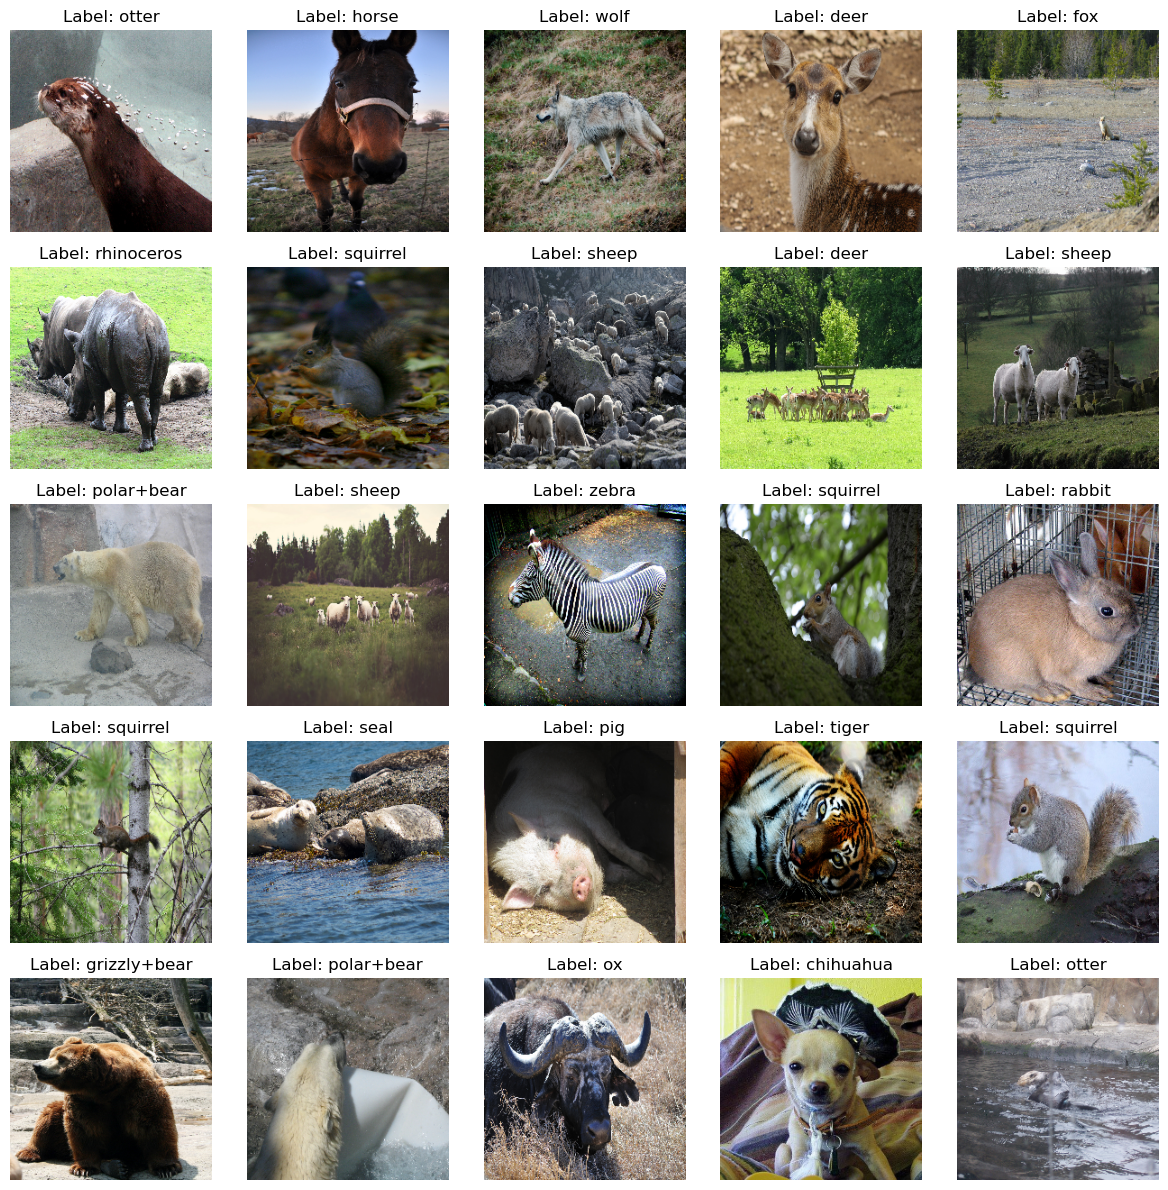

Animal Attributes Included - Binary Vector
Execution time: 593.1833398342133 seconds


In [3]:
Final_Images_df, predicate_df = ut.AWA2DataLoader(data_dir, data_type = "Images", 
                                                  Resnet101Type = None, 
                                                  animal_attributes = 'AwA2', 
                                                  VectorType = 'Binary')

#data_type options
#1. "ResNet101-Features" to load Extracted Resnet101 features Avg. Time - 12 secs
#2. "Images"

#Resnet101Type
# 1 - Using Resnet Features provided with data
# 2 - Using Resnet Features extracted by Abhimanyu Acharya using a pretrainied Resnet101

# animal_attribute
#1. "AwA2" - As provided with AwA2 data
#2. "Custom Animal Attribute KG" - Custom KGs
#3. "Custom Animal Attribute + Taxonomy KG" - Custom KGs
#4. "Word2Vec" - word2vec-google-news-300
#5. "Dbnary" - Dbnary Knowledge Graph/Wiktionary (KGVec2Go Wiktionary/DBnary)
#6. "DBpedia" - DBPedia Knowledge Graph (KGVec2Go Classic RDF2vec: 500 walks, depth: 4, SG, 200 dimensions)

# 2 Define Attribute List

In [4]:
predicates = pd.read_csv("C:/Dissertation/Data/AwA2-data/Animals_with_Attributes2/predicates.txt", sep = '\t',header = None, names = ['predicates'])
predicate_list = predicates['predicates'].tolist()
print(predicate_list)

['black', 'white', 'blue', 'brown', 'gray', 'orange', 'red', 'yellow', 'patches', 'spots', 'stripes', 'furry', 'hairless', 'toughskin', 'big', 'small', 'bulbous', 'lean', 'flippers', 'hands', 'hooves', 'pads', 'paws', 'longleg', 'longneck', 'tail', 'chewteeth', 'meatteeth', 'buckteeth', 'strainteeth', 'horns', 'claws', 'tusks', 'smelly', 'flys', 'hops', 'swims', 'tunnels', 'walks', 'fast', 'slow', 'strong', 'weak', 'muscle', 'bipedal', 'quadrapedal', 'active', 'inactive', 'nocturnal', 'hibernate', 'agility', 'fish', 'meat', 'plankton', 'vegetation', 'insects', 'forager', 'grazer', 'hunter', 'scavenger', 'skimmer', 'stalker', 'newworld', 'oldworld', 'arctic', 'coastal', 'desert', 'bush', 'plains', 'forest', 'fields', 'jungle', 'mountains', 'ocean', 'ground', 'water', 'tree', 'cave', 'fierce', 'timid', 'smart', 'group', 'solitary', 'nestspot', 'domestic']


# 3. Split Data in Predefined Test, Train & Validation for ZSL

In [5]:
trainval_df, TrainData01, ValData01, TrainData02, ValData02, TrainData03, ValData03, Seen_test_df, Unseen_test_df = ut.TestTrainValsplitdata_dir(data_dir, Final_Images_df)

  Training - Validation Split 01 
 Train Classes  
 Number of Classes 27 
 ['antelope' 'buffalo' 'chihuahua' 'collie' 'cow' 'elephant' 'fox'
 'german+shepherd' 'grizzly+bear' 'hippopotamus' 'humpback+whale'
 'killer+whale' 'lion' 'mouse' 'otter' 'persian+cat' 'pig' 'polar+bear'
 'rhinoceros' 'siamese+cat' 'skunk' 'spider+monkey' 'squirrel' 'tiger'
 'weasel' 'wolf' 'zebra'] 

 Validation Classes  
 Number of Classes 13 
 ['beaver' 'chimpanzee' 'dalmatian' 'deer' 'giant+panda' 'gorilla'
 'hamster' 'leopard' 'mole' 'moose' 'ox' 'rabbit' 'raccoon'] 

  Training - Validation Split 02 
 Train Classes  
 Number of Classes 27 
 ['buffalo' 'chimpanzee' 'collie' 'cow' 'deer' 'elephant' 'german+shepherd'
 'giant+panda' 'gorilla' 'hamster' 'hippopotamus' 'humpback+whale'
 'leopard' 'lion' 'mole' 'moose' 'mouse' 'polar+bear' 'rabbit' 'raccoon'
 'rhinoceros' 'siamese+cat' 'spider+monkey' 'squirrel' 'tiger' 'weasel'
 'wolf'] 

 Validation Classes  
 Number of Classes 13 
 ['antelope' 'beaver' 'chihua

In [6]:
TrainData01.shape

(16187, 150762)

# 4. Define Dependent and Independent variables 

In [7]:
X1 = TrainData01.iloc[:,2:150530].values
X1 = X1.reshape(-1, 224, 224,3) #reshape back into an image
y1 = TrainData01.iloc[:,150531:150616]

# Pre defined Test split 02
X2 = TrainData02.iloc[:,2:150530].values
X2 = X2.reshape(-1, 224, 224,3) #reshae back into an image
y2 = TrainData02.iloc[:,150531:150616]

# Pre defined Test split 03
X3 = TrainData03.iloc[:,2:150530].values
X3 = X3.reshape(-1, 224, 224,3) #reshae back into an image
y3 = TrainData03.iloc[:,150531:150616]

X_finaltrain = trainval_df.iloc[:,2:150530].values
X_finaltrain = X_finaltrain.reshape(-1, 224, 224,3) #reshae back into an image
y_finaltrain = trainval_df.iloc[:,150531:150616]

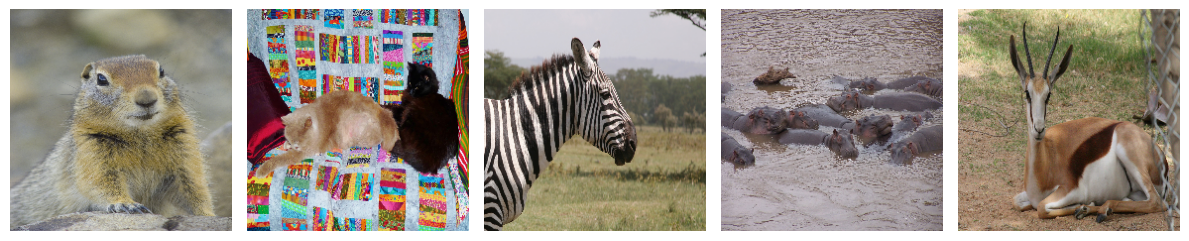

In [8]:
import random

#print 5 random images
randomimages = random.sample(list(X1), 5)

#show the images
fig, axes = plt.subplots(nrows= 1, ncols=5, figsize=(12, 12), sharex=True, sharey=True)
ax = axes.ravel()
for i in range(5):
    ax[i].imshow(randomimages[i])
    ax[i].set_axis_off()     
fig.tight_layout()
plt.show() 

### 4.1 Split in test val sets for attribute prediction stage and to stratify y due to imbalanced data

In [9]:
from sklearn.model_selection import train_test_split

#Train val split for testing projection network
X_train1,X_val_seen_classes1,y_train1,y_val_seen_classes1 = train_test_split(X1,y1,stratify=y1,test_size=0.1,random_state = 0)

X_train2,X_val_seen_classes2,y_train2,y_val_seen_classes2 = train_test_split(X2,y2,stratify=y2,test_size=0.1,random_state = 0)

X_train3,X_val_seen_classes3,y_train3,y_val_seen_classes3 = train_test_split(X3,y3,stratify=y3,test_size=0.1,random_state = 0)

#Stratify Final train data 
X_train_final,X_val_seen_classes_final,y_train_final,y_val_seen_classes_final = train_test_split(X_finaltrain,y_finaltrain,stratify=y_finaltrain,test_size=0.002,random_state = 0)

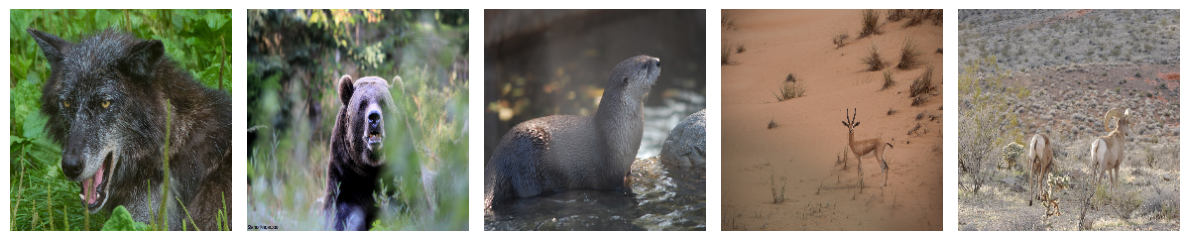

In [10]:
import random
randomimages = random.sample(list(X_train1), 5)

#show the images
fig, axes = plt.subplots(nrows= 1, ncols=5, figsize=(12, 12), sharex=True, sharey=True)
ax = axes.ravel()
for i in range(5):
    ax[i].imshow(randomimages[i])
    ax[i].set_axis_off()     
fig.tight_layout()
plt.show()    

# 5. Load Resnet101 for Transfer learning

In [37]:
ResNet101_Model = resnet101(weights="IMAGENET1K_V1")

# 6. Prepare Data for Resnet101

In [38]:
#Adapted from various responses on Stackexchange and CV Lab 8
class dataTransform():
  def __init__(self, data, targets, transform=None):
    self.data = data
    self.targets = targets

    self.transform = transform

  def __getitem__(self,index):
    x = self.data[index]
    y = self.targets[index]

    if self.transform:
      x = self.transform(x)
    
    return x, y
  
  def __len__(self):
    return len(self.data)

data = X_train1
targets = np.array(y_train1).astype(np.float32).tolist()

transform = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = dataTransform(data, targets, transform=transform)
dataloader = DataLoader(train_dataset, batch_size=32)

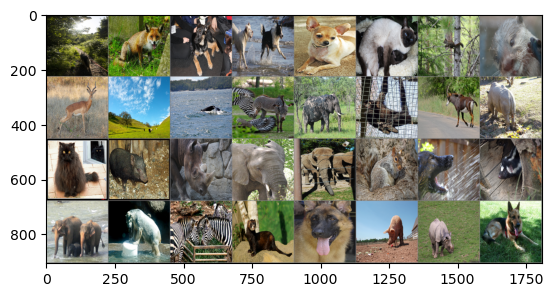

In [39]:
# function to show an image
#adapted from CV Lab 8
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize: back to range [0, 1] just for showing the images
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))     # Reshape: C, H, W -> H, W, C
    plt.show()

# get some random training images
dataiter = iter(dataloader)
images, labels = dataiter.next()

# show images and print labels
imshow(torchvision.utils.make_grid(images[:,:,:]))
first_labels = [label for label in labels]
#print('Ground-truth:', first_labels)

In [40]:
from skorch.helper import SliceDataset
torch.manual_seed(0)
X1_train_tensor = np.array(SliceDataset(train_dataset, idx=0))  # idx=0 is the default
y1_train_tensor = np.array(SliceDataset(train_dataset, idx=1))

#X2_train_tensor = np.array(SliceDataset(train_dataset2, idx=0))  # idx=0 is the default
#y2_train_tensor = np.array(SliceDataset(train_dataset2, idx=1))

#X3_train_tensor = np.array(SliceDataset(train_dataset3, idx=0))  # idx=0 is the default
#y3_train_tensor = np.array(SliceDataset(train_dataset3, idx=1))

#Xfinal_train_tensor = np.array(SliceDataset(train_dataset_final, idx=0))  # idx=0 is the default
#yfinal_train_tensor = np.array(SliceDataset(train_dataset_final, idx=1))

# 7. Set up Neural Network for multilabel classifciation

In [41]:
# adapted from https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/Transfer_Learning.ipynb#scrollTo=MbrJfENYFkPX

class PretrainedResNet101(nn.Module):
    def __init__(self):
        super().__init__()
        model = ResNet101_Model
        num_features = model.fc.in_features
        model.fc = nn.Linear(num_features,85) # Change the last fully connected layer
        self.model = model
                
    def forward(self, x):
        return self.model(x)

### 7.1 Define evaluation criterea and checkpoint for projection network

In [42]:
# Create Skorch EPOCHScoring   
train_macro_f1_score = EpochScoring(scoring='f1_macro', lower_is_better=False, name = 'train_f1_macro', on_train = True)
valid_macro_f1_score = EpochScoring(scoring='f1_macro', lower_is_better=False, name = 'valid_f1_macro', on_train = False)

# Create Checkpoint
CP1 = Checkpoint(monitor='valid_loss_best',dirname='exp1_e2e')
CP2 = Checkpoint(monitor='valid_loss_best',dirname='exp2')
CP3= Checkpoint(monitor='valid_loss_best',dirname='exp3')
CP_final= Checkpoint(monitor='valid_loss_best',dirname='exp_final')

### 7.2 Check GPU usage

In [43]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
torch.cuda.empty_cache()
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

#print(torch.cuda.memory_summary(device=None, abbreviated=False))

Using device: cuda
NVIDIA GeForce RTX 3060 Laptop GPU
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


### 7.2 Define SKORCH model parameters for Train Model 01

In [44]:
# adapted from #https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/Transfer_Learning.ipynb#scrollTo=OSH6C5hjyIIn

from skorch import NeuralNetClassifier
#torch.manual_seed(0)
CNN_Resnet101_model = NeuralNetClassifier(
    PretrainedResNet101,
    #iterator_train__shuffle=True,
    batch_size=16,
    max_epochs=5,
    lr=0.1,
    criterion = torch.nn.modules.loss.BCEWithLogitsLoss, 
    optimizer=torch.optim.SGD,    
    #optimizer__momentum = 0.98,
    #optimizer__weight_decay = 0.005,
    train_split = ValidSplit(5),
    callbacks=[CP1, train_macro_f1_score, valid_macro_f1_score],
    callbacks__valid_acc=None,
    device='cuda'
)

In [45]:
torch.manual_seed(0)
CNN_Resnet101_model.fit(X1_train_tensor,y1_train_tensor)

  epoch    train_f1_macro    train_loss    valid_acc    valid_f1_macro    valid_loss    cp       dur
-------  ----------------  ------------  -----------  ----------------  ------------  ----  --------
      1            0.7911        0.2000       0.7213            0.9142        0.0755     +  178.3998
      2            0.9201        0.0823       0.8281            0.9398        0.0526     +  170.1514
      3            0.9510        0.0469       0.8356            0.9336        0.0579        166.3600
      4            0.9573        0.0371       0.8463            0.9289        0.0663        168.0752
      5            0.9582        0.0345       0.8339            0.9290        0.0746        171.9032


<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=PretrainedResNet101(
    (model): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=Tru

In [46]:
CNN_Resnet101_model.load_params(checkpoint=CP1)

### 7.3 Plot Training and Validation Error

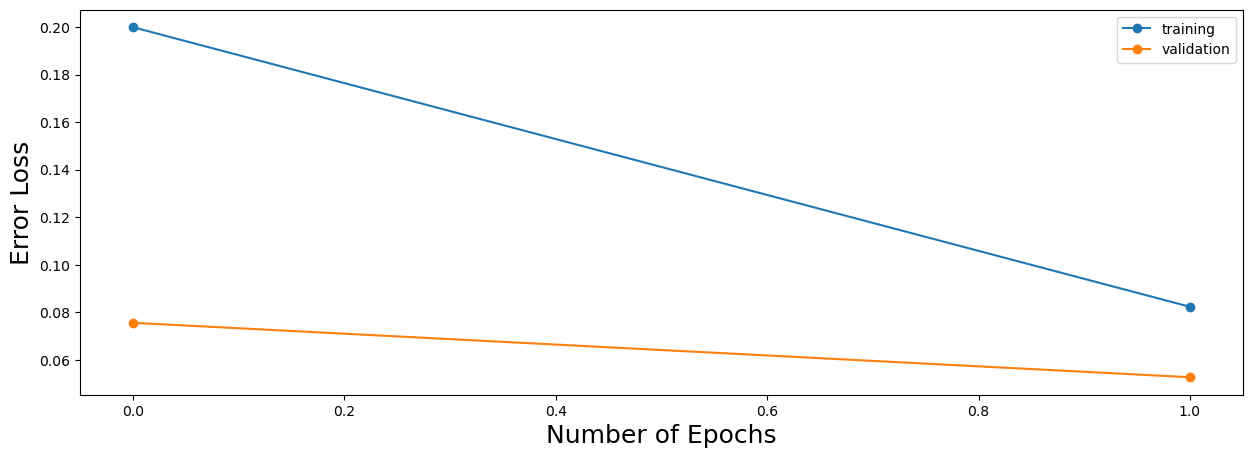

In [47]:
valid_loss = CNN_Resnet101_model.history[:, 'valid_loss']
train_loss = CNN_Resnet101_model.history[:, 'train_loss']

plt.figure(figsize=(15,5))
plt.plot(train_loss, 'o-', label='training')
plt.plot(valid_loss, 'o-', label='validation')
plt.xlabel('Number of Epochs', fontsize=18)
plt.ylabel('Error Loss', fontsize=18)
plt.legend()
plt.show()

### 7.4 Predict attributes for seen classes validation data

In [48]:
data = X_val_seen_classes1
targets = np.array(y_val_seen_classes1).astype(np.float32).tolist()

val_dataset = dataTransform(data, targets, transform=transform)
X_val_tensor = np.array(SliceDataset(val_dataset, idx=0))  # idx=0 is the default

In [49]:
predicted_attributes_seen_val_01 = CNN_Resnet101_model.predict(X_val_tensor)

### 7.5 Assess NNs ability to predict class attributes

In [50]:
print(classification_report(y_val_seen_classes1.astype(np.float32).values, predicted_attributes_seen_val_01, target_names=predicate_list))

              precision    recall  f1-score   support

       black       0.95      0.97      0.96       882
       white       0.95      0.95      0.95       678
        blue       0.88      0.85      0.87       117
       brown       0.97      0.98      0.97       950
        gray       0.92      0.98      0.95       739
      orange       0.99      0.94      0.97       124
         red       0.98      0.89      0.93        54
      yellow       0.98      0.99      0.98        82
     patches       0.94      0.91      0.93       390
       spots       0.94      0.89      0.91       187
     stripes       1.00      0.98      0.99       180
       furry       1.00      0.99      0.99      1288
    hairless       0.95      0.99      0.97       331
   toughskin       0.99      0.99      0.99       826
         big       0.99      0.99      0.99      1188
       small       0.97      0.97      0.97       512
     bulbous       0.98      0.97      0.97       863
        lean       0.95    

# 8. Perform Conventional ZSL

### 8.1 Predict class attributes for  Validation Data 01 - UnSeen Classes

In [67]:
data = ValData01.iloc[:,2:150530].values.reshape(-1,224,224,3)
targets = ValData01.iloc[:,150531:150616].astype(np.float32).values

val_unseen_dataset = dataTransform(data, targets, transform=transform)
Val_unseen_tensor = np.array(SliceDataset(val_unseen_dataset, idx=0))  # idx=0 is the default

In [68]:
y_pred_val_unseen_01 = CNN_Resnet101_model.predict(Val_unseen_tensor)

### 8.2 Assign class label by measuring distance between predicted attribute vectors and true attribute vectors


### 8.3 Limit dataset to unseen validation classes

In [78]:
 #limit search space to unseen classes 
predicatedf_CZSL = predicate_df[predicate_df['classes'].isin((ValData01.classes.unique()).tolist())]
animal_attributes = np.array(predicatedf_CZSL.iloc[:,2:87])
animal_attributes_labels = predicatedf_CZSL['labels'].unique()
print('Unseen Class Labels')
print(animal_attributes_labels)

Unseen Class Labels
[ 4  5 12 15 16 20 21 25 26 29 39 40 48]


### 8.4 Calculate distance between predicted attributes and unseen class attributes to assign class

In [79]:
 #assign classes to unseen data by assigning label from closest class using Cosing Distance
dist_CZSL = 1-distance.cdist(y_pred_val_unseen_01, animal_attributes, 'cosine')
CZSL_label_prediction = np.array([np.argmax(output) for output in dist_CZSL])

### 8.5 Update predicted labels to match dataset

In [80]:
CZSL_label_prediction = np.select([CZSL_label_prediction == 0, CZSL_label_prediction == 1, CZSL_label_prediction == 2, CZSL_label_prediction == 3
  , CZSL_label_prediction == 4, CZSL_label_prediction == 5, CZSL_label_prediction == 6, CZSL_label_prediction == 7
  , CZSL_label_prediction == 8, CZSL_label_prediction == 9, CZSL_label_prediction == 10, CZSL_label_prediction == 11
  , CZSL_label_prediction == 12], [animal_attributes_labels[0], animal_attributes_labels[1], animal_attributes_labels[2]
  , animal_attributes_labels[3], animal_attributes_labels[4], animal_attributes_labels[5]
  , animal_attributes_labels[6], animal_attributes_labels[7], animal_attributes_labels[8], animal_attributes_labels[9]
  , animal_attributes_labels[10], animal_attributes_labels[11], animal_attributes_labels[12]], CZSL_label_prediction)

# 9. ZSL class prediction on UnSeen validation data 01

In [81]:
class_labels = ValData01[['labels','classes', 'order', 'family']]
class_labels.sort_values(by=['labels'], inplace=True)
animal_classes = class_labels['classes'].unique()

In [82]:
print(classification_report(ValData01['labels'], CZSL_label_prediction, target_names=animal_classes))

              precision    recall  f1-score   support

      beaver       0.69      0.53      0.60       152
   dalmatian       0.48      0.61      0.54       442
        mole       0.02      0.17      0.03        75
     leopard       0.48      0.79      0.60       568
       moose       0.53      0.32      0.40       554
     gorilla       0.43      0.10      0.16       709
          ox       0.52      0.90      0.66       588
  chimpanzee       0.38      0.58      0.46       566
     hamster       0.65      0.72      0.68       640
      rabbit       0.45      0.04      0.07       877
 giant+panda       0.23      0.01      0.02       692
        deer       0.79      0.80      0.80      1069
     raccoon       0.24      0.43      0.31       408

    accuracy                           0.47      7340
   macro avg       0.45      0.46      0.41      7340
weighted avg       0.50      0.47      0.43      7340



Top_1_accuracy for UnSeen Validation split 01 per class -  [0.52631579 0.60859729 0.17333333 0.79225352 0.32129964 0.09873061
 0.8962585  0.58303887 0.7171875  0.03990878 0.00867052 0.80074836
 0.43137255]
Top_1_accuracy for UnSeen Validation split 01 -  0.4613627122520449


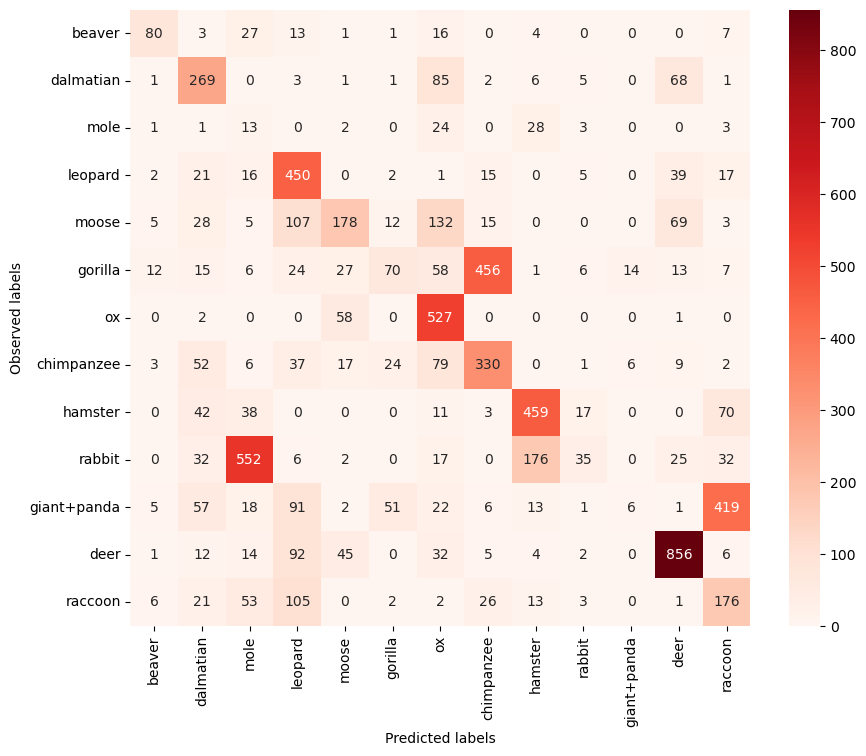

In [87]:
cm = confusion_matrix(ValData01['labels'], CZSL_label_prediction)
correct_predictions_perc = cm.diagonal()/cm.sum(axis=1)
print("Top_1_accuracy for UnSeen Validation split 01 per class - " , correct_predictions_perc)
print("Top_1_accuracy for UnSeen Validation split 01 - " , np.mean(correct_predictions_perc))

# Visualize it as a heatmap
plt.figure(figsize=(10,8))
a = sns.heatmap(cm, annot=True, fmt='', cmap='Reds',annot_kws={"size": 10} )
label_font = {'size':'10'}  # Adjust to fit
a.set_xlabel('Predicted labels', fontdict=label_font);
a.set_ylabel('Observed labels', fontdict=label_font);
a.set_yticklabels(animal_classes)
a.set_xticklabels(animal_classes)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()